In [313]:
## Importing required libraries

import pandas as pd
import numpy as np
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
## Reading dataset '.xlsx'

data = pd.read_excel(r'D:\External_Projects\Housing_Price\artifacts\innercity1.xlsx')

## Basic Data Set Understanding

In [3]:
data.head(10)

cid         dayhours    price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000   600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000   190000       2.0       1.00           670.0   
2  7129303070  20140820T000000   735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000   257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000   450000       2.0       1.00          1120.0   
5  8016250080  20140709T000000   245000       3.0       2.50          1610.0   
6   510002519  20140715T000000   466000       2.0       1.50          1140.0   
7  1624059224  20140618T000000  1160000       4.0       3.50          4680.0   
8  5469503280  20140721T000000   449950       4.0       2.50          3100.0   
9  2787460430  20141028T000000   299950       2.0       1.75          1460.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   
5       7223.0    2     0    0.0  ...      0.0      1994             0   
6       1058.0    3     0    0.0  ...      0.0      2005             0   
7       9700.0    2     0    0.0  ...   1320.0      2005             0   
8      10000.0    2     0    0.0  ...      0.0      1978             0   
9      10506.0    1     0    0.0  ...      0.0      1983             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   
5    98030  47.3661        $            1610.0         7162.0       0.0   
6    98103  47.6608 -122.333            1170.0         1116.0       0.0   
7    98006  47.5703 -122.165            2800.0        12343.0       1.0   
8    98042  47.3741  -122.15            1850.0         9438.0       1.0   
9    98031  47.4048 -122.178            1460.0         8153.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  
5        8833  
6        2198  
7       14380  
8       13100  
9       11966  

[10 rows x 23 columns]

In [4]:
data.tail(10)

cid         dayhours    price  room_bed  room_bath  \
21603   259000240  20140617T000000   506000       3.0       1.75   
21604  1441600020  20140527T000000   960000       5.0       4.00   
21605  1232001480  20140710T000000   445000       2.0       1.00   
21606  1875500040  20150127T000000   330000       3.0       2.50   
21607  2212200270  20150220T000000   300000       3.0       1.75   
21608   203600600  20150310T000000   685530       4.0       2.50   
21609   625049281  20140521T000000   535000       2.0       1.00   
21610   424069018  20140905T000000   998000       3.0       3.75   
21611  7258200055  20150206T000000   262000       4.0       2.50   
21612  8805900430  20141229T000000  1150000       4.0       2.50   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
21603          2180.0       7700.0    1     0    0.0  ...    700.0      1961   
21604          3720.0      15200.0    2     0    0.0  ...      0.0      2005   
21605           840.0       3840.0    1     0    0.0  ...      0.0      1926   
21606          2040.0      14071.0    2     0    0.0  ...      0.0      1995   
21607          1730.0       6900.0    1     0    0.0  ...    600.0      1976   
21608          3130.0      60467.0    2     0    0.0  ...      0.0      1996   
21609          1030.0       4841.0    1     0    0.0  ...    110.0      1939   
21610          3710.0      34412.0    2     0    0.0  ...    800.0      1978   
21611          1560.0       7800.0    2     0    0.0  ...      0.0      1997   
21612          1940.0       4875.0    2     0    0.0  ...      0.0      1925   

       yr_renovated  zipcode      lat     long  living_measure15  \
21603             0    98177  47.7594 -122.361            2180.0   
21604             0    98075  47.5956 -122.026            4100.0   
21605             0    98117  47.6840 -122.378            1310.0   
21606             0    98019  47.7278 -121.963            1890.0   
21607             0    98031  47.3915 -122.188            1950.0   
21608             0    98014  47.6618 -121.962            2780.0   
21609             0    98103  47.6860 -122.341            1530.0   
21610             0    98075  47.5888  -122.04            2390.0   
21611             0    98168  47.5140 -122.316            1160.0   
21612             0    98112  47.6427 -122.304            1790.0   

       lot_measure15 furnished  total_area  
21603         7604.0       0.0        9880  
21604        19036.0       1.0       18920  
21605         3840.0       0.0        4680  
21606        14040.0       0.0       16111  
21607         7200.0       0.0        8630  
21608        44224.0       1.0       63597  
21609         4944.0       0.0        5871  
21610        34412.0       1.0       38122  
21611         7800.0       0.0        9360  
21612         4875.0       1.0        6815  

[10 rows x 23 columns]

In [5]:
## Data dimensions

data.shape

(21613, 23)

* There is 21613 fields and 23 attributes.

In [6]:
## Data size

data.size

497099

* There are 497099 cells in given dataset

In [7]:
## Columns name

for col in data.columns:
    print(col)

cid
dayhours
price
room_bed
room_bath
living_measure
lot_measure
ceil
coast
sight
condition
quality
ceil_measure
basement
yr_built
yr_renovated
zipcode
lat
long
living_measure15
lot_measure15
furnished
total_area


#### Columns Details:

1. cid: a notation for a house 
2. dayhours: Date house was sold 
3. price: Price is prediction target 
4. room_bed: Number of Bedrooms/House 
5. room_bath: Number of bathrooms/bedrooms 
6. living_measure: square footage of the home 
7. lot_measure: quare footage of the lot 
8. ceil: Total floors (levels) in house 
9. coast: House which has a view to a waterfront 
10. sight: Has been viewed 
11. condition: How good the condition is (Overall) 
12. quality: grade given to the housing unit, based on grading system 
13. ceil_measure: square footage of house apart from basement 
14. basement_measure: square footage of the basement 
15. yr_built: Built Year 
16. yr_renovated: Year when house was renovated 
17. zipcode: zip 
18. lat: Latitude coordinate 
19. long: Longitude coordinate 
20. living_measure15: Living room area in 2015(implies-- some renovations) This might or 
    might not have affected the lotsize area 
21. lot_measure15: lotSize area in 2015(implies-- some renovations) 
22. furnished: Based on the quality of room  
23. total_area: Measure of both living and lot 

In [8]:
## Information about given dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [9]:
sum(data.isnull().sum())

689

* Data file size is 2.35 MB.
* Raw dataset contain's atrributes of types:
  - "int64" (4)
  - "object" (7)
  - "float64" (12)
* Some of the columns have missing values in them:
  - room_bed (108)
  - room_bath (108)
  - living_measure (17)
  - lot_measure (42)
  - ceil (42)
  - coast (1)
  - sight (57)
  - condition (57)
  - quality (1)
  - ceil_measure (1)
  - basement (1)
  - yr_built (1)
  - living_measure15 (166)
  - lot_measure15 (29)
  - furnished (29)
  - total_area (29)

In [10]:
## Statistical summary

data.describe().T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21505.0  3.371355e+00  9.302886e-01  0.000000e+00   
room_bath         21505.0  2.115171e+00  7.702481e-01  0.000000e+00   
living_measure    21596.0  2.079861e+03  9.184961e+02  2.900000e+02   
lot_measure       21571.0  1.510458e+04  4.142362e+04  5.200000e+02   
sight             21556.0  2.343663e-01  7.664376e-01  0.000000e+00   
quality           21612.0  7.656857e+00  1.175484e+00  1.000000e+00   
ceil_measure      21612.0  1.788367e+03  8.281025e+02  2.900000e+02   
basement          21612.0  2.915225e+02  4.425808e+02  0.000000e+00   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
living_measure15  21447.0  1.987066e+03  6.855196e+02  3.990000e+02   
lot_measure15     21584.0  1.276654e+04  2.728699e+04  6.510000e+02   
furnished         21584.0  1.967198e-01  3.975279e-01  0.000000e+00   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.429250e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068450e+04  1.651359e+06  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008700e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00

In [11]:
## Looking for duplicate values

data[data.duplicated()]

Empty DataFrame
Columns: [cid, dayhours, price, room_bed, room_bath, living_measure, lot_measure, ceil, coast, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area]
Index: []

[0 rows x 23 columns]

* There are no duplicated values in given dataset.

## Feature Engineering

### preprocessing 'cid' attribute

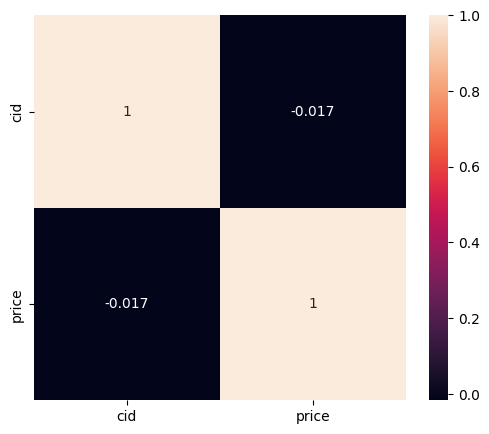

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(data[['cid','price']].corr(),annot=True)
plt.show()

* Since 'cid' attribute is a notation for a house which is like a ID of house and it should not be much useful for our price prediction purpose so we will drop it.

In [13]:
data1 = data.drop(columns='cid')

In [14]:
data1.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
0  20150427T000000  600000       4.0       1.75          3050.0       9440.0   
1  20150317T000000  190000       2.0       1.00           670.0       3101.0   
2  20140820T000000  735000       4.0       2.75          3040.0       2415.0   
3  20141010T000000  257000       3.0       2.50          1740.0       3721.0   
4  20150218T000000  450000       2.0       1.00          1120.0       4590.0   

  ceil coast  sight condition  ...  basement  yr_built  yr_renovated zipcode  \
0    1     0    0.0         3  ...    1250.0      1966             0   98034   
1    1     0    0.0         4  ...       0.0      1948             0   98118   
2    2     1    4.0         3  ...       0.0      1966             0   98118   
3    2     0    0.0         3  ...       0.0      2009             0   98002   
4    1     0    0.0         3  ...       0.0      1924             0   98118   

       lat     long  living_measure15 lot_measure15  furnished  total_area  
0  47.7228 -122.183            2020.0        8660.0        0.0       12490  
1  47.5546 -122.274            1660.0        4100.0        0.0        3771  
2  47.5188 -122.256            2620.0        2433.0        0.0        5455  
3  47.3363 -122.213            2030.0        3794.0        0.0        5461  
4  47.5663 -122.285            1120.0        5100.0        0.0        5710  

[5 rows x 22 columns]

### preprocessing 'dayhours' attribute

* From above column date we know that 'dayhours' is the  Date house was sold, so we should preprocess it to convert it into 'datetime' datatype from 'object' datatype.

In [15]:
data1['dayhours'] = [i.split('T')[0] for i in data1['dayhours']]

In [16]:
dayhours = []
for i in data1['dayhours']:
    year = i[0:4]
    month = i[4:6]
    day = i[6:]
    date = f"{day}-{month}-{year}"
    dayhours.append(date)

In [17]:
data1['dayhours'] = dayhours

In [18]:
data1['dayhours'] = pd.to_datetime(data['dayhours'])

In [19]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21613 non-null  datetime64[ns]
 1   price             21613 non-null  int64         
 2   room_bed          21505 non-null  float64       
 3   room_bath         21505 non-null  float64       
 4   living_measure    21596 non-null  float64       
 5   lot_measure       21571 non-null  float64       
 6   ceil              21571 non-null  object        
 7   coast             21612 non-null  object        
 8   sight             21556 non-null  float64       
 9   condition         21556 non-null  object        
 10  quality           21612 non-null  float64       
 11  ceil_measure      21612 non-null  float64       
 12  basement          21612 non-null  float64       
 13  yr_built          21612 non-null  object        
 14  yr_renovated      2161

### preprocessing 'coast' attribute

In [20]:
data1['coast'].value_counts()

coast
0    21421
1      161
$       30
Name: count, dtype: int64

* 'coast' attribute  has class label that tells about house which has a view to a waterfront.
* And we can see that majority of data are of houses which do not has a view to a waterfront. 
* We drop this column as this is highly imbalanced.

In [21]:
data2 = data1.drop(columns='coast')

In [22]:
data2.head()

dayhours   price  room_bed  room_bath  living_measure  lot_measure ceil  \
0 2015-04-27  600000       4.0       1.75          3050.0       9440.0    1   
1 2015-03-17  190000       2.0       1.00           670.0       3101.0    1   
2 2014-08-20  735000       4.0       2.75          3040.0       2415.0    2   
3 2014-10-10  257000       3.0       2.50          1740.0       3721.0    2   
4 2015-02-18  450000       2.0       1.00          1120.0       4590.0    1   

   sight condition  quality  ...  basement  yr_built yr_renovated  zipcode  \
0    0.0         3      8.0  ...    1250.0      1966            0    98034   
1    0.0         4      6.0  ...       0.0      1948            0    98118   
2    4.0         3      8.0  ...       0.0      1966            0    98118   
3    0.0         3      8.0  ...       0.0      2009            0    98002   
4    0.0         3      7.0  ...       0.0      1924            0    98118   

       lat     long living_measure15  lot_measure15  furnished  total_area  
0  47.7228 -122.183           2020.0         8660.0        0.0       12490  
1  47.5546 -122.274           1660.0         4100.0        0.0        3771  
2  47.5188 -122.256           2620.0         2433.0        0.0        5455  
3  47.3363 -122.213           2030.0         3794.0        0.0        5461  
4  47.5663 -122.285           1120.0         5100.0        0.0        5710  

[5 rows x 21 columns]

### preprocessing 'quality' attribute

In [23]:
data2['quality'].value_counts()

quality
7.0     8981
8.0     6067
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: count, dtype: int64

In [24]:
data2['quality'].isna().sum()

1

In [25]:
data2['quality'].mode()

0    7.0
Name: quality, dtype: float64

* We will fill that 1 missig value with mode which is '7.0'.

In [26]:
data2['quality'].fillna(7.0,inplace=True)

In [27]:
data2['quality'].isna().sum()

0

In [28]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21613 non-null  datetime64[ns]
 1   price             21613 non-null  int64         
 2   room_bed          21505 non-null  float64       
 3   room_bath         21505 non-null  float64       
 4   living_measure    21596 non-null  float64       
 5   lot_measure       21571 non-null  float64       
 6   ceil              21571 non-null  object        
 7   sight             21556 non-null  float64       
 8   condition         21556 non-null  object        
 9   quality           21613 non-null  float64       
 10  ceil_measure      21612 non-null  float64       
 11  basement          21612 non-null  float64       
 12  yr_built          21612 non-null  object        
 13  yr_renovated      21613 non-null  int64         
 14  zipcode           2161

### preprocessing 'ceil_measure' attribute

In [29]:
data2['ceil_measure']

0        1800.0
1         670.0
2        3040.0
3        1740.0
4        1120.0
          ...  
21608    3130.0
21609     920.0
21610    2910.0
21611    1560.0
21612    1940.0
Name: ceil_measure, Length: 21613, dtype: float64

* ceil measure is square footage of house apart from basement 

In [30]:
data2['ceil_measure'].isnull().sum()

1

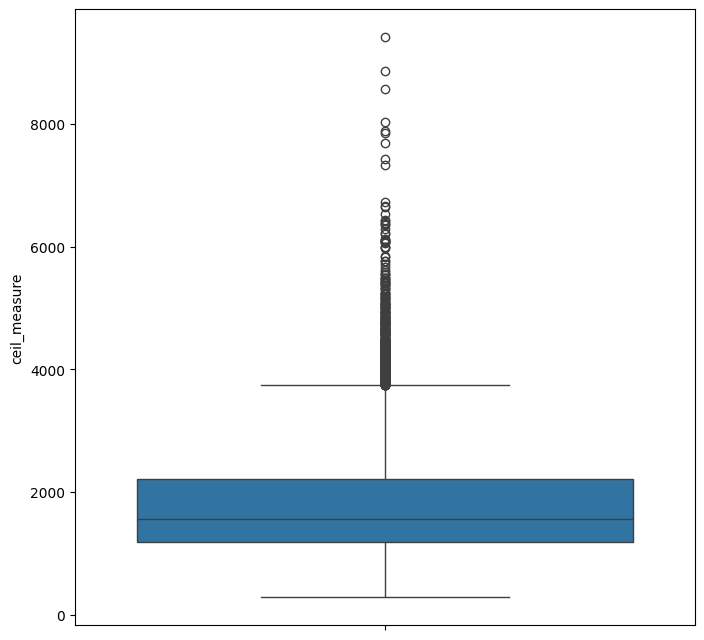

In [31]:
plt.figure(figsize=(8,8))
sns.boxplot(data2['ceil_measure'])
plt.show()

* We will fill the missing value with median value as there are lot of oultliers in respective columns.

In [32]:
data2['ceil_measure'].median()

1560.0

In [33]:
data2['ceil_measure'].fillna(1560.0,inplace=True)

In [34]:
data2['ceil_measure'].isnull().sum()

0

### preprocessing 'basement' attribute

In [35]:
data2['basement']

0        1250.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
21608       0.0
21609     110.0
21610     800.0
21611       0.0
21612       0.0
Name: basement, Length: 21613, dtype: float64

* 'basement' attribute contains data about square footage of the basement.

In [36]:
data2[data2['basement'] == 0.0]

dayhours    price  room_bed  room_bath  living_measure  lot_measure  \
1     2015-03-17   190000       2.0       1.00           670.0       3101.0   
2     2014-08-20   735000       4.0       2.75          3040.0       2415.0   
3     2014-10-10   257000       3.0       2.50          1740.0       3721.0   
4     2015-02-18   450000       2.0       1.00          1120.0       4590.0   
5     2014-07-09   245000       3.0       2.50          1610.0       7223.0   
...          ...      ...       ...        ...             ...          ...   
21605 2014-07-10   445000       2.0       1.00           840.0       3840.0   
21606 2015-01-27   330000       3.0       2.50          2040.0      14071.0   
21608 2015-03-10   685530       4.0       2.50          3130.0      60467.0   
21611 2015-02-06   262000       4.0       2.50          1560.0       7800.0   
21612 2014-12-29  1150000       4.0       2.50          1940.0       4875.0   

      ceil  sight condition  quality  ...  basement  yr_built yr_renovated  \
1        1    0.0         4      6.0  ...       0.0      1948            0   
2        2    4.0         3      8.0  ...       0.0      1966            0   
3        2    0.0         3      8.0  ...       0.0      2009            0   
4        1    0.0         3      7.0  ...       0.0      1924            0   
5        2    0.0         3      7.0  ...       0.0      1994            0   
...    ...    ...       ...      ...  ...       ...       ...          ...   
21605    1    0.0         4      7.0  ...       0.0      1926            0   
21606    2    0.0         3      7.0  ...       0.0      1995            0   
21608    2    0.0         3      9.0  ...       0.0      1996            0   
21611    2    0.0         3      7.0  ...       0.0      1997            0   
21612    2    0.0         4      9.0  ...       0.0      1925            0   

       zipcode      lat     long living_measure15  lot_measure15  furnished  \
1        98118  47.5546 -122.274           1660.0         4100.0        0.0   
2        98118  47.5188 -122.256           2620.0         2433.0        0.0   
3        98002  47.3363 -122.213           2030.0         3794.0        0.0   
4        98118  47.5663 -122.285           1120.0         5100.0        0.0   
5        98030  47.3661        $           1610.0         7162.0        0.0   
...        ...      ...      ...              ...            ...        ...   
21605    98117  47.6840 -122.378           1310.0         3840.0        0.0   
21606    98019  47.7278 -121.963           1890.0        14040.0        0.0   
21608    98014  47.6618 -121.962           2780.0        44224.0        1.0   
21611    98168  47.5140 -122.316           1160.0         7800.0        0.0   
21612    98112  47.6427 -122.304           1790.0         4875.0        1.0   

       total_area  
1            3771  
2            5455  
3            5461  
4            5710  
5            8833  
...           ...  
21605        4680  
21606       16111  
21608       63597  
21611        9360  
21612        6815  

[13125 rows x 21 columns]

In [37]:
data2['basement'].isnull().sum()

1

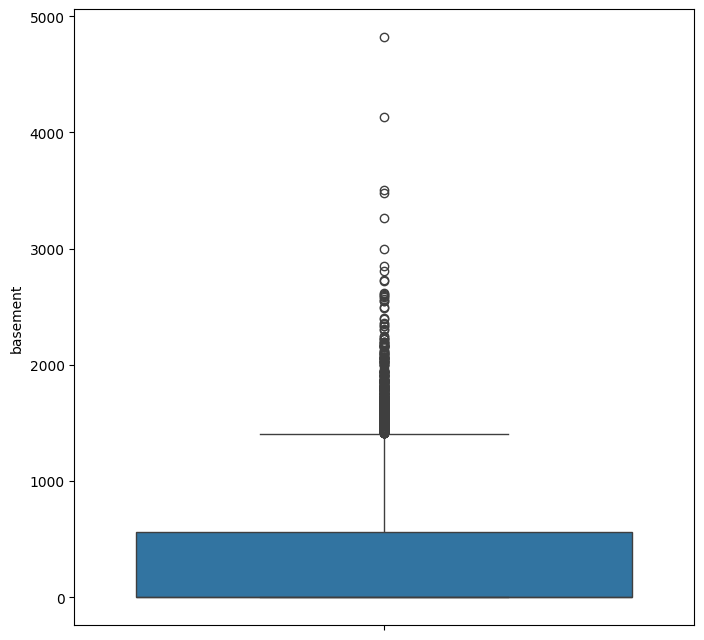

In [38]:
plt.figure(figsize=(8,8))
sns.boxplot(data2['basement'])
plt.show()

* We will fill the missing value with median value as there are lot of oultliers in respective columns.

In [39]:
data2['basement'].median()

0.0

In [40]:
data2['basement'].fillna(0.0,inplace=True)

In [41]:
data2['basement'].isnull().sum()

0

### preprocessing 'yr_built' attribute

In [42]:
data2['yr_built']

0        1966
1        1948
2        1966
3        2009
4        1924
         ... 
21608    1996
21609    1939
21610    1978
21611    1997
21612    1925
Name: yr_built, Length: 21613, dtype: object

In [43]:
data2['yr_built'].isna().sum()

1

In [44]:
data2.groupby(data2['yr_built'])['price'].median()

yr_built
1900    549000.0
1901    550000.0
1902    624000.0
1903    461000.0
1904    478000.0
          ...   
2012    448475.0
2013    565000.0
2014    599000.0
2015    628000.0
$       410000.0
Name: price, Length: 117, dtype: float64

In [45]:
data2[data2['yr_built'] == '$']

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
131   2015-04-02  649000       NaN        NaN          1530.0       1442.0   
1841  2015-01-16  453000       NaN        NaN          1820.0      16300.0   
1906  2014-10-21  410000       NaN        NaN          1230.0       7020.0   
2407  2015-03-11  420000       NaN        NaN          1000.0       5375.0   
2974  2014-06-01  250000       NaN        NaN           750.0       4000.0   
4529  2014-11-20  410000       NaN        NaN          1410.0       8088.0   
5351  2014-11-18  308000       NaN        NaN          1960.0      12243.0   
8205  2014-09-16  428000       NaN        NaN          1350.0       4225.0   
13562 2014-07-24  835000       NaN        NaN          3600.0      14720.0   
13581 2014-07-15  305000       NaN        NaN          1030.0       5350.0   
14044 2014-09-05  643500       NaN        NaN          1650.0       7104.0   
14955 2014-12-18  357500       NaN        NaN          1630.0       9403.0   
15749 2014-06-17  305000       NaN        NaN          2110.0       7665.0   
19204 2014-11-12  259950       NaN        NaN          1240.0       9500.0   

      ceil  sight condition  quality  ...  basement  yr_built yr_renovated  \
131      3    0.0         3      9.0  ...       0.0         $            0   
1841     1    0.0         4      7.0  ...     600.0         $            0   
1906     1    0.0         3      7.0  ...     140.0         $            0   
2407     1    0.0         3      7.0  ...       0.0         $            0   
2974     1    0.0         3      6.0  ...       0.0         $            0   
4529     1    0.0         3      7.0  ...       0.0         $            0   
5351     2    0.0         3      8.0  ...       0.0         $            0   
8205     1    0.0         3      8.0  ...       0.0         $            0   
13562    1    2.0         5      8.0  ...    1800.0         $            0   
13581    1    0.0         3      7.0  ...       0.0         $         2009   
14044    2    0.0         3      8.0  ...       0.0         $         1986   
14955    1    0.0         3      7.0  ...       0.0         $            0   
15749    1    0.0         4      7.0  ...     750.0         $            0   
19204    1    0.0         4      7.0  ...       0.0         $            0   

       zipcode      lat     long living_measure15  lot_measure15  furnished  \
131      98107  47.6692 -122.372              NaN         1456.0        1.0   
1841     98166  47.4582 -122.365              NaN        16300.0        0.0   
1906     98116  47.5719  -122.39              NaN         5850.0        0.0   
2407     98118  47.5404 -122.268              NaN         5000.0        0.0   
2974     98136  47.5243  -122.39              NaN         4850.0        0.0   
4529     98034  47.7303 -122.227              NaN         7401.0        0.0   
5351     98042  47.3405 -122.058              NaN        12230.0        0.0   
8205     98053  47.7106  -122.03              NaN         4225.0        0.0   
13562    98034  47.7022 -122.227              NaN        15358.0        0.0   
13581    98055  47.4905 -122.206              NaN         5250.0        0.0   
14044    98177  47.7053 -122.374              NaN         7104.0        0.0   
14955    98155  47.7570 -122.316              NaN         8461.0        0.0   
15749    98023  47.3082 -122.372              NaN         8436.0        0.0   
19204    98166  47.4756  -122.35              NaN        10125.0        0.0   

       total_area  
131          2972  
1841        18120  
1906         8250  
2407         6375  
2974         4750  
4529         9498  
5351        14203  
8205         5575  
13562       18320  
13581        6380  
14044        8754  
14955       11033  
15749        9775  
19204       10740  

[14 rows x 21 columns]

* 'yr_built' attribute has 14 data points with value as "$" which is surely invalid data entry and we cannot precisely know which year the house was built using given data so we will drop the respective row containing that value. 
* Also there is 1 missing value we will drop that row too.

In [46]:
data2['yr_built'].fillna('$',inplace=True)

In [47]:
data2[data2['yr_built'] == '$']

dayhours   price  room_bed  room_bath  living_measure  lot_measure  \
131   2015-04-02  649000       NaN        NaN          1530.0       1442.0   
1841  2015-01-16  453000       NaN        NaN          1820.0      16300.0   
1906  2014-10-21  410000       NaN        NaN          1230.0       7020.0   
2407  2015-03-11  420000       NaN        NaN          1000.0       5375.0   
2974  2014-06-01  250000       NaN        NaN           750.0       4000.0   
4529  2014-11-20  410000       NaN        NaN          1410.0       8088.0   
5351  2014-11-18  308000       NaN        NaN          1960.0      12243.0   
8205  2014-09-16  428000       NaN        NaN          1350.0       4225.0   
13562 2014-07-24  835000       NaN        NaN          3600.0      14720.0   
13581 2014-07-15  305000       NaN        NaN          1030.0       5350.0   
14044 2014-09-05  643500       NaN        NaN          1650.0       7104.0   
14955 2014-12-18  357500       NaN        NaN          1630.0       9403.0   
15749 2014-06-17  305000       NaN        NaN          2110.0       7665.0   
19204 2014-11-12  259950       NaN        NaN          1240.0       9500.0   
21226 2014-06-30  327500       3.0       2.25          2310.0          NaN   

      ceil  sight condition  quality  ...  basement  yr_built yr_renovated  \
131      3    0.0         3      9.0  ...       0.0         $            0   
1841     1    0.0         4      7.0  ...     600.0         $            0   
1906     1    0.0         3      7.0  ...     140.0         $            0   
2407     1    0.0         3      7.0  ...       0.0         $            0   
2974     1    0.0         3      6.0  ...       0.0         $            0   
4529     1    0.0         3      7.0  ...       0.0         $            0   
5351     2    0.0         3      8.0  ...       0.0         $            0   
8205     1    0.0         3      8.0  ...       0.0         $            0   
13562    1    2.0         5      8.0  ...    1800.0         $            0   
13581    1    0.0         3      7.0  ...       0.0         $         2009   
14044    2    0.0         3      8.0  ...       0.0         $         1986   
14955    1    0.0         3      7.0  ...       0.0         $            0   
15749    1    0.0         4      7.0  ...     750.0         $            0   
19204    1    0.0         4      7.0  ...       0.0         $            0   
21226  NaN    NaN       NaN      7.0  ...       0.0         $            0   

       zipcode      lat     long living_measure15  lot_measure15  furnished  \
131      98107  47.6692 -122.372              NaN         1456.0        1.0   
1841     98166  47.4582 -122.365              NaN        16300.0        0.0   
1906     98116  47.5719  -122.39              NaN         5850.0        0.0   
2407     98118  47.5404 -122.268              NaN         5000.0        0.0   
2974     98136  47.5243  -122.39              NaN         4850.0        0.0   
4529     98034  47.7303 -122.227              NaN         7401.0        0.0   
5351     98042  47.3405 -122.058              NaN        12230.0        0.0   
8205     98053  47.7106  -122.03              NaN         4225.0        0.0   
13562    98034  47.7022 -122.227              NaN        15358.0        0.0   
13581    98055  47.4905 -122.206              NaN         5250.0        0.0   
14044    98177  47.7053 -122.374              NaN         7104.0        0.0   
14955    98155  47.7570 -122.316              NaN         8461.0        0.0   
15749    98023  47.3082 -122.372              NaN         8436.0        0.0   
19204    98166  47.4756  -122.35              NaN        10125.0        0.0   
21226    98031  47.4051 -122.193           1960.0         7201.0        0.0   

       total_area  
131          2972  
1841        18120  
1906         8250  
2407         6375  
2974         4750  
4529         9498  
5351        14203  
8205         5575  
13562       18320  
13581        6380  
14044        8754  
14955

In [48]:
data3 = data2[data2['yr_built'] != '$']
data3.reset_index(drop=True,inplace=True)

In [49]:
data3

dayhours    price  room_bed  room_bath  living_measure  lot_measure  \
0     2015-04-27   600000       4.0       1.75          3050.0       9440.0   
1     2015-03-17   190000       2.0       1.00           670.0       3101.0   
2     2014-08-20   735000       4.0       2.75          3040.0       2415.0   
3     2014-10-10   257000       3.0       2.50          1740.0       3721.0   
4     2015-02-18   450000       2.0       1.00          1120.0       4590.0   
...          ...      ...       ...        ...             ...          ...   
21593 2015-03-10   685530       4.0       2.50          3130.0      60467.0   
21594 2014-05-21   535000       2.0       1.00          1030.0       4841.0   
21595 2014-09-05   998000       3.0       3.75          3710.0      34412.0   
21596 2015-02-06   262000       4.0       2.50          1560.0       7800.0   
21597 2014-12-29  1150000       4.0       2.50          1940.0       4875.0   

      ceil  sight condition  quality  ...  basement  yr_built yr_renovated  \
0        1    0.0         3      8.0  ...    1250.0      1966            0   
1        1    0.0         4      6.0  ...       0.0      1948            0   
2        2    4.0         3      8.0  ...       0.0      1966            0   
3        2    0.0         3      8.0  ...       0.0      2009            0   
4        1    0.0         3      7.0  ...       0.0      1924            0   
...    ...    ...       ...      ...  ...       ...       ...          ...   
21593    2    0.0         3      9.0  ...       0.0      1996            0   
21594    1    0.0         3      7.0  ...     110.0      1939            0   
21595    2    0.0         3     10.0  ...     800.0      1978            0   
21596    2    0.0         3      7.0  ...       0.0      1997            0   
21597    2    0.0         4      9.0  ...       0.0      1925            0   

       zipcode      lat     long living_measure15  lot_measure15  furnished  \
0        98034  47.7228 -122.183           2020.0         8660.0        0.0   
1        98118  47.5546 -122.274           1660.0         4100.0        0.0   
2        98118  47.5188 -122.256           2620.0         2433.0        0.0   
3        98002  47.3363 -122.213           2030.0         3794.0        0.0   
4        98118  47.5663 -122.285           1120.0         5100.0        0.0   
...        ...      ...      ...              ...            ...        ...   
21593    98014  47.6618 -121.962           2780.0        44224.0        1.0   
21594    98103  47.6860 -122.341           1530.0         4944.0        0.0   
21595    98075  47.5888  -122.04           2390.0        34412.0        1.0   
21596    98168  47.5140 -122.316           1160.0         7800.0        0.0   
21597    98112  47.6427 -122.304           1790.0         4875.0        1.0   

       total_area  
0           12490  
1            3771  
2            5455  
3            5461  
4            5710  
...           ...  
21593       63597  
21594        5871  
21595       38122  
21596        9360  
21597        6815  

[21598 rows x 21 columns]

In [50]:
data3[data3['yr_built'] == '$']

Empty DataFrame
Columns: [dayhours, price, room_bed, room_bath, living_measure, lot_measure, ceil, sight, condition, quality, ceil_measure, basement, yr_built, yr_renovated, zipcode, lat, long, living_measure15, lot_measure15, furnished, total_area]
Index: []

[0 rows x 21 columns]

In [51]:
data3['yr_built'] = data3['yr_built'].astype(int)

In [52]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21598 entries, 0 to 21597
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21598 non-null  datetime64[ns]
 1   price             21598 non-null  int64         
 2   room_bed          21504 non-null  float64       
 3   room_bath         21504 non-null  float64       
 4   living_measure    21581 non-null  float64       
 5   lot_measure       21557 non-null  float64       
 6   ceil              21557 non-null  object        
 7   sight             21542 non-null  float64       
 8   condition         21542 non-null  object        
 9   quality           21598 non-null  float64       
 10  ceil_measure      21598 non-null  float64       
 11  basement          21598 non-null  float64       
 12  yr_built          21598 non-null  int32         
 13  yr_renovated      21598 non-null  int64         
 14  zipcode           2159

In [53]:
data3['yr_built']

0        1966
1        1948
2        1966
3        2009
4        1924
         ... 
21593    1996
21594    1939
21595    1978
21596    1997
21597    1925
Name: yr_built, Length: 21598, dtype: int32

In [54]:
data3.isnull().sum()

dayhours              0
price                 0
room_bed             94
room_bath            94
living_measure       17
lot_measure          41
ceil                 41
sight                56
condition            56
quality               0
ceil_measure          0
basement              0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    152
lot_measure15        29
furnished            29
total_area           29
dtype: int64

### preprocessing 'total_area' attribute

In [55]:
data3['total_area'].isna().sum()

29

In [56]:
data3['total_area'].value_counts()

total_area
$        39
8750     19
9060     19
6770     19
9820     19
         ..
18197     1
15707     1
5355      1
12215     1
38122     1
Name: count, Length: 11142, dtype: int64

* We will convert the rows with "$" value in 'total_area' column to null value for further preprocessing

In [57]:
data3.loc[data3['total_area'] == '$', 'total_area'] = None

In [58]:
data3['total_area'].isna().sum()

68

In [59]:
data3[['total_area','living_measure','lot_measure']]

total_area  living_measure  lot_measure
0          12490          3050.0       9440.0
1           3771           670.0       3101.0
2           5455          3040.0       2415.0
3           5461          1740.0       3721.0
4           5710          1120.0       4590.0
...          ...             ...          ...
21593      63597          3130.0      60467.0
21594       5871          1030.0       4841.0
21595      38122          3710.0      34412.0
21596       9360          1560.0       7800.0
21597       6815          1940.0       4875.0

[21598 rows x 3 columns]

* Since 'total_area' = 'living_measure' + 'lot_measure'

In [60]:
data3['total_area'] = data3['living_measure']+data3['lot_measure']

In [61]:
data3[['total_area','living_measure','lot_measure']]

total_area  living_measure  lot_measure
0         12490.0          3050.0       9440.0
1          3771.0           670.0       3101.0
2          5455.0          3040.0       2415.0
3          5461.0          1740.0       3721.0
4          5710.0          1120.0       4590.0
...           ...             ...          ...
21593     63597.0          3130.0      60467.0
21594      5871.0          1030.0       4841.0
21595     38122.0          3710.0      34412.0
21596      9360.0          1560.0       7800.0
21597      6815.0          1940.0       4875.0

[21598 rows x 3 columns]

In [62]:
data3['total_area'].isna().sum()

58

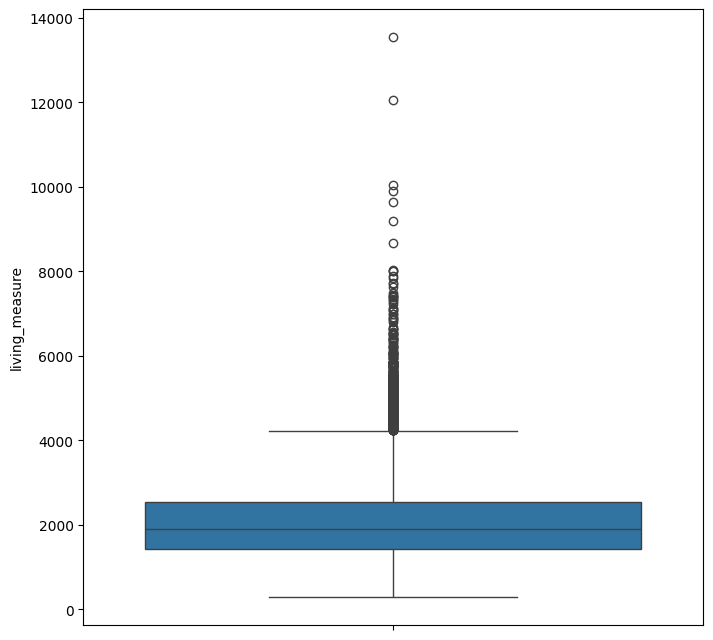

In [63]:
plt.figure(figsize=(8,8))
sns.boxplot(data2['living_measure'])
plt.show()

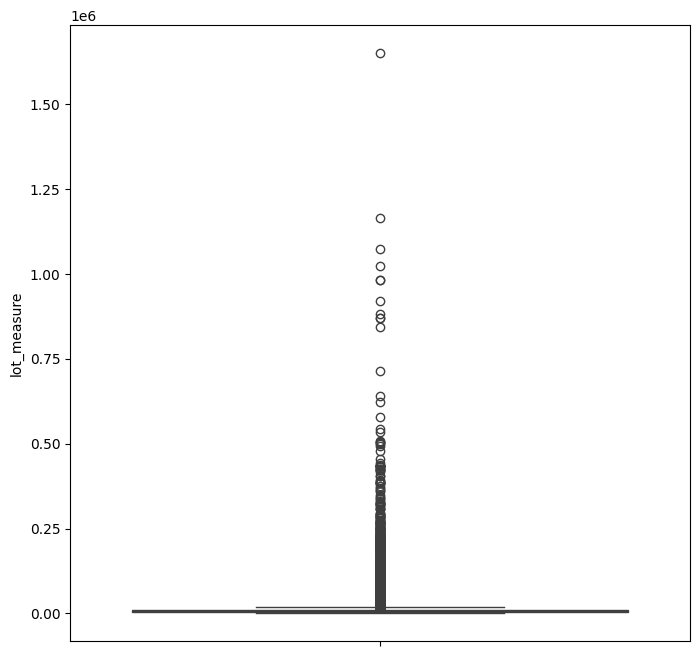

In [64]:
plt.figure(figsize=(8,8))
sns.boxplot(data2['lot_measure'])
plt.show()

* We will first fill the null values of 'living_measure' and 'lot_measure' with median values than will fill the missing values of 'total_area'

In [65]:
data3['living_measure'].median()

1910.0

In [66]:
data3['living_measure'].fillna(1910.0,inplace=True)

In [67]:
data3['lot_measure'].median()


7618.0

In [68]:
data3['lot_measure'].fillna(7618.0,inplace=True)

In [69]:
data3['total_area'] = data3['living_measure']+data3['lot_measure']

In [70]:
data3['total_area'].isna().sum()

0

In [71]:
data3.isnull().sum()

dayhours              0
price                 0
room_bed             94
room_bath            94
living_measure        0
lot_measure           0
ceil                 41
sight                56
condition            56
quality               0
ceil_measure          0
basement              0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    152
lot_measure15        29
furnished            29
total_area            0
dtype: int64

* Since 'total_area' = 'living_measure' + 'lot_measure' this will lead to muticollinearity therefore we will drop 'living_measure' and 'lot_measure'.

In [72]:
data4 = data3.drop(columns=['living_measure','lot_measure'])

In [73]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21598 entries, 0 to 21597
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dayhours          21598 non-null  datetime64[ns]
 1   price             21598 non-null  int64         
 2   room_bed          21504 non-null  float64       
 3   room_bath         21504 non-null  float64       
 4   ceil              21557 non-null  object        
 5   sight             21542 non-null  float64       
 6   condition         21542 non-null  object        
 7   quality           21598 non-null  float64       
 8   ceil_measure      21598 non-null  float64       
 9   basement          21598 non-null  float64       
 10  yr_built          21598 non-null  int32         
 11  yr_renovated      21598 non-null  int64         
 12  zipcode           21598 non-null  int64         
 13  lat               21598 non-null  float64       
 14  long              2159

### Preprocessing 'sight' attribute

In [74]:
data4['sight']

0        0.0
1        0.0
2        4.0
3        0.0
4        0.0
        ... 
21593    0.0
21594    0.0
21595    0.0
21596    0.0
21597    0.0
Name: sight, Length: 21598, dtype: float64

* 'sight' attribute tells us about how many times the house has been viewed

In [75]:
data4['sight'].value_counts()

sight
0.0    19424
2.0      958
3.0      510
1.0      332
4.0      318
Name: count, dtype: int64

In [76]:
data4['sight'].isna().sum()

56

* There are some missing values in 'sight' attribute and we will fill this missing values with mode value of that column which is 0.0 i.e the majority of house in given dataset are unseen

In [77]:
data4['sight'].fillna(0.0,inplace=True)

In [78]:
data4['sight'].isna().sum()

0

### Preprocessing 'condition' attribute

In [79]:
data4['condition']

0        3
1        4
2        3
3        3
4        3
        ..
21593    3
21594    3
21595    3
21596    3
21597    4
Name: condition, Length: 21598, dtype: object

* 'condition' attribute tells us how good the condition is (Overall) of house.

In [80]:
data4['condition'].isna().sum()

56

In [81]:
data4['condition'].value_counts()

condition
3    13968
4     5652
5     1693
2      171
1       30
$       28
Name: count, dtype: int64

* We will first convertt the values '$' to null values in 'condition' column than fill it with mode value of respective column which is 3

In [82]:
data4.loc[data4['condition'] == '$', 'condition'] = None

In [83]:
data4['condition'].isna().sum()

84

In [84]:
data4['condition'].fillna(3,inplace=True)

In [85]:
data4['condition'].isna().sum()

0

### Preprocessing 'furnished' attribute

In [86]:
data4['furnished']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
21593    1.0
21594    0.0
21595    1.0
21596    0.0
21597    1.0
Name: furnished, Length: 21598, dtype: float64

* Wheather the house is furnished or not

In [87]:
data4['furnished'].value_counts()

furnished
0.0    17324
1.0     4245
Name: count, dtype: int64

In [88]:
data4['furnished'].isna().sum()

29

* We will fill the missing value here with mode value of colum which is 0.0

In [89]:
data4['furnished'].fillna(0.0,inplace=True)

In [90]:
data4['furnished'].isna().sum()

0

### Preprocessing 'ceil' attribute

In [91]:
data4['ceil']

0        1
1        1
2        2
3        2
4        1
        ..
21593    2
21594    1
21595    2
21596    2
21597    2
Name: ceil, Length: 21598, dtype: object

* 'ceil' tells us about Total floors (levels) in house 

In [92]:
data4['ceil'].value_counts()

ceil
1      10636
2       8208
1.5     1905
3        609
2.5      161
$         30
3.5        8
Name: count, dtype: int64

* First substituting '$' with null value than filling null value with 1

In [93]:
data4.loc[data4['ceil']=='$','ceil'] = None

In [94]:
data4['ceil'].isna().sum()

71

In [95]:
data4['ceil'].fillna(1,inplace=True)

In [96]:
data4['ceil'].isna().sum()

0

In [97]:
data4.isnull().sum()

dayhours              0
price                 0
room_bed             94
room_bath            94
ceil                  0
sight                 0
condition             0
quality               0
ceil_measure          0
basement              0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    152
lot_measure15        29
furnished             0
total_area            0
dtype: int64

### Preprocessing 'living_measure15', 'lot_measure15' attrubtes

* We will fill the missing values in 'living_measure15' and 'lot_measure15' with there respective median values tha add them and create a new column named 'total_area15' which is total area of house after renovation in 2015. And than we will drop 'living_measure15' and 'lot_measure15' as they lead to problem of muticollinearity withg 'total_area15' attribute.

In [98]:
data4['living_measure15']

0        2020.0
1        1660.0
2        2620.0
3        2030.0
4        1120.0
          ...  
21593    2780.0
21594    1530.0
21595    2390.0
21596    1160.0
21597    1790.0
Name: living_measure15, Length: 21598, dtype: float64

In [99]:
data4['living_measure15'].isna().sum()

152

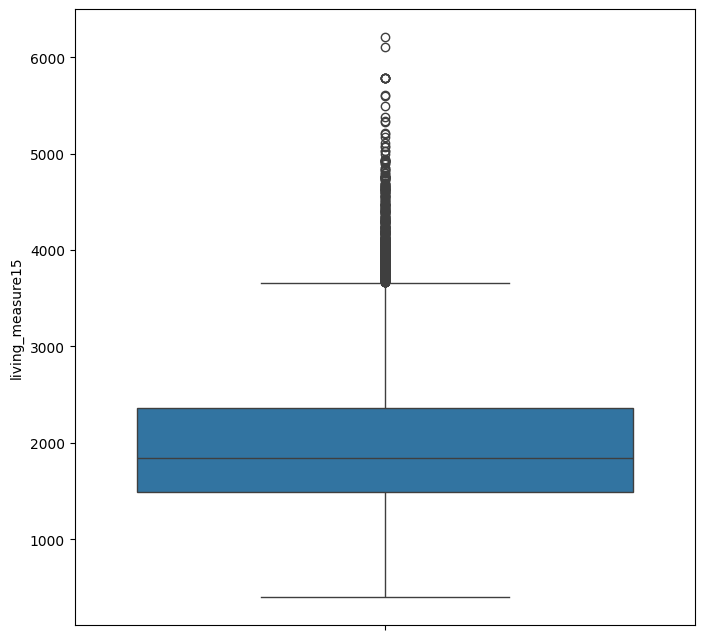

In [100]:
plt.figure(figsize=(8,8))
sns.boxplot(data4['living_measure15'])
plt.show()

In [101]:
data4['living_measure15'].median()

1840.0

In [102]:
data4['living_measure15'].fillna(1840.0,inplace=True)

In [103]:
data4['living_measure15'].isna().sum()

0

In [104]:
data4['lot_measure15']

0         8660.0
1         4100.0
2         2433.0
3         3794.0
4         5100.0
          ...   
21593    44224.0
21594     4944.0
21595    34412.0
21596     7800.0
21597     4875.0
Name: lot_measure15, Length: 21598, dtype: float64

In [105]:
data4['lot_measure15'].isna().sum()

29

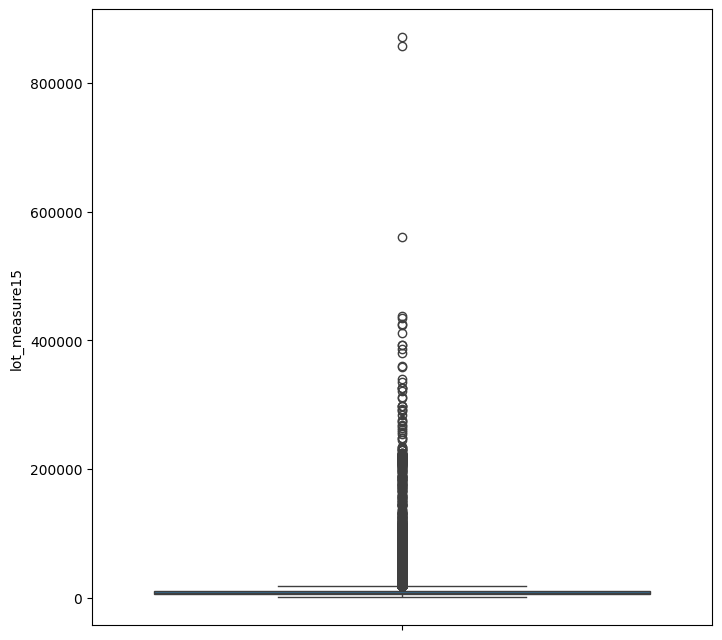

In [106]:
plt.figure(figsize=(8,8))
sns.boxplot(data4['lot_measure15'])
plt.show()

In [107]:
data4['lot_measure15'].median()

7620.0

In [108]:
data4['lot_measure15'].fillna(7620.0,inplace=True)

In [109]:
data4['lot_measure15'].isna().sum()

0

In [110]:
data4['total_area15'] = data4['living_measure15'] + data4['lot_measure15']

In [111]:
data5 = data4.drop(columns=['living_measure15','lot_measure15'])

In [112]:
data5.head()

dayhours   price  room_bed  room_bath  ceil  sight  condition  quality  \
0 2015-04-27  600000       4.0       1.75   1.0    0.0          3      8.0   
1 2015-03-17  190000       2.0       1.00   1.0    0.0          4      6.0   
2 2014-08-20  735000       4.0       2.75   2.0    4.0          3      8.0   
3 2014-10-10  257000       3.0       2.50   2.0    0.0          3      8.0   
4 2015-02-18  450000       2.0       1.00   1.0    0.0          3      7.0   

   ceil_measure  basement  yr_built  yr_renovated  zipcode      lat     long  \
0        1800.0    1250.0      1966             0    98034  47.7228 -122.183   
1         670.0       0.0      1948             0    98118  47.5546 -122.274   
2        3040.0       0.0      1966             0    98118  47.5188 -122.256   
3        1740.0       0.0      2009             0    98002  47.3363 -122.213   
4        1120.0       0.0      1924             0    98118  47.5663 -122.285   

   furnished  total_area  total_area15  
0        0.0     12490.0       10680.0  
1        0.0      3771.0        5760.0  
2        0.0      5455.0        5053.0  
3        0.0      5461.0        5824.0  
4        0.0      5710.0        6220.0

In [113]:
data5.isnull().sum()

dayhours         0
price            0
room_bed        94
room_bath       94
ceil             0
sight            0
condition        0
quality          0
ceil_measure     0
basement         0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
furnished        0
total_area       0
total_area15     0
dtype: int64

### Analyzing and preprocessing 'room_bed' attribute

In [114]:
data5['room_bed'].nunique()

13

* There are 13  unique values for 'room_bed' attribute in given dataset

In [115]:
data5['room_bed'].isna().sum()

94

* There are 94 missing values for 'room_bed' attribute in given dataset

In [116]:
data5['room_bed'].value_counts()

room_bed
3.0     9766
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: count, dtype: int64

In [117]:
## calculating average median price of house based on numbers of bed rooms.

data5.groupby(data5['room_bed'])['price'].median()

room_bed
0.0     288000.0
1.0     299000.0
2.0     373500.0
3.0     413000.0
4.0     549950.0
5.0     619000.0
6.0     652500.0
7.0     728580.0
8.0     700000.0
9.0     817000.0
10.0    660000.0
11.0    520000.0
33.0    640000.0
Name: price, dtype: float64

* we will fill the missing values of 'room_bed' attribute based on corresponding price.

In [118]:
data5['room_bed'].fillna('p',inplace=True)

* If we drop missing values from 'room_bed' directly we will loose 108 data points wherease after filling miisng values with condition given below and than dopping missing values we will loose only 18 datapoints.

In [119]:
room_bed = []
for i,j in zip(data5['price'],data5['room_bed']):
    if j == 'p':
        if (0 <= i < 288000):
            room_bed.append(0.0)
        elif (288000 <= i < 299000):
            room_bed.append(1.0)
        elif (299000 <= i < 373500):
            room_bed.append(2.0)
        elif (373500 <= i < 413000):
            room_bed.append(3.0)
        elif (413000 <= i < 549950):
            room_bed.append(4.0)
        elif (549950 <= i < 619000):
            room_bed.append(5.0)
        elif (619000 <= i <652500):
            room_bed.append(6.0)
        elif (652500 <= i <728580):
            room_bed.append(7.0)
        else:
            room_bed.append('p')
    else:
        room_bed.append(j)

In [120]:
data5['room_bed'] = room_bed

In [121]:
data5[data5['room_bed'] == 'p']

dayhours    price room_bed  room_bath  ceil  sight  condition  \
1816  2015-05-07   865000        p        NaN   2.0    0.0          3   
4956  2014-11-07   808100        p        NaN   1.0    0.0          5   
5060  2015-01-02   762500        p        NaN   2.0    0.0          3   
5513  2014-10-28   825000        p        NaN   2.0    0.0          3   
5946  2015-02-27  1400000        p        NaN   2.0    0.0          3   
6234  2014-10-28   740000        p        NaN   2.0    0.0          3   
8139  2015-04-15   730000        p        NaN   1.5    0.0          3   
8227  2015-04-02   750000        p        NaN   1.0    0.0          3   
9394  2014-09-04   802000        p        NaN   2.0    2.0          4   
9865  2015-04-15   785000        p        NaN   2.0    0.0          3   
10927 2014-07-10   800000        p        NaN   2.0    0.0          3   
14467 2015-04-21   939000        p        NaN   2.0    0.0          3   
14859 2014-06-17   870000        p        NaN   2.0    3.0          3   
16020 2014-09-16   957000        p        NaN   2.0    0.0          3   
18088 2014-07-07   780000        p        NaN   1.0    2.0          3   
19298 2015-04-20  1670000        p        NaN   2.0    0.0          4   
21166 2015-04-28   827000        p        NaN   2.5    0.0          3   

       quality  ceil_measure  basement  yr_built  yr_renovated  zipcode  \
1816       8.0        2130.0     620.0      1901          1987    98119   
4956       9.0        3020.0       0.0      1956             0    98133   
5060       9.0        2670.0     620.0      2005             0    98052   
5513       9.0        3230.0     530.0      2002             0    98029   
5946      10.0        2910.0       0.0      1989             0    98004   
6234       9.0        2960.0       0.0      1978             0    98008   
8139       8.0        1650.0       0.0      1900             0    98107   
8227      10.0        1740.0    1590.0      1976             0    98074   
9394       8.0        2130.0       0.0      1961             0    98006   
9865       9.0        3440.0       0.0      1994             0    98053   
10927      8.0        1700.0     520.0      1914          2000    98122   
14467      9.0        2240.0       0.0      1970             0    98040   
14859     10.0        1940.0    1070.0      1951          1996    98115   
16020      9.0        1750.0     620.0      1969          2008    98107   
18088      8.0        1400.0    1200.0      1953             0    98119   
19298     11.0        4320.0       0.0      1997             0    98004   
21166      9.0        1560.0     290.0      2004             0    98115   

           lat     long  furnished  total_area  total_area15  
1816   47.6513 -122.368        0.0      7437.0        3054.0  
4956   47.7174 -122.336        1.0     15367.0        9673.0  
5060   47.7067 -122.119        1.0      9170.0        7520.0  
5513   47.5489 -122.007        1.0      9020.0        7152.0  
5946   47.5845 -122.199        1.0     12954.0       14127.0  
6234   47.6218 -122.094        1.0     12310.0       13585.0  
8139   47.6743 -122.371        0.0      6650.0        6840.0  
8227   47.6318 -122.058        1.0     15738.0       13840.0  
9394   47.5672 -122.161        0.0     10864.0       10640.0  
9865   47.6969 -122.046        1.0     58102.0       47581.0  
10927  47.6170 -122.291        0.0      6220.0        5840.0  
14467  47.5489 -122.225        1.0     11924.0       11458.0  
14859  47.6933 -122.272        1.0      7897.0       11215.0  
16020  47.6718 -122.394        1.0      6206.0        6538.0  
18088  47.6370 -122.371        0.0      6710.0        5555.0  
19298  47.6440 -122.185        1.0     45136.0       46424.0  
21166  47.6831 -122.325        1.0      3180.0        3911.0

In [122]:
data5.loc[data5['room_bed']=='p','room_bed']=None

In [123]:
data5['room_bed'].isna().sum()

17

In [124]:
data5['room_bed'].value_counts()

room_bed
3.0     9774
4.0     6876
2.0     2762
5.0     1605
6.0      276
1.0      197
7.0       42
0.0       25
8.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: count, dtype: int64

In [125]:
data5['room_bed'].fillna(3.0,inplace=True)

In [126]:
data5['room_bed'].isna().sum()

0

In [127]:
data5

dayhours    price  room_bed  room_bath  ceil  sight  condition  \
0     2015-04-27   600000       4.0       1.75   1.0    0.0          3   
1     2015-03-17   190000       2.0       1.00   1.0    0.0          4   
2     2014-08-20   735000       4.0       2.75   2.0    4.0          3   
3     2014-10-10   257000       3.0       2.50   2.0    0.0          3   
4     2015-02-18   450000       2.0       1.00   1.0    0.0          3   
...          ...      ...       ...        ...   ...    ...        ...   
21593 2015-03-10   685530       4.0       2.50   2.0    0.0          3   
21594 2014-05-21   535000       2.0       1.00   1.0    0.0          3   
21595 2014-09-05   998000       3.0       3.75   2.0    0.0          3   
21596 2015-02-06   262000       4.0       2.50   2.0    0.0          3   
21597 2014-12-29  1150000       4.0       2.50   2.0    0.0          4   

       quality  ceil_measure  basement  yr_built  yr_renovated  zipcode  \
0          8.0        1800.0    1250.0      1966             0    98034   
1          6.0         670.0       0.0      1948             0    98118   
2          8.0        3040.0       0.0      1966             0    98118   
3          8.0        1740.0       0.0      2009             0    98002   
4          7.0        1120.0       0.0      1924             0    98118   
...        ...           ...       ...       ...           ...      ...   
21593      9.0        3130.0       0.0      1996             0    98014   
21594      7.0         920.0     110.0      1939             0    98103   
21595     10.0        2910.0     800.0      1978             0    98075   
21596      7.0        1560.0       0.0      1997             0    98168   
21597      9.0        1940.0       0.0      1925             0    98112   

           lat     long  furnished  total_area  total_area15  
0      47.7228 -122.183        0.0     12490.0       10680.0  
1      47.5546 -122.274        0.0      3771.0        5760.0  
2      47.5188 -122.256        0.0      5455.0        5053.0  
3      47.3363 -122.213        0.0      5461.0        5824.0  
4      47.5663 -122.285        0.0      5710.0        6220.0  
...        ...      ...        ...         ...           ...  
21593  47.6618 -121.962        1.0     63597.0       47004.0  
21594  47.6860 -122.341        0.0      5871.0        6474.0  
21595  47.5888  -122.04        1.0     38122.0       36802.0  
21596  47.5140 -122.316        0.0      9360.0        8960.0  
21597  47.6427 -122.304        1.0      6815.0        6665.0  

[21598 rows x 18 columns]

In [128]:
data5.isnull().sum()

dayhours         0
price            0
room_bed         0
room_bath       94
ceil             0
sight            0
condition        0
quality          0
ceil_measure     0
basement         0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
furnished        0
total_area       0
total_area15     0
dtype: int64

### Analyzing and preprocessing 'room_bath' attribute

In [129]:
data5['room_bath'].nunique()

30

* There are 30 unique values for 'room_bath' attribute in given dataset

In [130]:
data5['room_bath'].isna().sum()

94

* There are 94 missing value in 'room_bath' column in given datset

In [131]:
data2['room_bath'].value_counts()

room_bath
2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: count, dtype: int64

In [132]:
## calculating average median price of house based on numbers of bath room.

data1.groupby(data['room_bath'])['price'].median()

room_bath
0.00     317500.0
0.50     264000.0
0.75     273500.0
1.00     320000.0
1.25     516500.0
1.50     370000.0
1.75     422800.0
2.00     422500.0
2.25     472500.0
2.50     499950.0
2.75     605000.0
3.00     600000.0
3.25     837352.0
3.50     823250.0
3.75    1070000.0
4.00    1060000.0
4.25    1390000.0
4.50    1060000.0
4.75    2300000.0
5.00    1430000.0
5.25    1420000.0
5.50    2340000.0
5.75    1930000.0
6.00    2895000.0
6.25    3095000.0
6.50    1710000.0
6.75    2735000.0
7.50     450000.0
7.75    6890000.0
8.00    4990000.0
Name: price, dtype: float64

* Fill the missing values with mode of given column

In [133]:
data5['room_bath'].mode()

0    2.5
Name: room_bath, dtype: float64

In [134]:
data5['room_bath'].fillna(2.5,inplace=True)

### Preprocessing 'long' attribute

In [135]:
data5['long']

0       -122.183
1       -122.274
2       -122.256
3       -122.213
4       -122.285
          ...   
21593   -121.962
21594   -122.341
21595    -122.04
21596   -122.316
21597   -122.304
Name: long, Length: 21598, dtype: object

In [136]:
data5['long'].unique()

array([-122.183, -122.274, -122.256, -122.213, -122.285, '$', -122.333,
       -122.165, -122.15, -122.178, -121.87, -122.352, -122.122, -122.275,
       -122.234, -122.324, -122.321, -122.277, -122.196, -122.398,
       -122.019, -122.181, -122.325, -122.191, -122.026, -122.084, -122.3,
       -122.287, -122.011, -122.127, -122.281, -122.221, -121.859,
       -121.913, -122.39, -121.871, -122.013, -122.381, -122.279,
       -122.194, -122.201, -122.125, -122.379, -122.121, -122.024,
       -122.389, -122.305, -122.346, -122.375, -122.344, -122.028,
       -122.193, -122.209, -122.365, -122.28, -122.334, -122.149,
       -122.388, -122.016, -122.298, -122.153, -121.802, -121.878,
       -122.218, -122.359, -122.296, -122.361, -122.357, -122.309,
       -122.056, -121.974, -122.18, -122.331, -122.374, -121.976,
       -121.975, -122.216, -122.188, -122.391, -122.31, -122.302,
       -121.972, -122.22, -122.17, -122.101, -121.888, -122.046, -122.154,
       -122.145, -122.236, -122.168, 

In [137]:
len(data5[data5['long'] == '$'])

34

* In 'long' column we have 34 rows with '$' values and we will fill it wid mode value

In [138]:
data5.loc[data5['long']=='$','long'] = None

In [139]:
data5['long'].mode()

0   -122.29
Name: long, dtype: object

In [140]:
data5['long'].fillna(-122.29,inplace=True)

In [141]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21598 entries, 0 to 21597
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dayhours      21598 non-null  datetime64[ns]
 1   price         21598 non-null  int64         
 2   room_bed      21598 non-null  float64       
 3   room_bath     21598 non-null  float64       
 4   ceil          21598 non-null  float64       
 5   sight         21598 non-null  float64       
 6   condition     21598 non-null  int64         
 7   quality       21598 non-null  float64       
 8   ceil_measure  21598 non-null  float64       
 9   basement      21598 non-null  float64       
 10  yr_built      21598 non-null  int32         
 11  yr_renovated  21598 non-null  int64         
 12  zipcode       21598 non-null  int64         
 13  lat           21598 non-null  float64       
 14  long          21598 non-null  float64       
 15  furnished     21598 non-null  float6

In [142]:
data5.isnull().sum()

dayhours        0
price           0
room_bed        0
room_bath       0
ceil            0
sight           0
condition       0
quality         0
ceil_measure    0
basement        0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
furnished       0
total_area      0
total_area15    0
dtype: int64

In [143]:
data.shape[0] - data5.shape[0]

15

* After preprocessing we lost only 15 data-points instead if we had dropped all the rows with missing values we would have lost 689 data points.

## Data Analysis

 * We will be using dataset before and after feature engineering for the data analysis since during feature engineering we drop few columns that we will be not required during model building but can be used for analysis purpose

In [144]:
df = data5

In [145]:
df

dayhours    price  room_bed  room_bath  ceil  sight  condition  \
0     2015-04-27   600000       4.0       1.75   1.0    0.0          3   
1     2015-03-17   190000       2.0       1.00   1.0    0.0          4   
2     2014-08-20   735000       4.0       2.75   2.0    4.0          3   
3     2014-10-10   257000       3.0       2.50   2.0    0.0          3   
4     2015-02-18   450000       2.0       1.00   1.0    0.0          3   
...          ...      ...       ...        ...   ...    ...        ...   
21593 2015-03-10   685530       4.0       2.50   2.0    0.0          3   
21594 2014-05-21   535000       2.0       1.00   1.0    0.0          3   
21595 2014-09-05   998000       3.0       3.75   2.0    0.0          3   
21596 2015-02-06   262000       4.0       2.50   2.0    0.0          3   
21597 2014-12-29  1150000       4.0       2.50   2.0    0.0          4   

       quality  ceil_measure  basement  yr_built  yr_renovated  zipcode  \
0          8.0        1800.0    1250.0      1966             0    98034   
1          6.0         670.0       0.0      1948             0    98118   
2          8.0        3040.0       0.0      1966             0    98118   
3          8.0        1740.0       0.0      2009             0    98002   
4          7.0        1120.0       0.0      1924             0    98118   
...        ...           ...       ...       ...           ...      ...   
21593      9.0        3130.0       0.0      1996             0    98014   
21594      7.0         920.0     110.0      1939             0    98103   
21595     10.0        2910.0     800.0      1978             0    98075   
21596      7.0        1560.0       0.0      1997             0    98168   
21597      9.0        1940.0       0.0      1925             0    98112   

           lat     long  furnished  total_area  total_area15  
0      47.7228 -122.183        0.0     12490.0       10680.0  
1      47.5546 -122.274        0.0      3771.0        5760.0  
2      47.5188 -122.256        0.0      5455.0        5053.0  
3      47.3363 -122.213        0.0      5461.0        5824.0  
4      47.5663 -122.285        0.0      5710.0        6220.0  
...        ...      ...        ...         ...           ...  
21593  47.6618 -121.962        1.0     63597.0       47004.0  
21594  47.6860 -122.341        0.0      5871.0        6474.0  
21595  47.5888 -122.040        1.0     38122.0       36802.0  
21596  47.5140 -122.316        0.0      9360.0        8960.0  
21597  47.6427 -122.304        1.0      6815.0        6665.0  

[21598 rows x 18 columns]

In [146]:
df['dayhours'].max()

Timestamp('2015-05-27 00:00:00')

In [147]:
df['dayhours'].min()

Timestamp('2014-05-02 00:00:00')

In [148]:
df['dayhours'].max() - df['dayhours'].min()

Timedelta('390 days 00:00:00')

* We have data of houses that where sold between 2014-05-02 to 2015-05-27 i.e. the data of houses that where sold in this 390 days

In [149]:
df['house_sold_day'] = df['dayhours'].dt.day

In [150]:
df['house_sold_month'] = df['dayhours'].dt.month

In [151]:
df['house_sold_year'] = df['dayhours'].dt.year

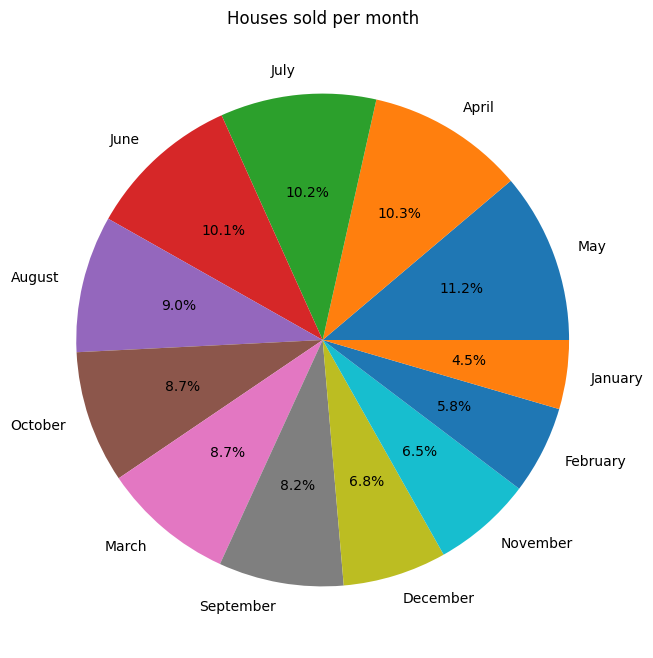

In [152]:
plt.figure(figsize=(8,8))
month = list(df['house_sold_month'].value_counts().index)
count = list(df['house_sold_month'].value_counts())
month_names = [calendar.month_name[int(month)] for month in list(df['house_sold_month'].value_counts().index)]
plt.pie(count,labels=month_names,autopct='%1.1f%%')
plt.title("Houses sold per month")
plt.show()

* It can be observed that from the given dataset the the months in which there is good sales of house are 'May','April','July','June','August','October','March','September' and sales of house decreased in months of 'December','Februrary','November','January'
* May is month where highest number of  houses where sold and in january least number of houses where sold.

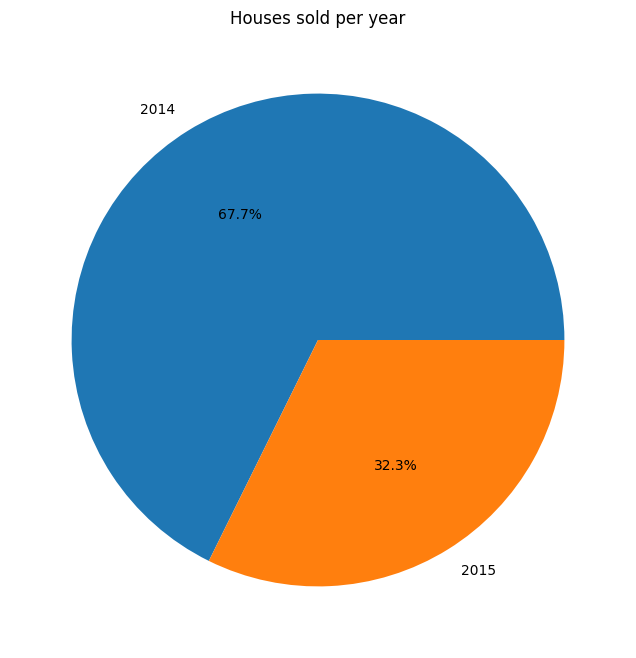

In [153]:
plt.figure(figsize=(8,8))
year = list(df['house_sold_year'].value_counts().index)
count = list(df['house_sold_year'].value_counts())
plt.pie(count,labels=year,autopct='%1.1f%%')
plt.title("Houses sold per year")
plt.show()

* From given dataset the sales of house where more in 2014 as comapre to 2015.

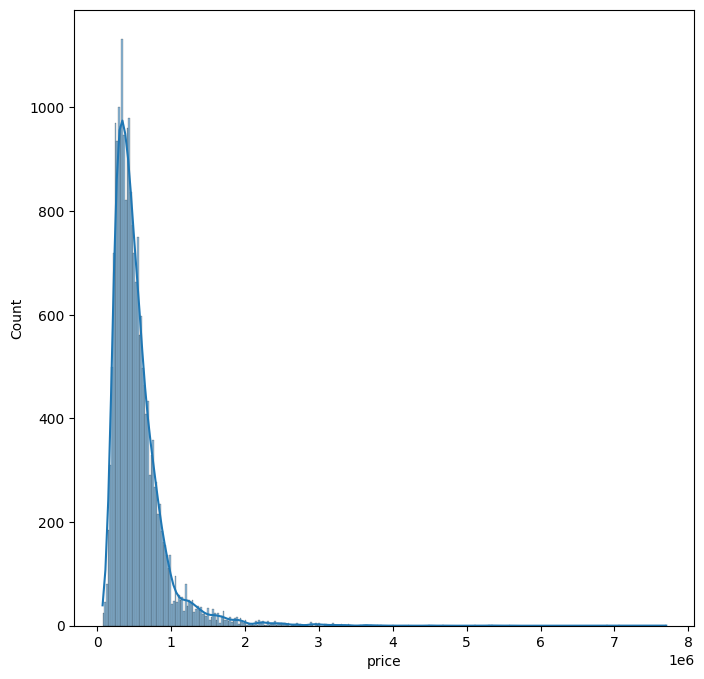

In [154]:
plt.figure(figsize=(8,8))
sns.histplot(df['price'],kde=True)
plt.show()

* The distribution of price of houses is positively skewed.
* We have majority data of house whose price is between 75000 to 1000000.
* Very less data for house with high price
* Most cheap house in dataset cost 75000 and most expensive house in data cost 7700000

In [155]:
def count_outlier(col):
    data = df[col]
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75) 
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    num_outliers = len(outliers)
    return num_outliers


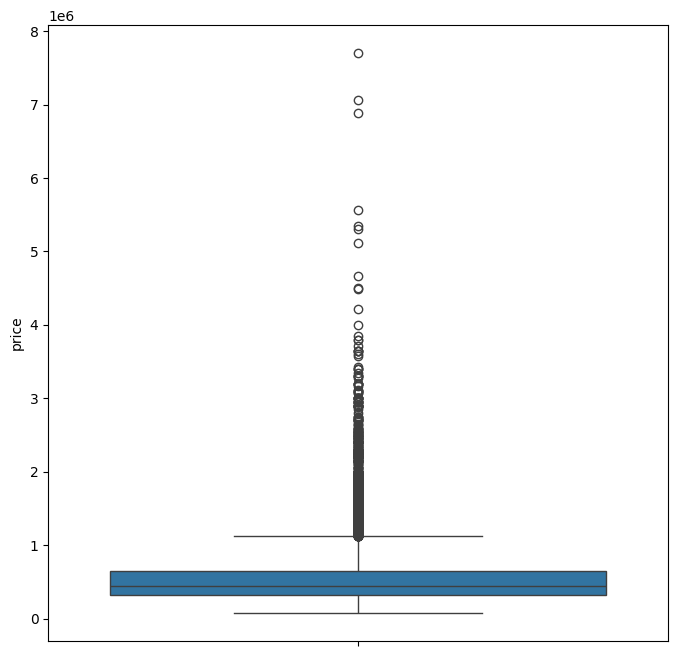

In [156]:
plt.figure(figsize=(8,8))
sns.boxplot(df['price'])
plt.show()

In [157]:
count_outlier('price')

1159

* There are 1159 outliers in price column

In [158]:
df['room_bed'].value_counts()

room_bed
3.0     9791
4.0     6876
2.0     2762
5.0     1605
6.0      276
1.0      197
7.0       42
0.0       25
8.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: count, dtype: int64

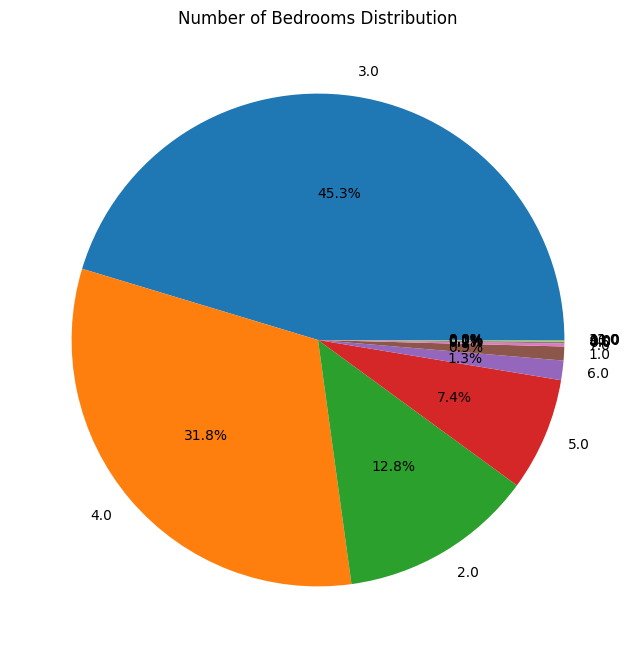

In [159]:
plt.figure(figsize=(8, 8))
bed_rooms = list(df['room_bed'].value_counts().index)
count = list(df['room_bed'].value_counts())
plt.pie(count,labels=bed_rooms,autopct='%1.1f%%')

plt.title('Number of Bedrooms Distribution')
plt.show()

* From above pie chart we can observe that according to dataset out of total number of houses sold during above mentioned time-period, the house with 3 bed rooms were sold most (45.3%) followed by houses with 4 bed rooms (31.8%) than houses with 2 bedrooms (12.8%) than houses with 5 bedrooms (7.4%) and houses with 0,1,6,7,8,9,10 bedrooms were least sold and only 1 house with 11 and 33 bedrooms were sold. Out of house with 33 bedrooms act as outlier we must remove it before modeling.

In [160]:
df['room_bath'].value_counts()

room_bath
2.50    5452
1.00    3829
1.75    3031
2.25    2038
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: count, dtype: int64

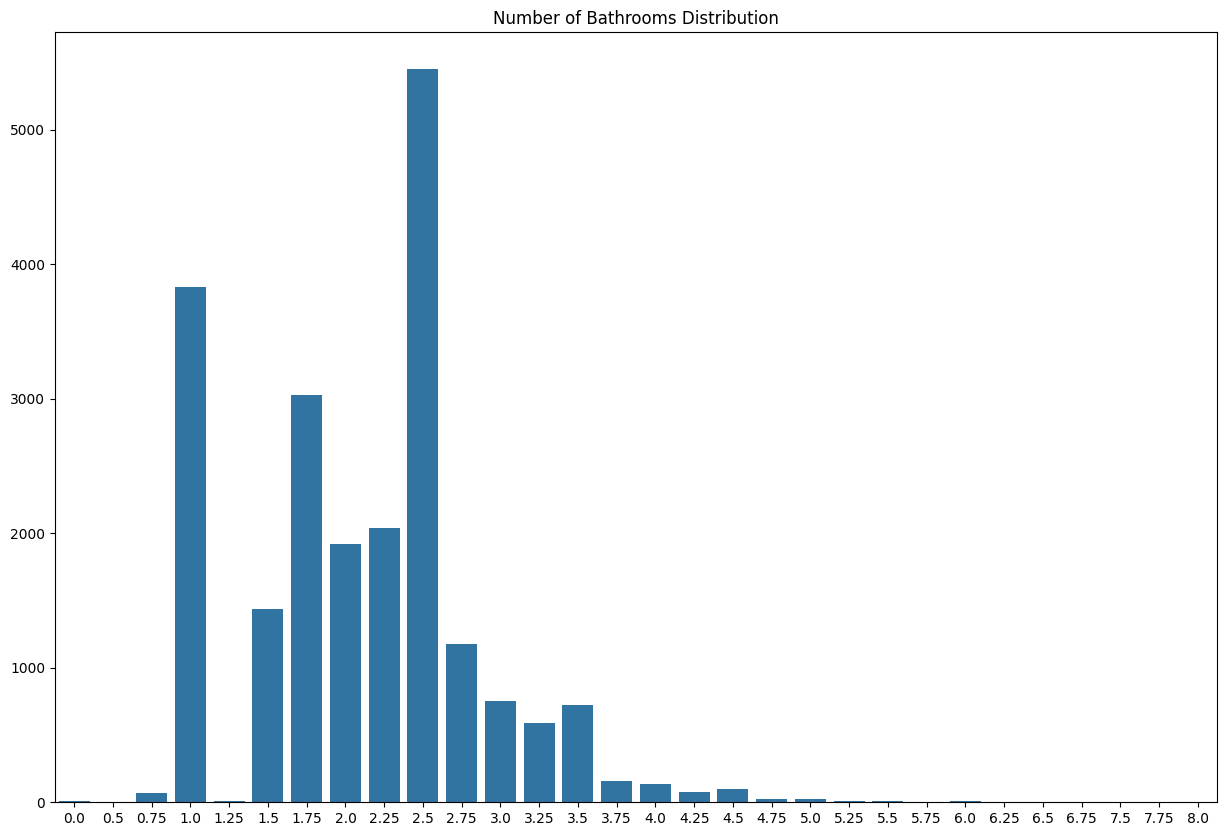

In [161]:
plt.figure(figsize=(15,10))
bed_rooms = list(df['room_bath'].value_counts().index)
count = list(df['room_bath'].value_counts())
sns.barplot(x=bed_rooms,y=count)

plt.title('Number of Bathrooms Distribution')
plt.show()

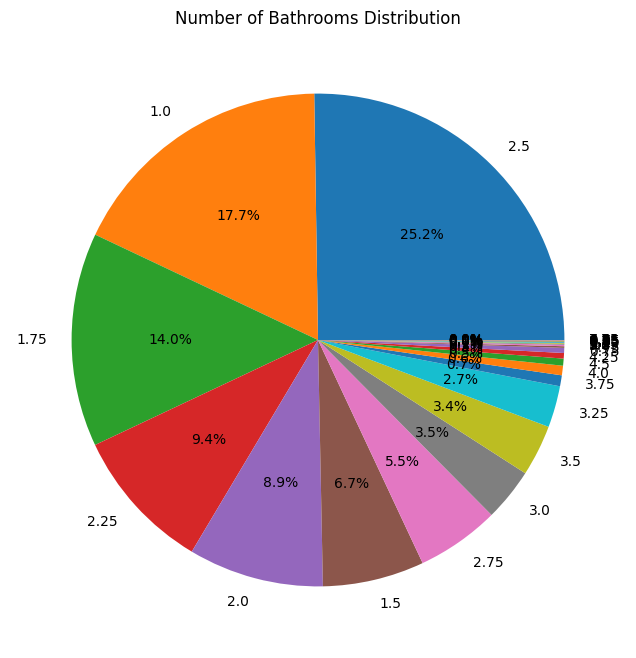

In [162]:
plt.figure(figsize=(8,8))
bed_rooms = list(df['room_bath'].value_counts().index)
count = list(df['room_bath'].value_counts())
plt.pie(count,labels=bed_rooms,autopct='%1.1f%%')

plt.title('Number of Bathrooms Distribution')
plt.show()

* From the plotted bar graph and pie chart it can be observed according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold had 2.5 bathroom aprrox (25.2%) followed by 1 bathroom nearly (17.7%) than comes houses with 1.75 bathroom about (14%) than 2.25 bathroom around (9.4%) than comes houses with 2 bathroom (8.9%) after which there is drop.

In [163]:
df['ceil'].value_counts()

ceil
1.0    10707
2.0     8208
1.5     1905
3.0      609
2.5      161
3.5        8
Name: count, dtype: int64

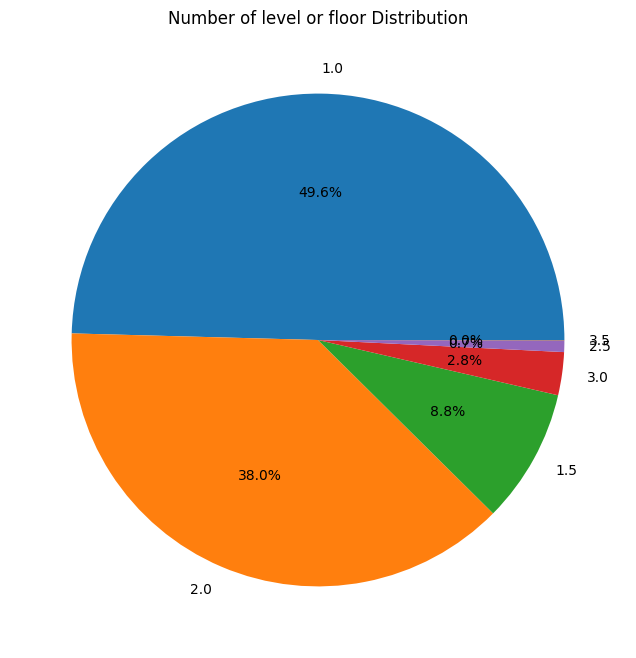

In [164]:
plt.figure(figsize=(8,8))
ceil = list(df['ceil'].value_counts().index)
count = list(df['ceil'].value_counts())
plt.pie(count,labels=ceil,autopct='%1.1f%%',)
plt.title('Number of level or floor Distribution')
plt.show()

* From pie chart it can be observed according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold had 1 floor aprrox (49.6%) followed by 2 floor nearly (38%) than there is sudden drop is sales of total number of house with levels or floor of 1.5,3,2.5 and 3.5. Where the least number of houses where sold with 3.5 level or floors.

In [165]:
df['sight'].value_counts()

sight
0.0    19480
2.0      958
3.0      510
1.0      332
4.0      318
Name: count, dtype: int64

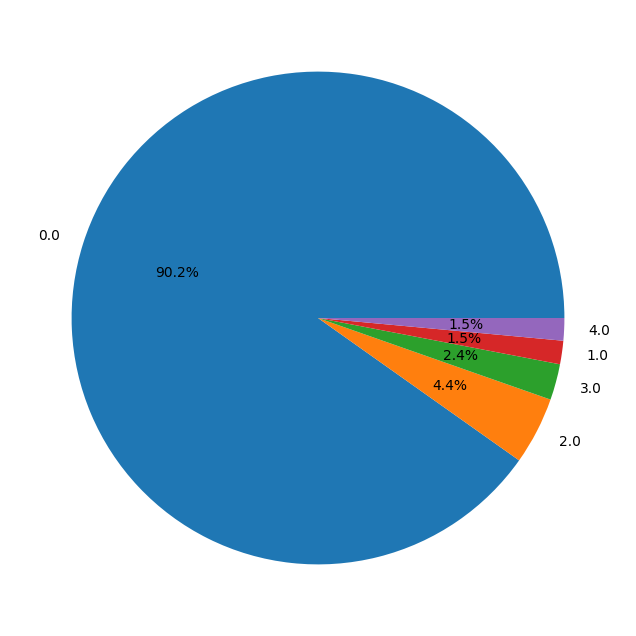

In [166]:
plt.figure(figsize=(8,8))
sight =  list(df['sight'].value_counts().index)
count = list(df['sight'].value_counts())
plt.pie(count,labels=sight,autopct='%1.1f%%',)
plt.show()

* From pie chart it can be observed according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were sold at once i.e. that they were not sighted  aprrox (90.2%). And the houses which were viewd 4 times were sold least (1.5%).

In [167]:
d = data[data['coast'] != '$']

In [168]:
d['coast'].value_counts()

coast
0    21421
1      161
Name: count, dtype: int64

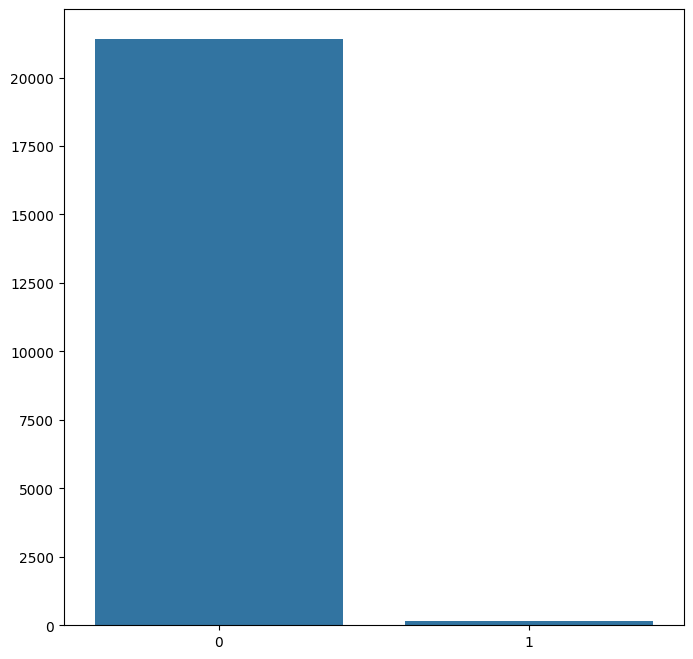

In [169]:
plt.figure(figsize=(8,8))
coast =  list(d['coast'].value_counts().index)
count = list(d['coast'].value_counts())
sns.barplot(x=coast,y=count)
plt.show()

* From bar chart it can be observed according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were sold does not have view to wavefront which is arrounf (99.3%) and only (0.7%) how total number of houses that were sold had a view to wavefront. We drop this column as it has 99.3% of its data as 0 which will not contribute to modeling.

In [170]:
df['condition'].value_counts()

condition
3    14052
4     5652
5     1693
2      171
1       30
Name: count, dtype: int64

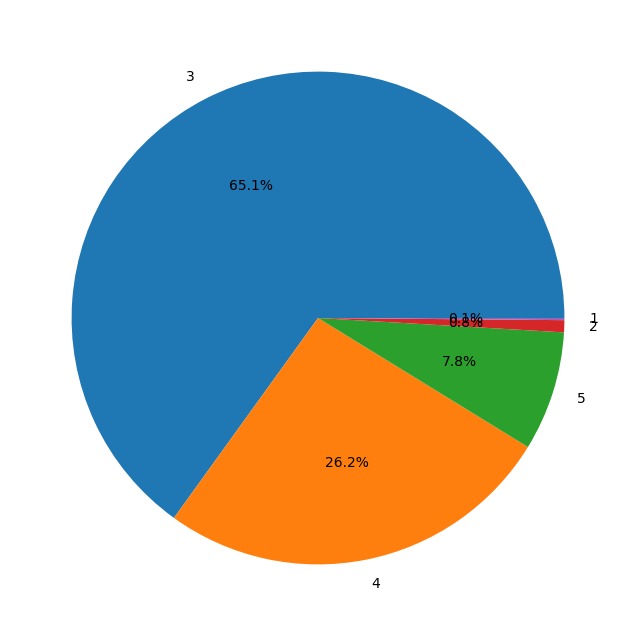

In [171]:
plt.figure(figsize=(8,8))
condition =  list(df['condition'].value_counts().index)
count = list(df['condition'].value_counts())
plt.pie(count,labels=condition,autopct='%1.1f%%',)
plt.show()

* From pie chart it can be observed according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold was rate 3 for their condition around 
(65.1%) followed by the houses that were rated 4 approx (26.2%) than comes house that were rated 5 than 2 than 1.

In [172]:
df['quality'].value_counts()

quality
7.0     8973
8.0     6063
9.0     2614
6.0     2037
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: count, dtype: int64

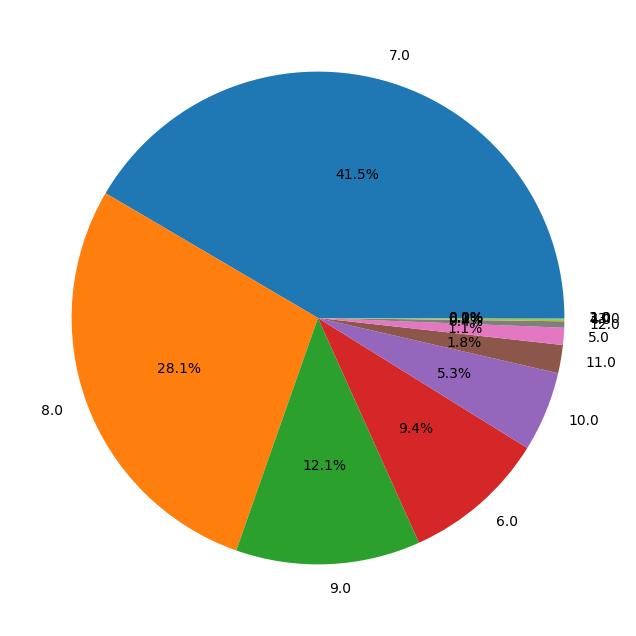

In [173]:
plt.figure(figsize=(8,8))
quality =  list(df['quality'].value_counts().index)
count = list(df['quality'].value_counts())
plt.pie(count,labels=quality,autopct='%1.1f%%',)
plt.show()

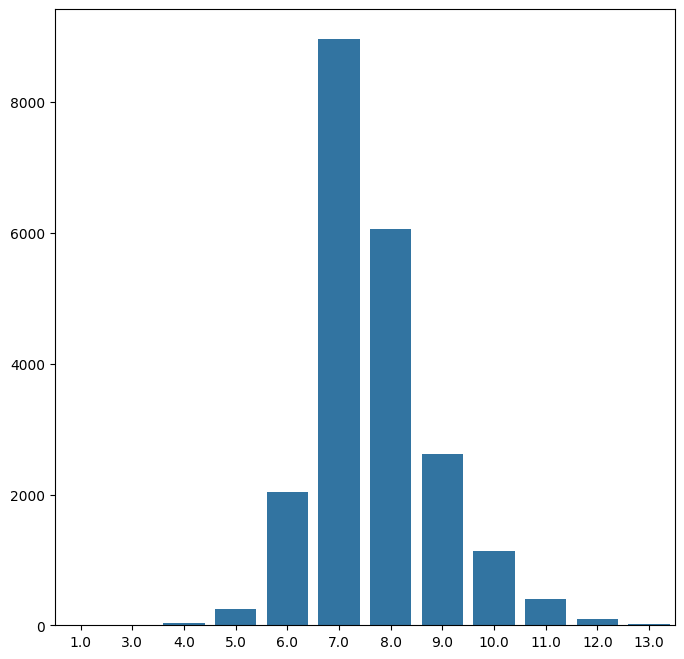

In [174]:
plt.figure(figsize=(8,8))
quality =  list(df['quality'].value_counts().index)
count = list(df['quality'].value_counts())
sns.barplot(x=quality,y=count)
plt.show()

* From bar plot and pie chart it can be observed according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were given quality ration of 7.0 which is (41.5%) followed by houses with rating of 8.0 which is approx (28.1%) than comes houses with quality rating of 9.0 which is (12.1%) followed by houses with quality rating of 6.0 that covers (9.4%) of total number of houses sold followed by ratings of 10.0,11.0,5.0,12.0,4.0,13.0,3.0 and 1.0. Only one house was sold with quality rating of 1.0 and 33 were sold with quality rating of 3.0.

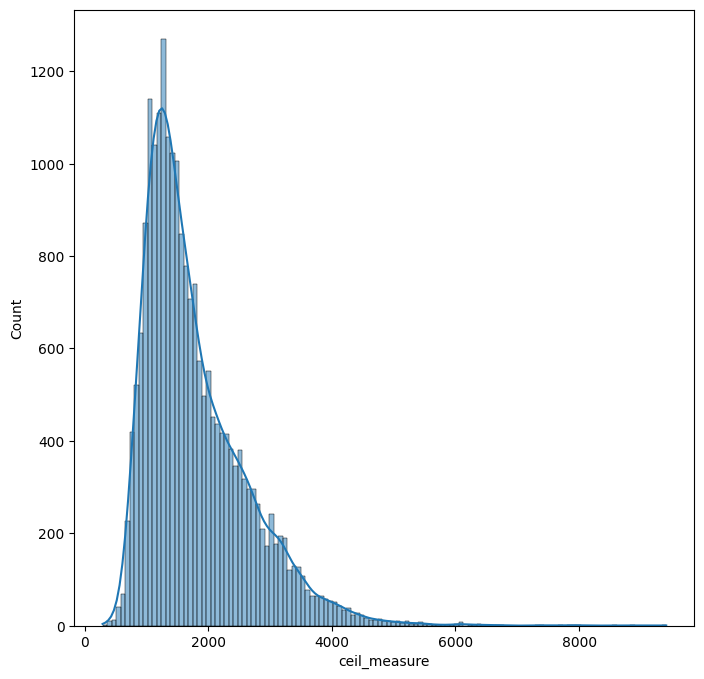

In [175]:
plt.figure(figsize=(8,8))
sns.histplot(df['ceil_measure'],kde=True)
plt.show()

* From distribution plot according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were had ceil measure between 1000 sq.ft to 3000 sq.ft
* The distribution of ceil measure is positively skewed which says that in given dataset during given time-period the number of houses that were sold majority of them has ceil measure between 1000 sq.ft to 3000 sq.ft and were less houses were sold with ceil measure more than 4000 sq.ft.

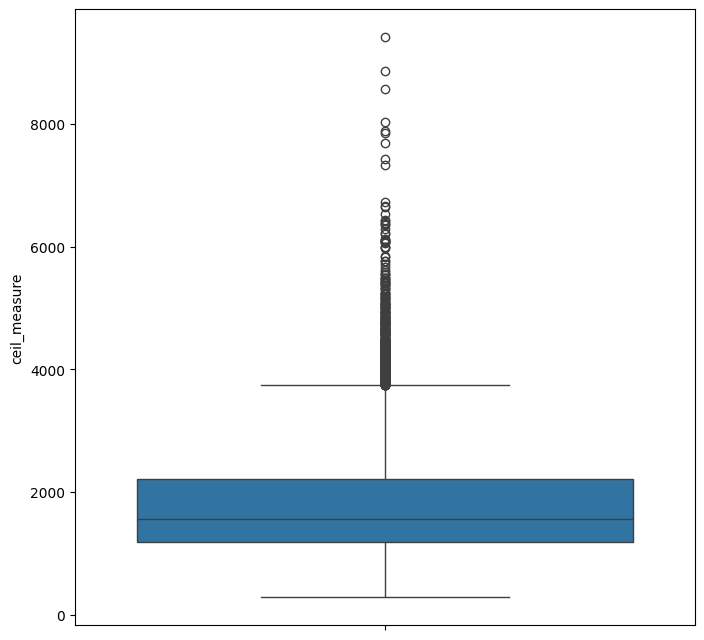

In [176]:
plt.figure(figsize=(8,8))
sns.boxplot(df['ceil_measure'])
plt.show()

In [177]:
count_outlier('ceil_measure')

611

* There are 611 outlier i.e. 611 houses were sold during above mentioned time-period whose ceil measure were higher than normal in given data.

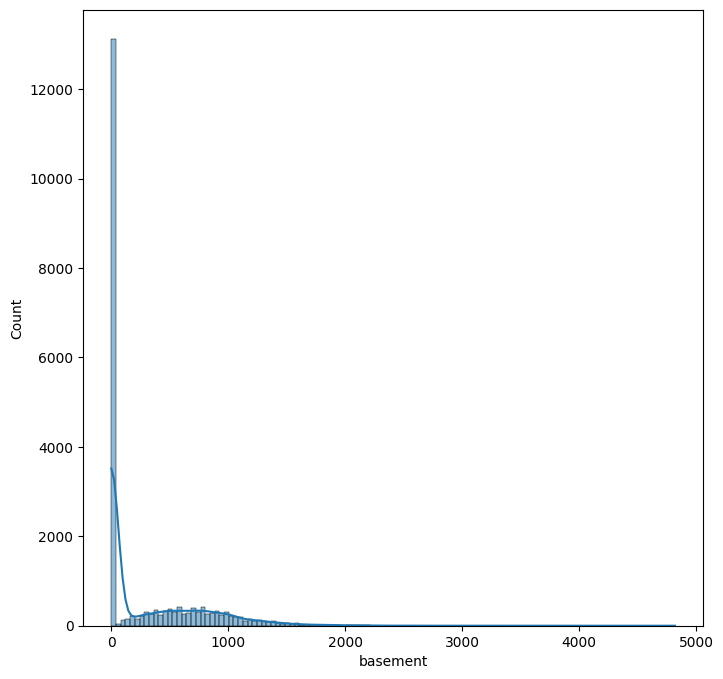

In [178]:
plt.figure(figsize=(8,8))
sns.histplot(df['basement'],kde=True)
plt.show()

* The distribution of basement measure is positively skewed which says that in given dataset during given time-period the number of houses that were sold majority of them does not had a basement. Than very less houses that were sold had a basement of with measure between 250 sq.ft to 1250 sq.ft and very less houses were sold with basement measure more than 1500 sq.ft

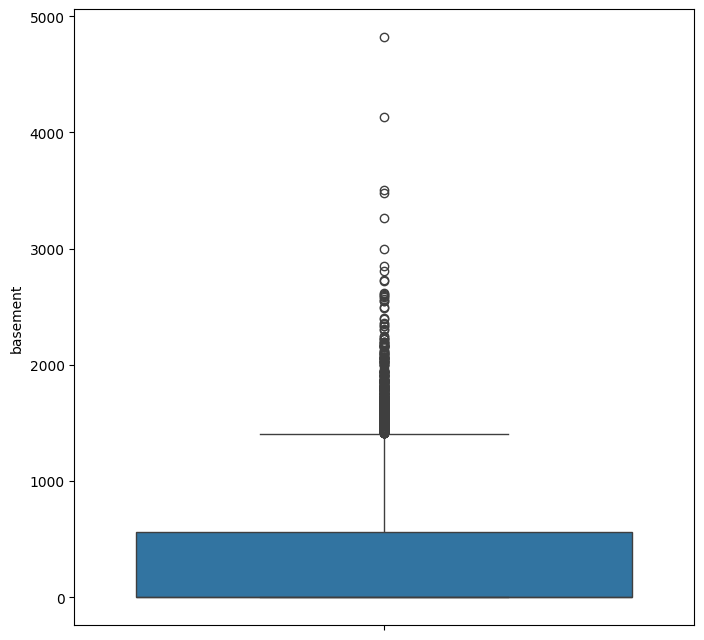

In [179]:
plt.figure(figsize=(8,8))
sns.boxplot(df['basement'])
plt.show()

In [180]:
count_outlier('basement')

495

* There are 495 outliers in basement measure i.e. out of all houses sold there are 495 houses with lager basement measure.

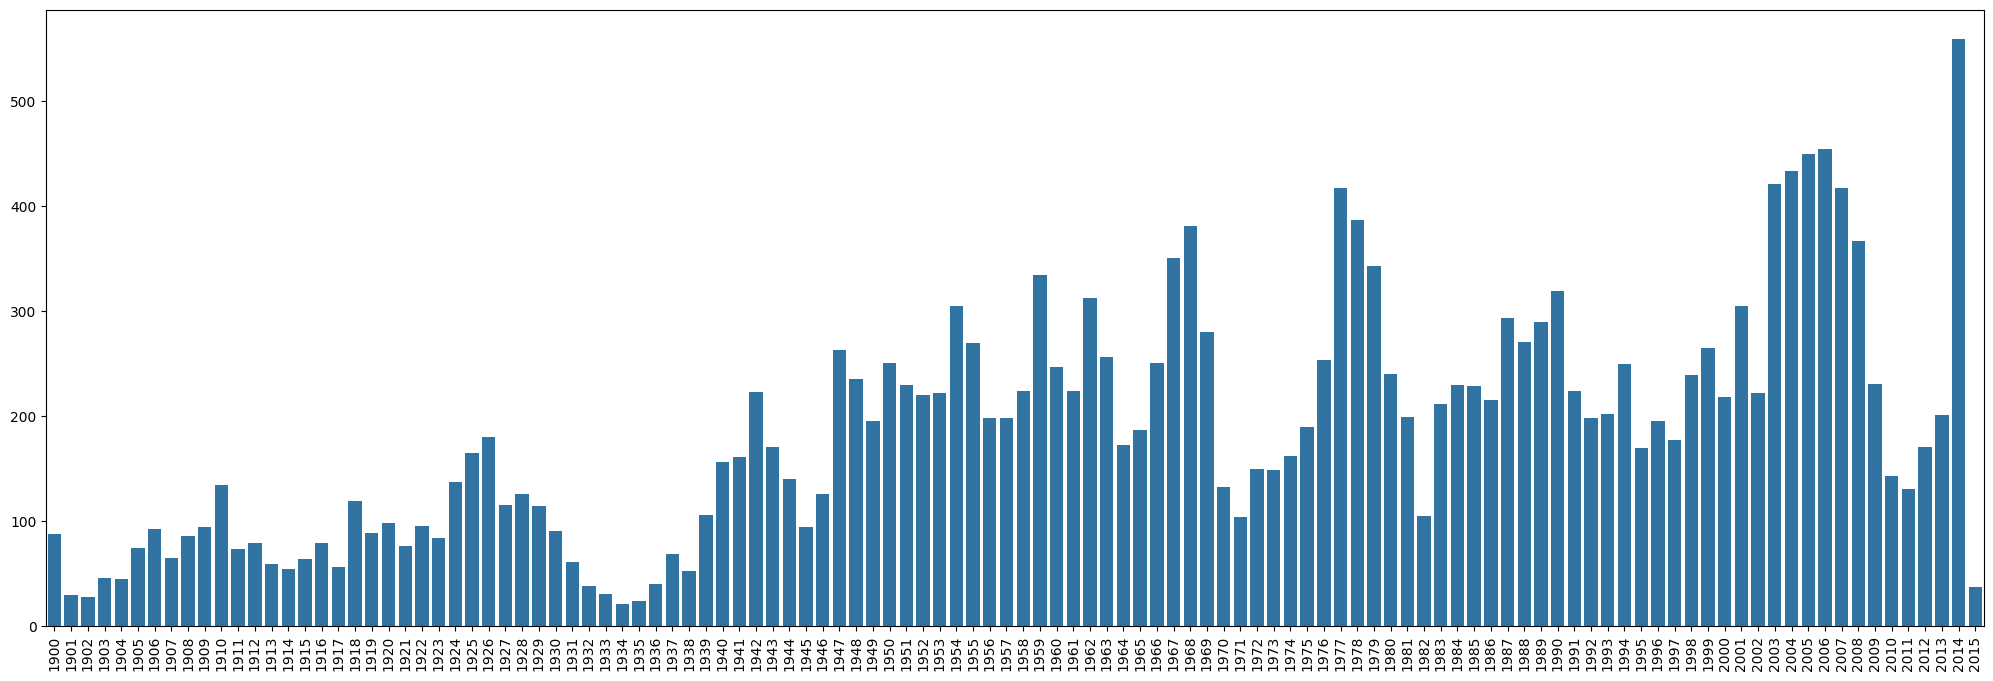

In [181]:
plt.figure(figsize=(25,8))
built =  list(df['yr_built'].value_counts().index)
count = list(df['yr_built'].value_counts())
sns.barplot(x=built,y=count)
plt.xticks(rotation=90)
plt.show()

* In given dataset we have house that was built in 1900 to house that was built in 2015. And they all were sold. But majoirty of houses that got sold in above mentioned time-period was built in 2014 i.e. those houses which were built recently were sold most as we have data of house sold in 2014-2015.
* It is observable that the houses which were made after 1947 were sold highly.

In [182]:
df['House_age'] = df['house_sold_year'] - df['yr_built']

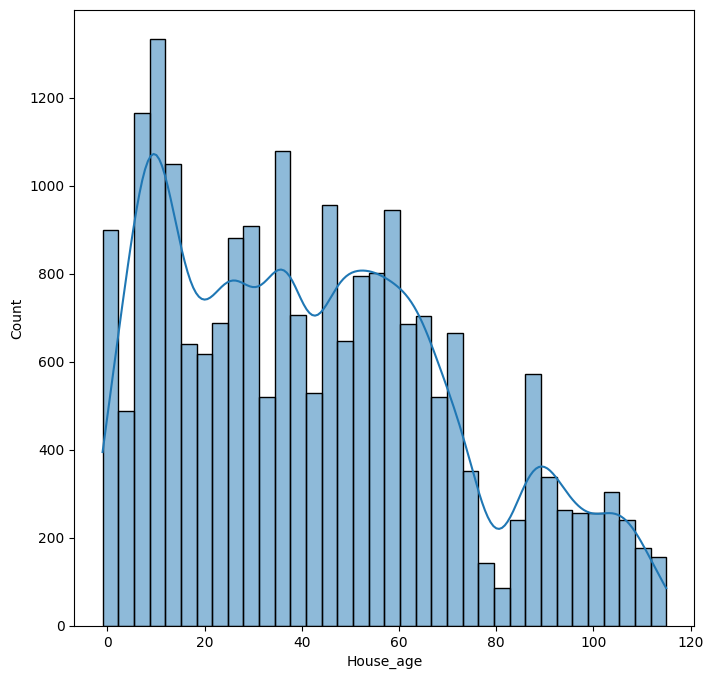

In [183]:
plt.figure(figsize=(8,8))
sns.histplot(df['House_age'],kde=True)
plt.show()

* As the age of house in increasing they are not getting sold.

In [184]:
df['yr_renovated'].value_counts()

yr_renovated
0       20686
2014       91
2013       37
2003       36
2007       35
        ...  
1944        1
1948        1
1959        1
1951        1
1954        1
Name: count, Length: 70, dtype: int64

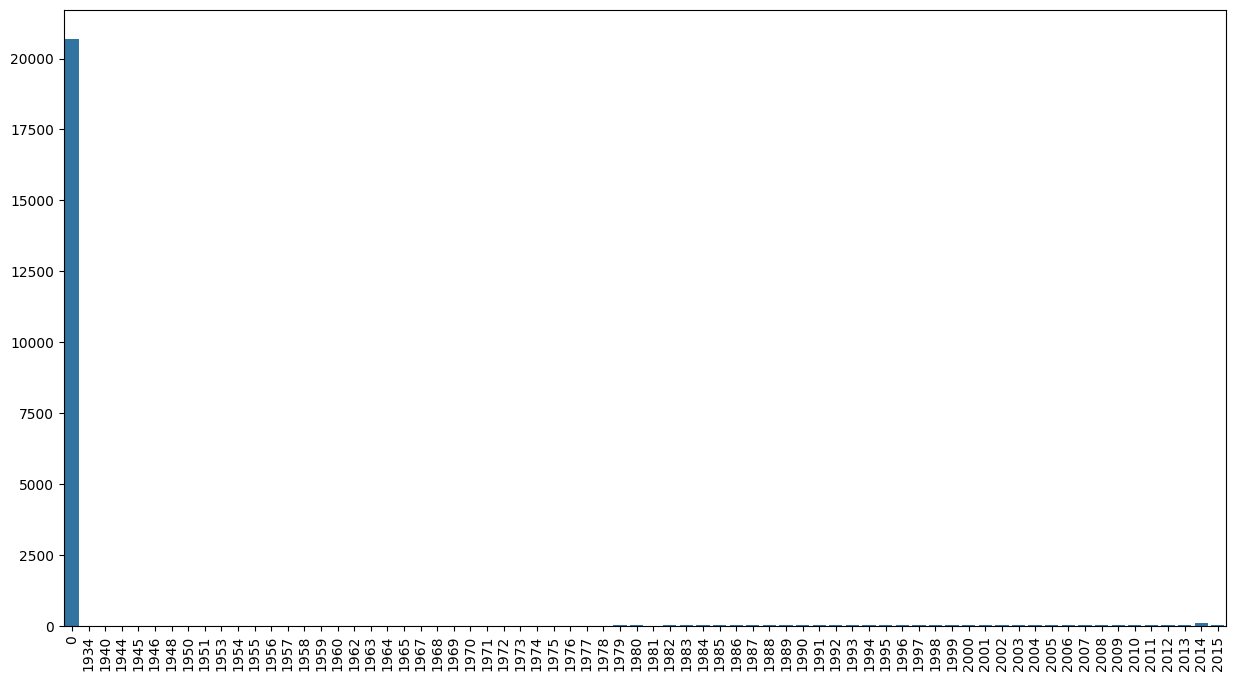

In [185]:
plt.figure(figsize=(15,8))
renovate =  list(df['yr_renovated'].value_counts().index)
count = list(df['yr_renovated'].value_counts())
sns.barplot(x=renovate,y=count)
plt.xticks(rotation=90)
plt.show()

* From bar plot it can be observed according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were not renovated. We will drop this column during modeling as it has majority of it's value to be 0.

In [186]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

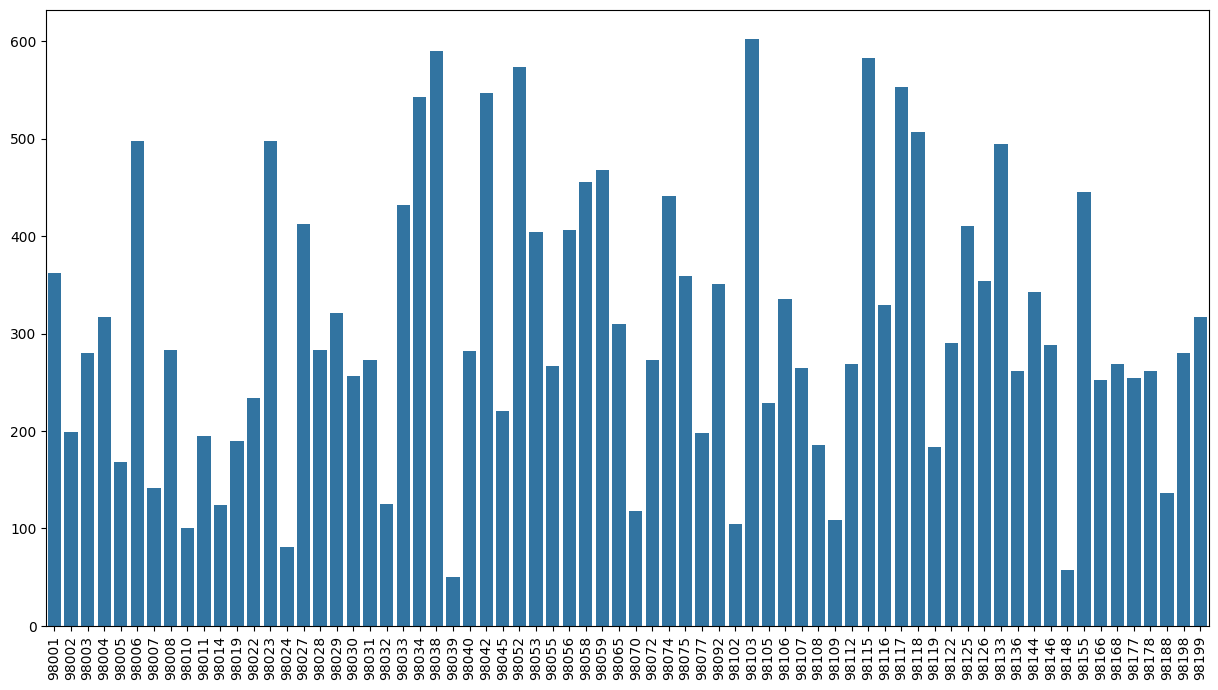

In [187]:
plt.figure(figsize=(15,8))
code =  list(df['zipcode'].value_counts().index)
count = list(df['zipcode'].value_counts())
sns.barplot(x=code,y=count)
plt.xticks(rotation=90)
plt.show()

* The houses with zipcode 98103 were sold most and houses with zipcode 98039 were least sold. We will drop this attribute as zip should work like a categorically feature rather than continuos data but here its not like that which can lead to problem while modeling.

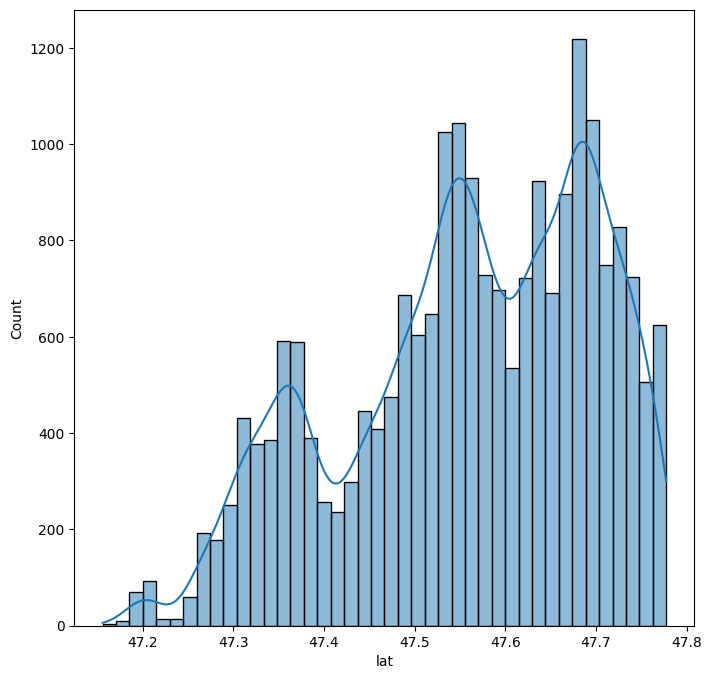

In [188]:
plt.figure(figsize=(8,8))
sns.histplot(df['lat'],kde=True)
plt.show()

* The houses at higher latitude are sold most according to given dataset.

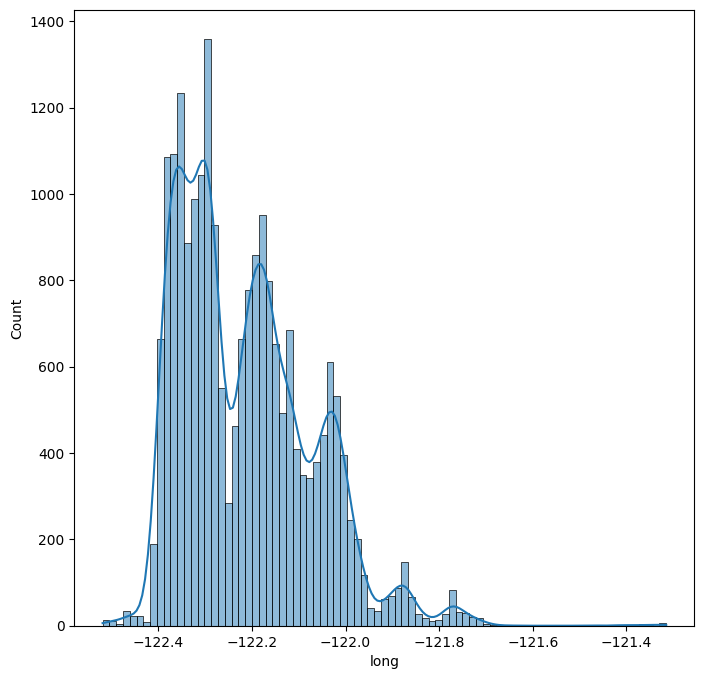

In [189]:
plt.figure(figsize=(8,8))
sns.histplot(df['long'],kde=True)
plt.show()

* The houses with longitute between -122.4 to -122.0 were sold most in above mentioned time-period.

In [190]:
df

dayhours    price  room_bed  room_bath  ceil  sight  condition  \
0     2015-04-27   600000       4.0       1.75   1.0    0.0          3   
1     2015-03-17   190000       2.0       1.00   1.0    0.0          4   
2     2014-08-20   735000       4.0       2.75   2.0    4.0          3   
3     2014-10-10   257000       3.0       2.50   2.0    0.0          3   
4     2015-02-18   450000       2.0       1.00   1.0    0.0          3   
...          ...      ...       ...        ...   ...    ...        ...   
21593 2015-03-10   685530       4.0       2.50   2.0    0.0          3   
21594 2014-05-21   535000       2.0       1.00   1.0    0.0          3   
21595 2014-09-05   998000       3.0       3.75   2.0    0.0          3   
21596 2015-02-06   262000       4.0       2.50   2.0    0.0          3   
21597 2014-12-29  1150000       4.0       2.50   2.0    0.0          4   

       quality  ceil_measure  basement  ...  zipcode      lat     long  \
0          8.0        1800.0    1250.0  ...    98034  47.7228 -122.183   
1          6.0         670.0       0.0  ...    98118  47.5546 -122.274   
2          8.0        3040.0       0.0  ...    98118  47.5188 -122.256   
3          8.0        1740.0       0.0  ...    98002  47.3363 -122.213   
4          7.0        1120.0       0.0  ...    98118  47.5663 -122.285   
...        ...           ...       ...  ...      ...      ...      ...   
21593      9.0        3130.0       0.0  ...    98014  47.6618 -121.962   
21594      7.0         920.0     110.0  ...    98103  47.6860 -122.341   
21595     10.0        2910.0     800.0  ...    98075  47.5888 -122.040   
21596      7.0        1560.0       0.0  ...    98168  47.5140 -122.316   
21597      9.0        1940.0       0.0  ...    98112  47.6427 -122.304   

       furnished  total_area  total_area15  house_sold_day  house_sold_month  \
0            0.0     12490.0       10680.0              27                 4   
1            0.0      3771.0        5760.0              17                 3   
2            0.0      5455.0        5053.0              20                 8   
3            0.0      5461.0        5824.0              10                10   
4            0.0      5710.0        6220.0              18                 2   
...          ...         ...           ...             ...               ...   
21593        1.0     63597.0       47004.0              10                 3   
21594        0.0      5871.0        6474.0              21                 5   
21595        1.0     38122.0       36802.0               5                 9   
21596        0.0      9360.0        8960.0               6                 2   
21597        1.0      6815.0        6665.0              29                12   

       house_sold_year  House_age  
0                 2015         49  
1                 2015         67  
2                 2014         48  
3                 2014          5  
4                 2015         91  
...                ...        ...  
21593             2015         19  
21594             2014         75  
21595             2014         36  
21596             2015         18  
21597             2014         89  

[21598 rows x 22 columns]

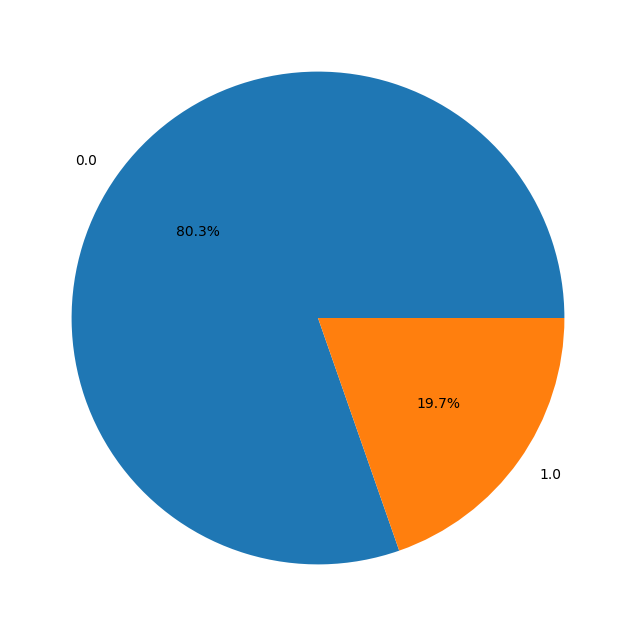

In [191]:
plt.figure(figsize=(8,8))
furnished =  list(df['furnished'].value_counts().index)
count = list(df['furnished'].value_counts())
plt.pie(count,labels=furnished,autopct='%1.1f%%',)
plt.show()

* From pie chart it can be observed according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were not furnished around (80.3%) and remaining were furnished.

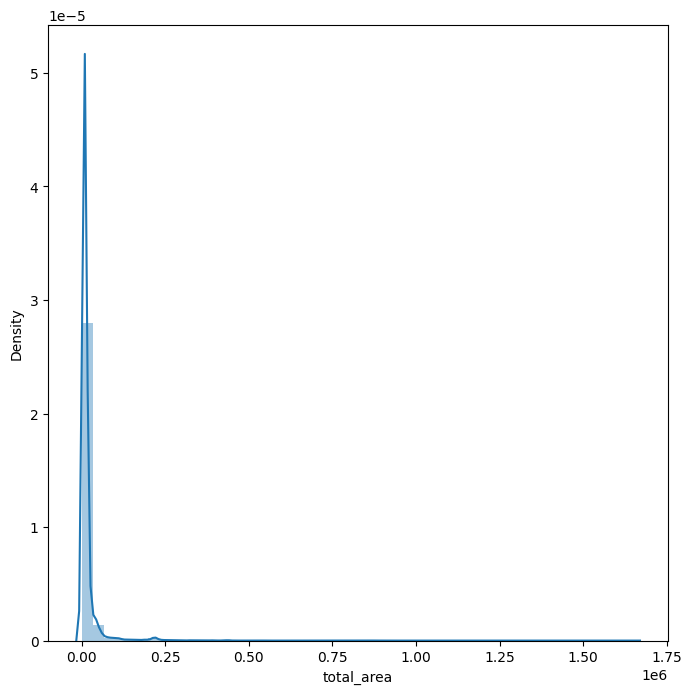

In [192]:
plt.figure(figsize=(8,8))
sns.distplot(df['total_area'])
plt.show()

* From distribution plot it can be observed according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the 75% of houses that were sold has total area of 12976 sq.ft

#### univariate analysis report

* We have data of houses that where sold between 2014-05-02 to 2015-05-27 i.e. the data of houses that where sold in this 390 days
* From the given dataset the months in which there is good sales of house are 'May','April','July','June','August','October','March','September' and sales of house decreased in months of 'December','Februrary','November','January'
* May is month where highest number of  houses where sold (11.2%) and in january least number of houses where sold (4.5%).
* From given dataset the sales of house where more in 2014 (67.7%) as compare to 2015 (32.3%). Which is obvious if we see month wise sales.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* The distribution of price of houses is positively skewed.
* According to given data during above mentioned time-period majority of houses sold were having price between 75000 to 1000000.
* Very less number houses were sold during above mentioned time period with high price i.e. price above 1000000.
* Most cheap house sold during above mentioned time-period according to data cost 75000 and most expensive house sold cost 7700000
* There are 1159 houses sold during above mentioned time-period whose price were high when compare to other house price in dataset.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to dataset out of total number of houses sold during above mentioned time-period, the house with 3 bed rooms were sold most (45.3%) followed by houses with 4 bed rooms (31.8%) than houses with 2 bedrooms (12.8%) than houses with 5 bedrooms (7.4%) and houses with 0,1,6,7,8,9,10 bedrooms were least sold and only 1 house with 11 and 33 bedrooms were sold. Out of which house with 33 bedrooms act as outlier we must remove it before modeling.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold had 2.5 bathroom aprrox (25.2%) followed by 1 bathroom nearly (17.7%) than comes houses with 1.75 bathroom about (14%) than 2.25 bathroom around (9.4%) than comes houses with 2 bathroom (8.9%) after which there is drop.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold had 1 floor aprrox (49.6%) followed by 2 floor nearly (38%) than there is sudden drop is sales of total number of house with levels or floor of 1.5,3,2.5 and 3.5. Where the least number of houses where sold with 3.5 level or floors.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were sold at once i.e. that they were not sighted  aprrox (90.2%). And the houses which were viewd 4 times were sold least (1.5%). We will drop this feature during modelling because majority i.e. 90.2% of values are 0.0 which does not contribute much during modeling.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were sold does not have view to wavefront which is arrounf (99.3%) and only (0.7%) how total number of houses that were sold had a view to wavefront. We drop this column as it has 99.3% of its data as 0 which will not contribute to modeling.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold was rated 3 for their condition around 
(65.1%) followed by the houses that were rated 4 approx (26.2%) than comes house that were rated 5 than 2 than 1.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were given quality ration of 7.0 which is (41.5%) followed by houses with rating of 8.0 which is approx (28.1%) than comes houses with quality rating of 9.0 which is (12.1%) followed by houses with quality rating of 6.0 that covers (9.4%) of total number of houses sold followed by ratings of 10.0,11.0,5.0,12.0,4.0,13.0,3.0 and 1.0. Only one house was sold with quality rating of 1.0 and 33 were sold with quality rating of 3.0.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* From distribution plot according to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were had ceil measure between 1000 sq.ft to 3000 sq.ft
* The distribution of ceil measure is positively skewed which says that in given dataset during given time-period the number of houses that were sold majority of them has ceil measure between 1000 sq.ft to 3000 sq.ft and were less houses were sold with ceil measure more than 4000 sq.ft.
* There are 611 outlier i.e. 611 houses were sold during above mentioned time-period whose ceil measure were higher than normal in given data.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* The distribution of basement measure is positively skewed which says that in given dataset during given time-period the number of houses that were sold majority of them does not had a basement. Than very less houses that were sold had a basement of with measure between 250 sq.ft to 1250 sq.ft and very less houses were sold with basement measure more than 1500 sq.ft
* There are 495 outliers in basement measure i.e. out of all houses sold there are 495 houses with lager basement measure.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* In given dataset we have house that was built in 1900 to house that was built in 2015. And they all were sold. But majoirty of houses that got sold in above mentioned time-period was built in 2014 i.e. those houses which were built recently were sold most as we have data of house sold in 2014-2015.
* It is observable that the houses which were made after 1947 were sold highly.
* As the age of house in increasing they are not getting sold.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were not renovated. We will drop this column during modeling as it has majority of it's value to be 0.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* The houses with zipcode 98103 were sold most and houses with zipcode 98039 were least sold. We will drop this attribute as zip should work like a categorically feature rather than continuos data but here its not like that which can lead to problem while modeling.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* The houses at higher latitude are sold most according to given dataset.
* The houses with longitute between -122.4 to -122.0 were sold most in above mentioned time-period.
* We will drop this features 'lat' and 'long' during model building.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset, out of the total number of the houses sold during the above mentioned time-period, the majority of houses that were sold were not furnished around (80.3%) and remaining were furnished.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset, out of the total number of the houses sold during the above mentioned time-period, the 75% of houses that were sold has total area of 12976 sq.ft

In [193]:
df

dayhours    price  room_bed  room_bath  ceil  sight  condition  \
0     2015-04-27   600000       4.0       1.75   1.0    0.0          3   
1     2015-03-17   190000       2.0       1.00   1.0    0.0          4   
2     2014-08-20   735000       4.0       2.75   2.0    4.0          3   
3     2014-10-10   257000       3.0       2.50   2.0    0.0          3   
4     2015-02-18   450000       2.0       1.00   1.0    0.0          3   
...          ...      ...       ...        ...   ...    ...        ...   
21593 2015-03-10   685530       4.0       2.50   2.0    0.0          3   
21594 2014-05-21   535000       2.0       1.00   1.0    0.0          3   
21595 2014-09-05   998000       3.0       3.75   2.0    0.0          3   
21596 2015-02-06   262000       4.0       2.50   2.0    0.0          3   
21597 2014-12-29  1150000       4.0       2.50   2.0    0.0          4   

       quality  ceil_measure  basement  ...  zipcode      lat     long  \
0          8.0        1800.0    1250.0  ...    98034  47.7228 -122.183   
1          6.0         670.0       0.0  ...    98118  47.5546 -122.274   
2          8.0        3040.0       0.0  ...    98118  47.5188 -122.256   
3          8.0        1740.0       0.0  ...    98002  47.3363 -122.213   
4          7.0        1120.0       0.0  ...    98118  47.5663 -122.285   
...        ...           ...       ...  ...      ...      ...      ...   
21593      9.0        3130.0       0.0  ...    98014  47.6618 -121.962   
21594      7.0         920.0     110.0  ...    98103  47.6860 -122.341   
21595     10.0        2910.0     800.0  ...    98075  47.5888 -122.040   
21596      7.0        1560.0       0.0  ...    98168  47.5140 -122.316   
21597      9.0        1940.0       0.0  ...    98112  47.6427 -122.304   

       furnished  total_area  total_area15  house_sold_day  house_sold_month  \
0            0.0     12490.0       10680.0              27                 4   
1            0.0      3771.0        5760.0              17                 3   
2            0.0      5455.0        5053.0              20                 8   
3            0.0      5461.0        5824.0              10                10   
4            0.0      5710.0        6220.0              18                 2   
...          ...         ...           ...             ...               ...   
21593        1.0     63597.0       47004.0              10                 3   
21594        0.0      5871.0        6474.0              21                 5   
21595        1.0     38122.0       36802.0               5                 9   
21596        0.0      9360.0        8960.0               6                 2   
21597        1.0      6815.0        6665.0              29                12   

       house_sold_year  House_age  
0                 2015         49  
1                 2015         67  
2                 2014         48  
3                 2014          5  
4                 2015         91  
...                ...        ...  
21593             2015         19  
21594             2014         75  
21595             2014         36  
21596             2015         18  
21597             2014         89  

[21598 rows x 22 columns]

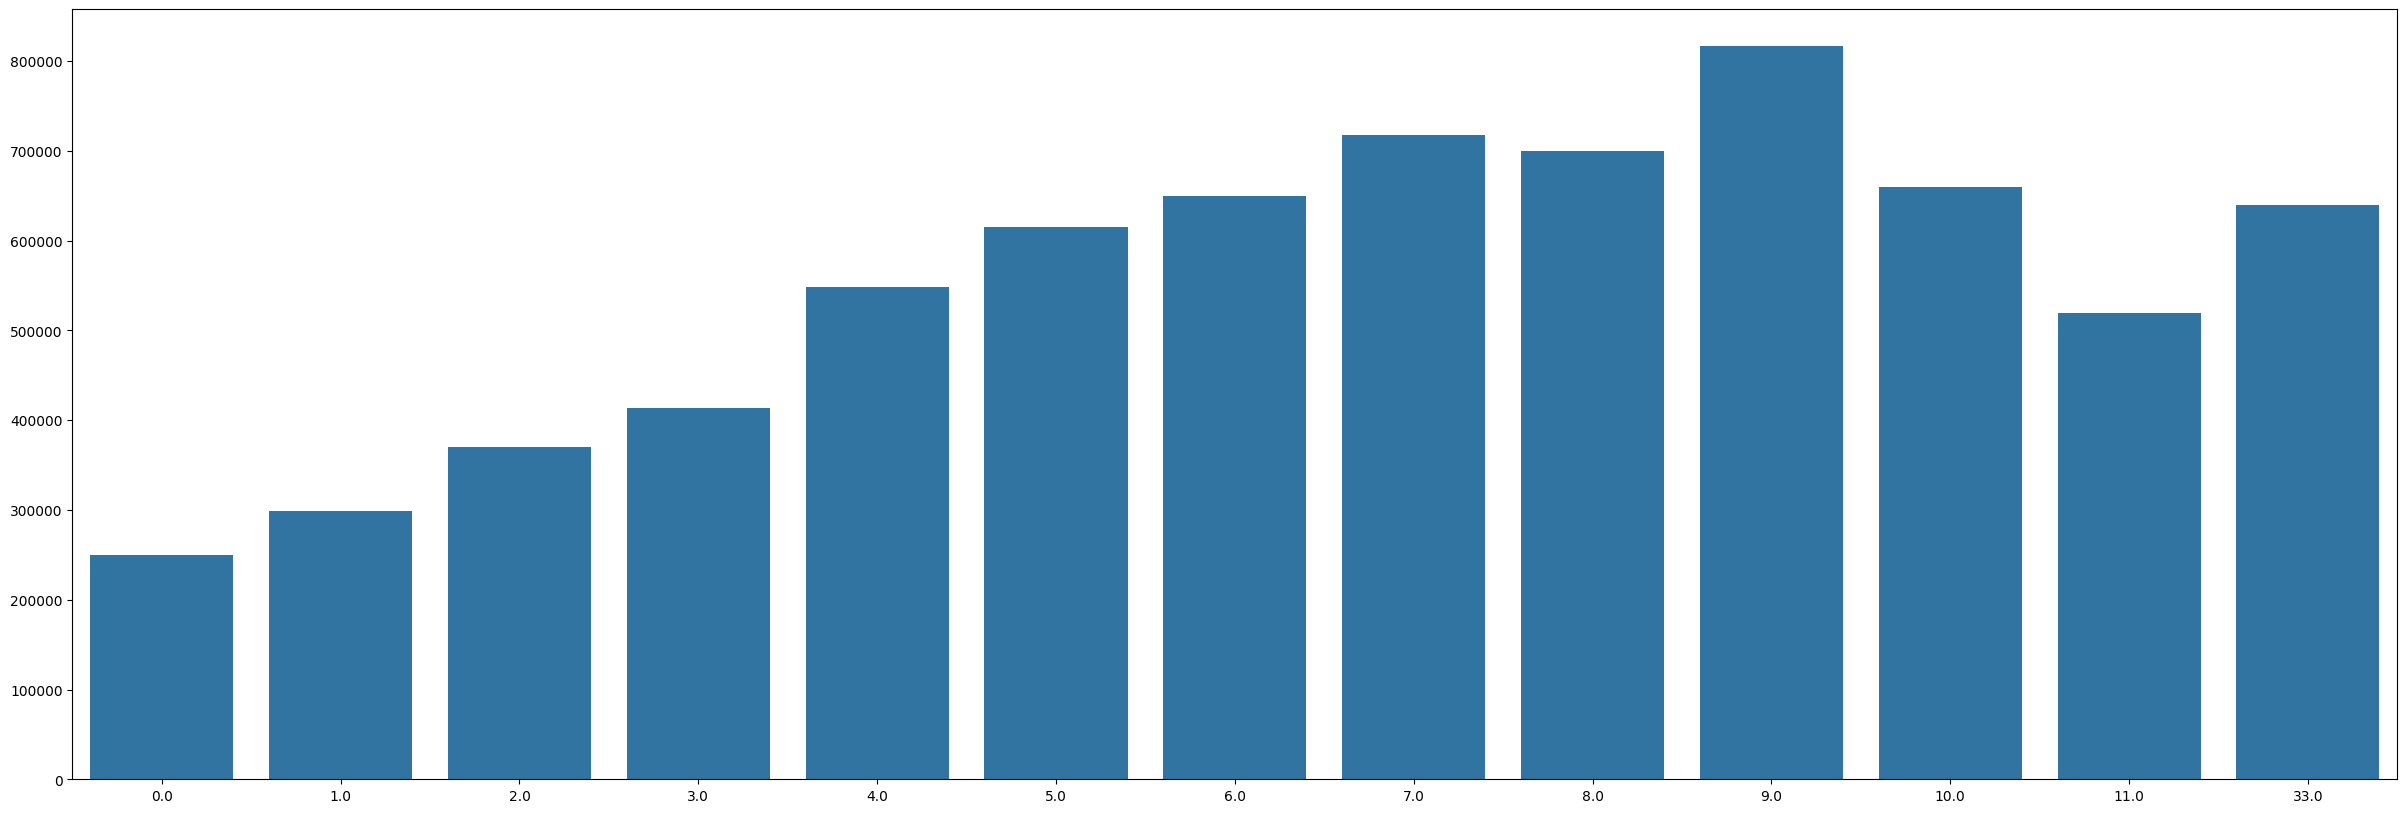

In [194]:
plt.figure(figsize=(30,10))
index = list(df.groupby(df['room_bed'])['price'].median().index)
price = list(df.groupby(df['room_bed'])['price'].median())
sns.barplot(x=index,y=price)
plt.show()

* From the above plot it can be observed that according to given dataset for the given time-period the median price for houses that were sold, it was highest for house with 9 bedrooms and lowest for house with 0 bed rooms and it is increasing with increas in number of bed rooms.

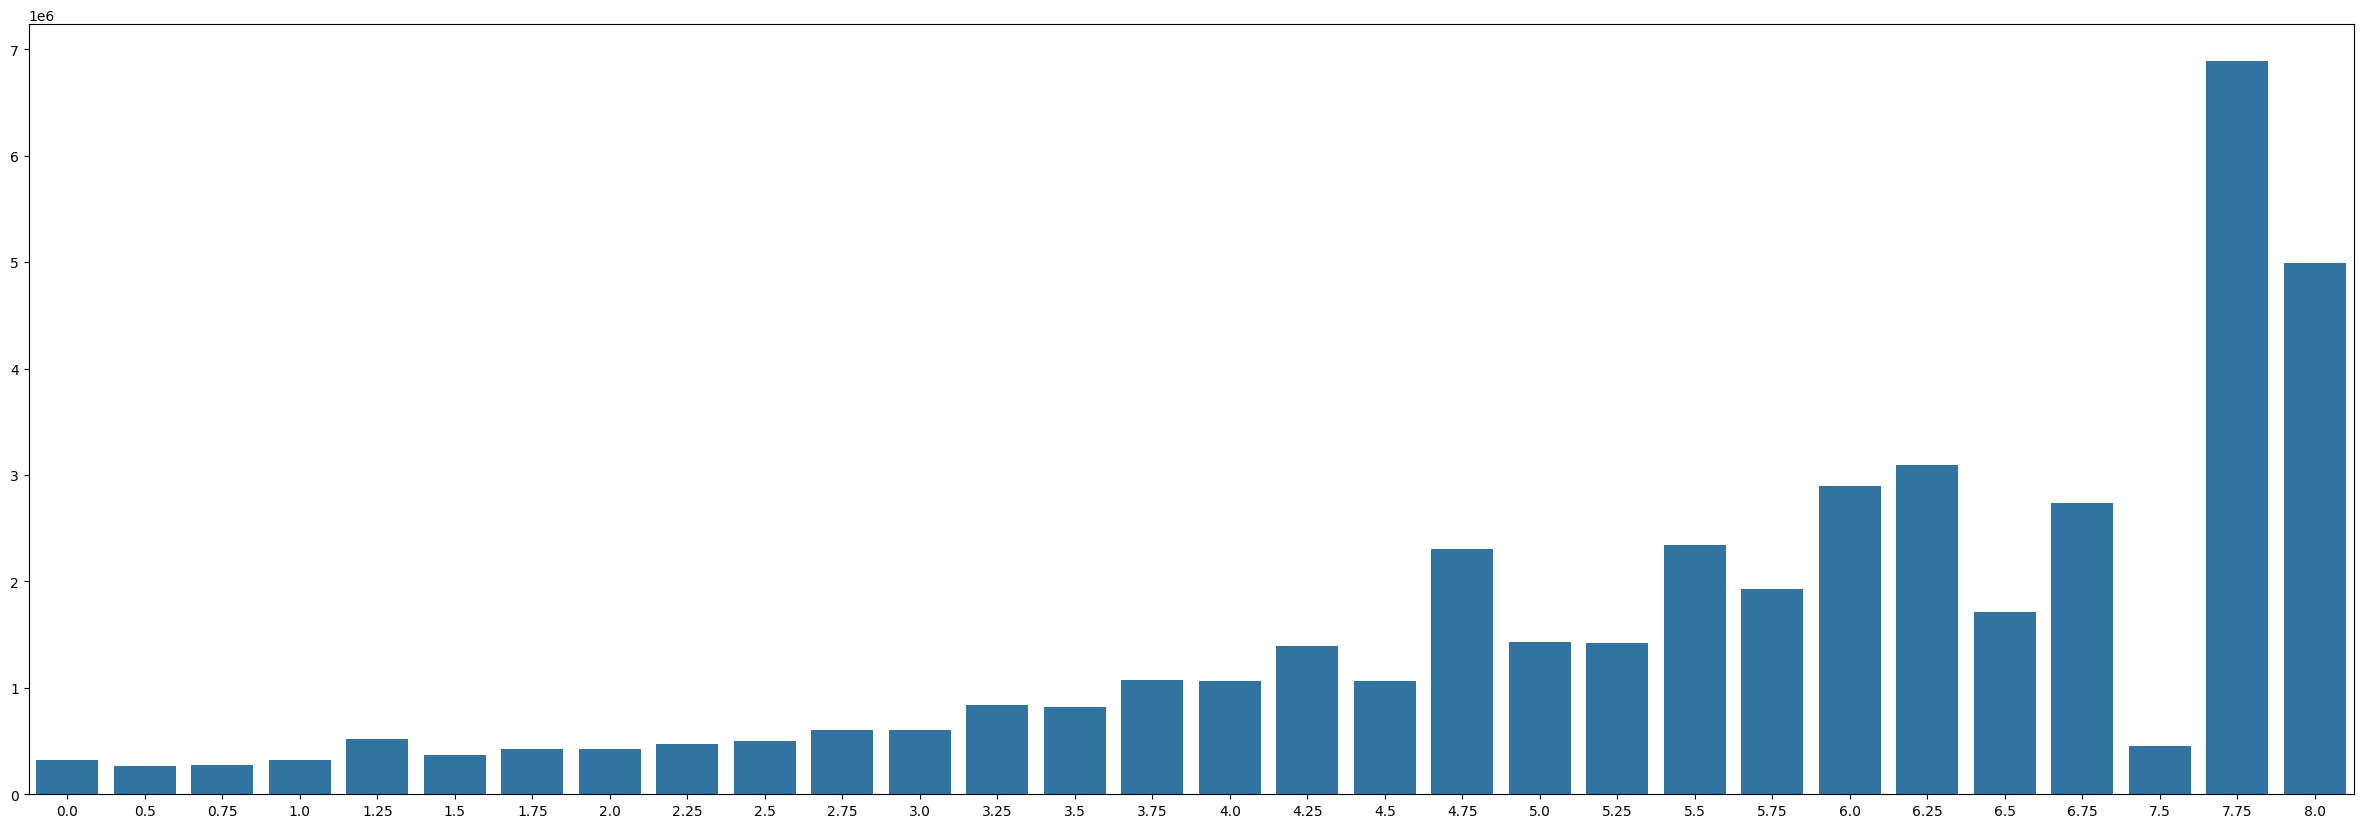

In [195]:
plt.figure(figsize=(30,10))
index = list(df.groupby(df['room_bath'])['price'].median().index)
price = list(df.groupby(df['room_bath'])['price'].median())
sns.barplot(x=index,y=price)
plt.show()

* From the above plot it can be observed that according to given dataset for the given time-period the median price for houses that were sold, it was highest for house with 7.75 baath room and lowest for house with 0.5 bathrooms and with increase in number of bath rooms the medain price is seen to be increasing wherease the median price for house with 7.5 house is very low.

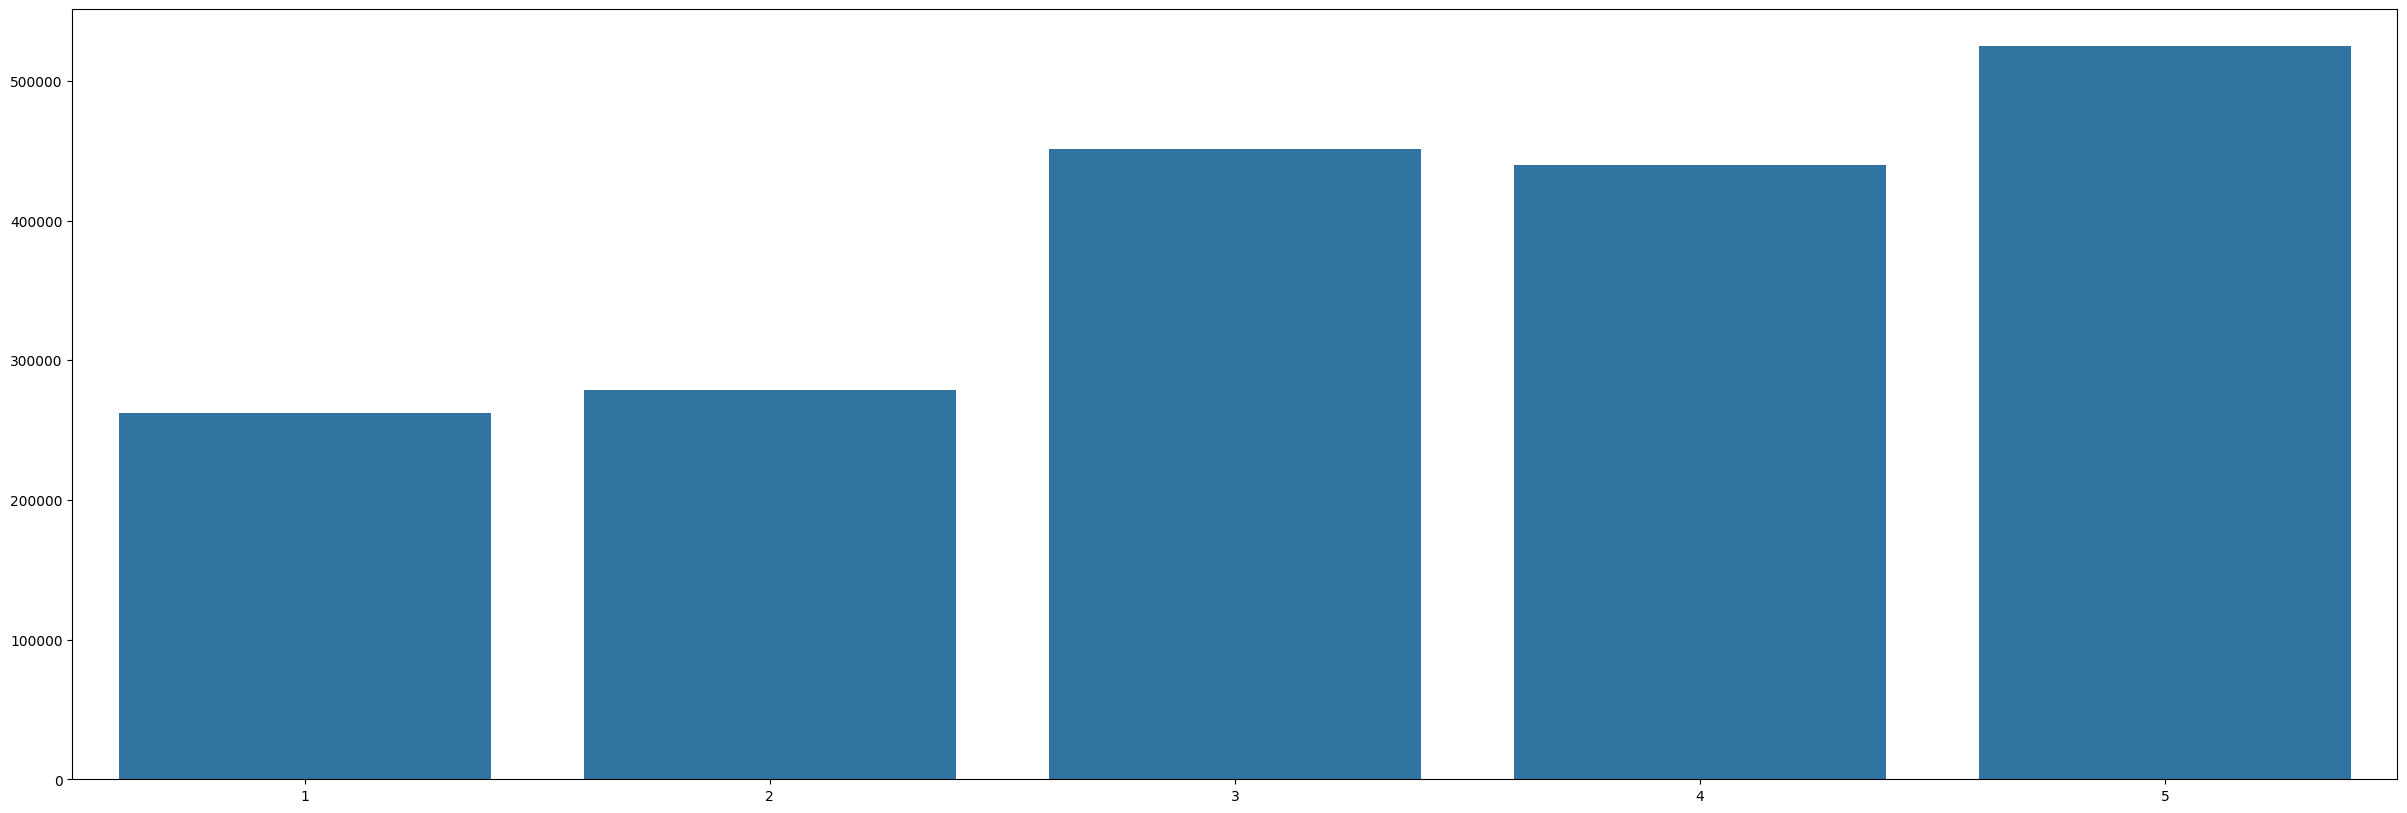

In [196]:
plt.figure(figsize=(30,10))
index = list(df.groupby(df['condition'])['price'].median().index)
price = list(df.groupby(df['condition'])['price'].median())
sns.barplot(x=index,y=price)
plt.show()

* From the above plot it can be observed that according to given dataset for the given time-period the median price for houses that were sold, it was highest for house with condition rated with 5 followed by houses with condition rated as 3 and lowest for houses with conition rated as 1.

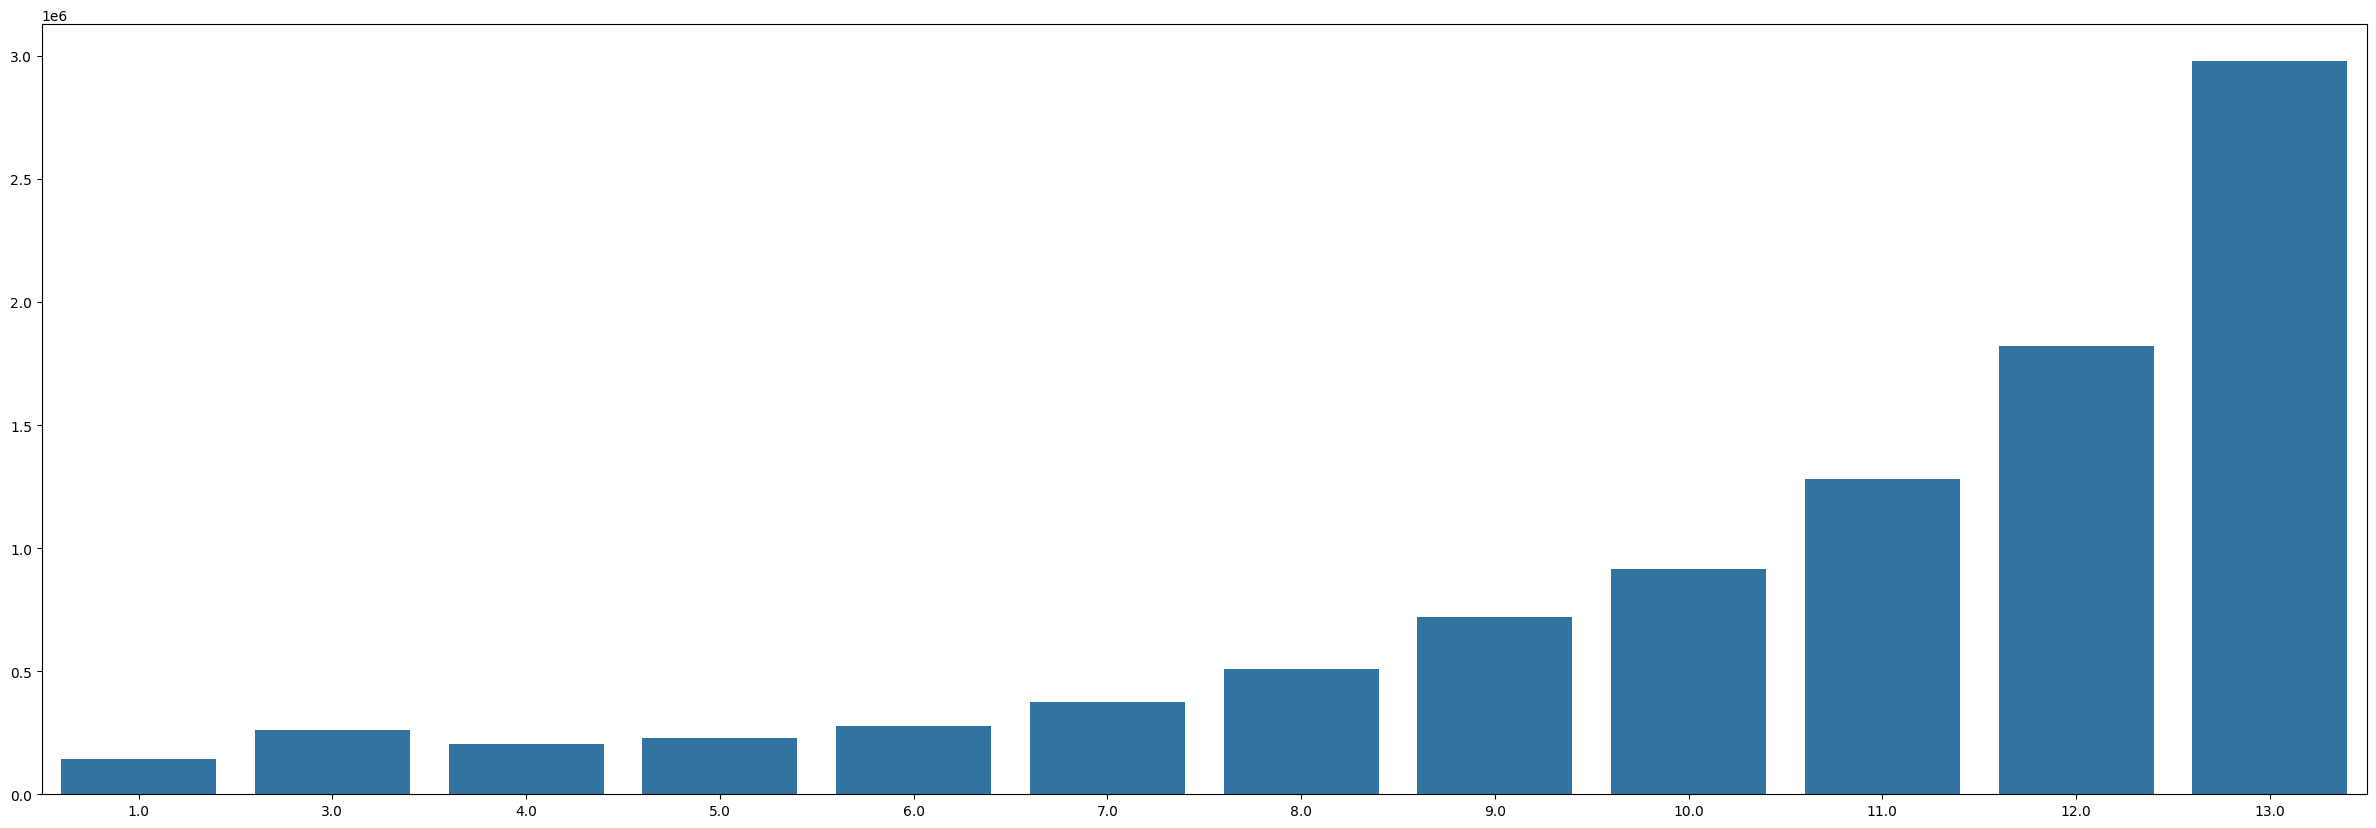

In [197]:
plt.figure(figsize=(30,10))
index = list(df.groupby(df['quality'])['price'].median().index)
price = list(df.groupby(df['quality'])['price'].median())
sns.barplot(x=index,y=price)
plt.show()

* From the above plot it can be observed that according to given dataset for the given time-period the median price for houses that were sold, it was highest for house with quality rated with 13 and it decreases with decrease in quality ratings.

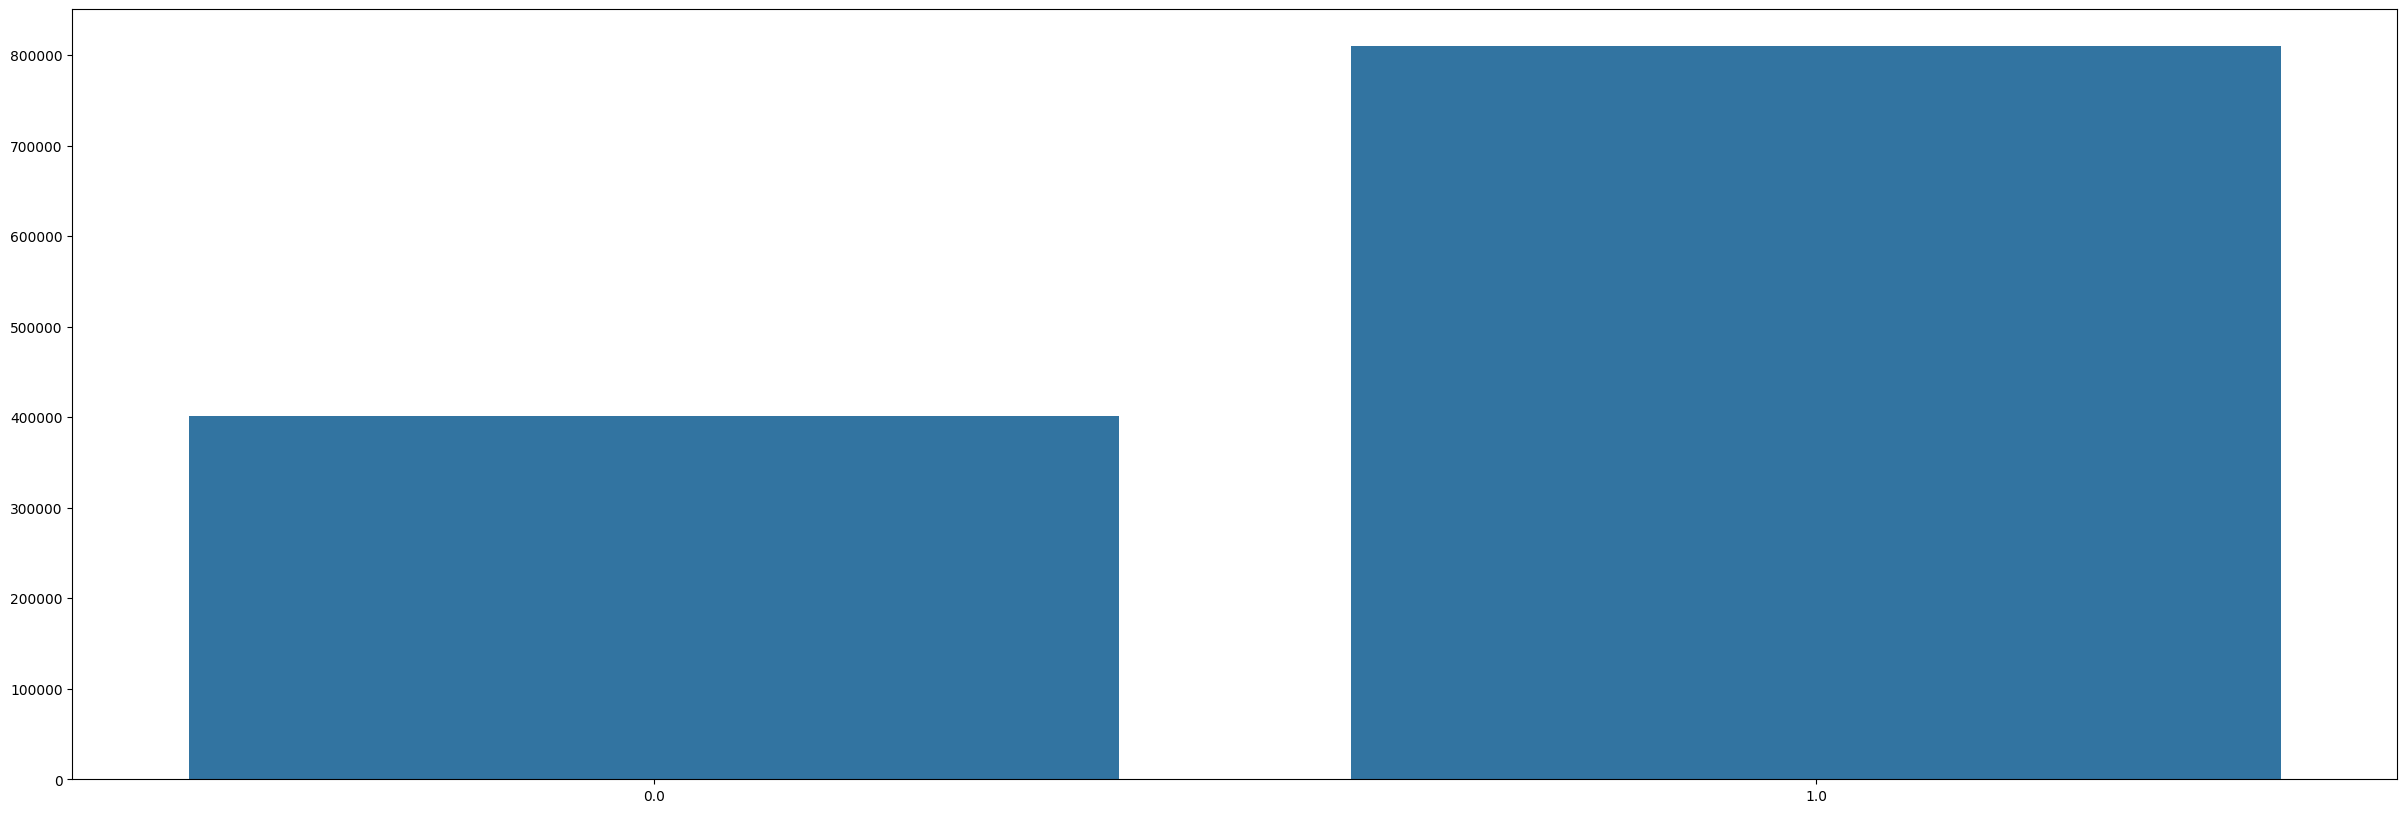

In [198]:
plt.figure(figsize=(30,10))
index = list(df.groupby(df['furnished'])['price'].median().index)
price = list(df.groupby(df['furnished'])['price'].median())
sns.barplot(x=index,y=price)
plt.show()

* From the above plot it can be observed that according to given dataset for the given time-period the median price for houses that were sold was more for furnished house when compare to house that were not furnished.

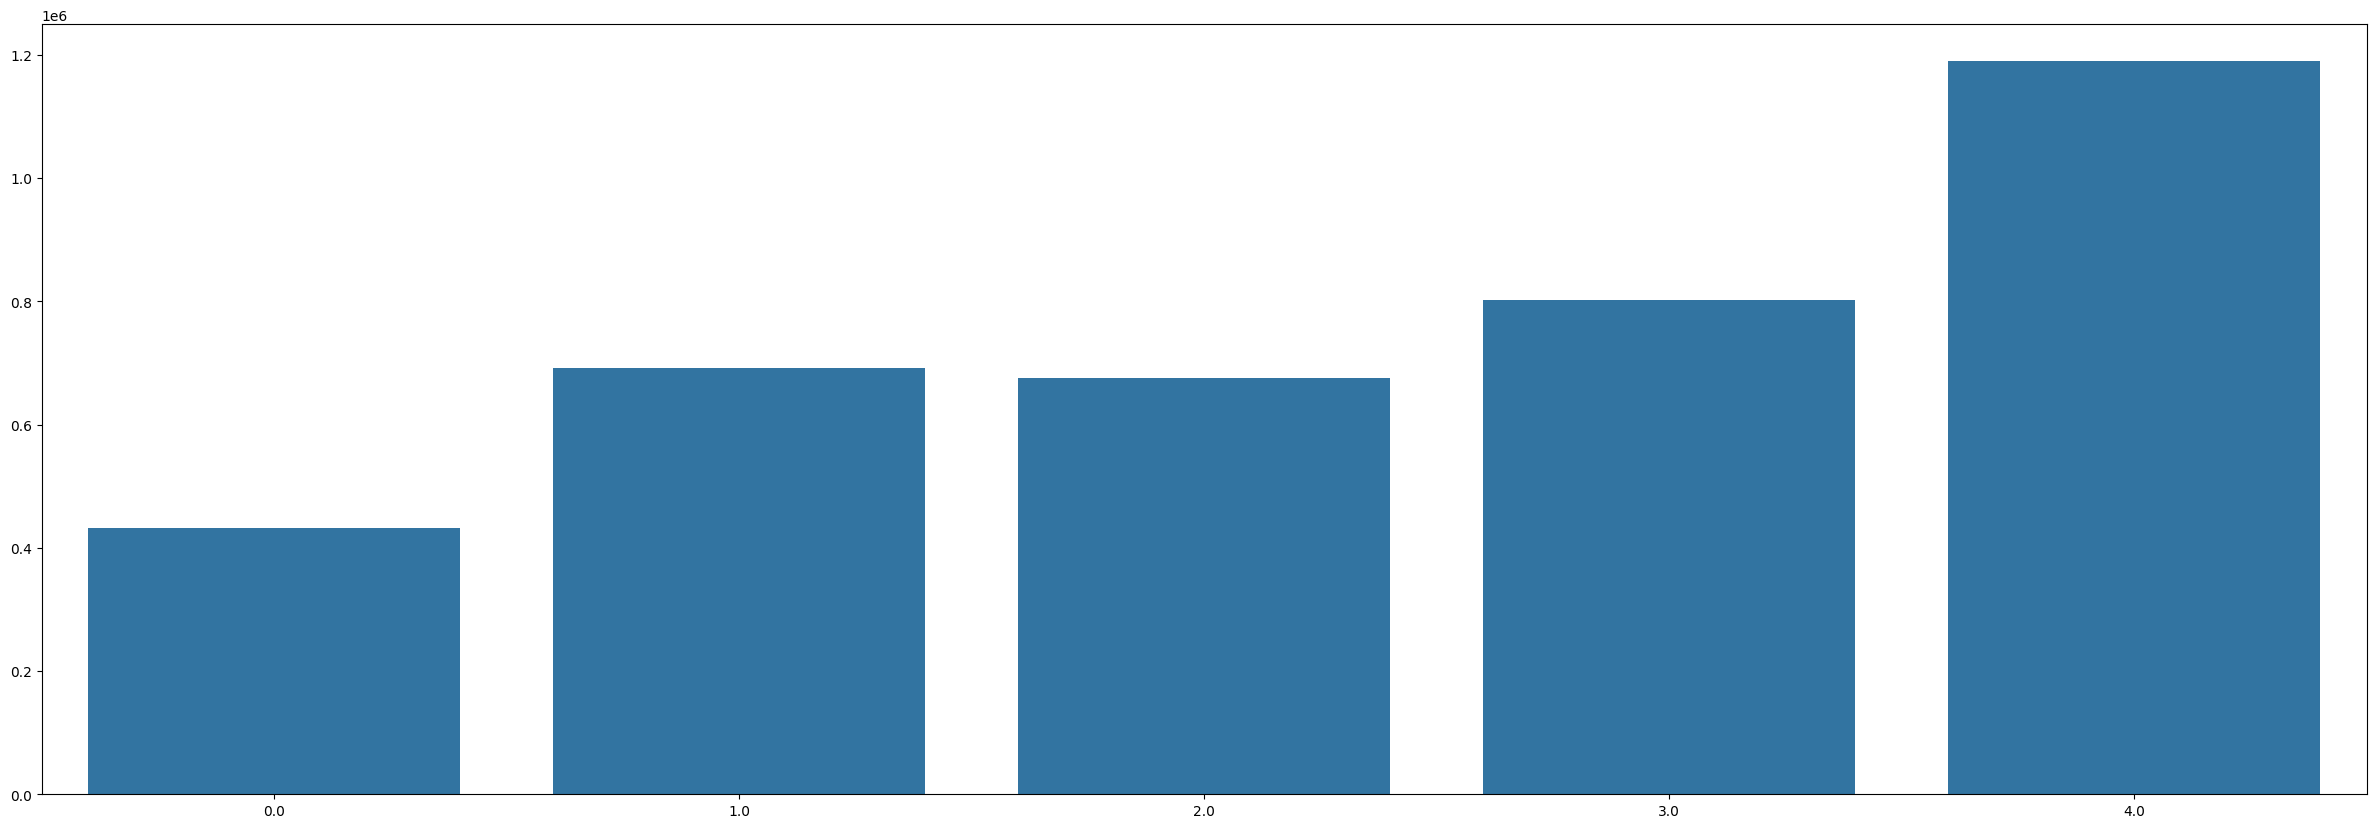

In [199]:
plt.figure(figsize=(30,10))
index = list(df.groupby(df['sight'])['price'].median().index)
price = list(df.groupby(df['sight'])['price'].median())
sns.barplot(x=index,y=price)
plt.show()

* From the above plot it can be observed that according to given dataset for the given time-period the median price for houses that were sold was lowest for the houses that were sold without sighting but it was highest for the houses that were viewd 4 times with increasing trend. And from univariate analysis we found out that the houses that were not sighted were sold most according to given dataset and those which were sifhted 4 times were sold least so we can say that the price for houses that were sighted 4 times were on higher side.

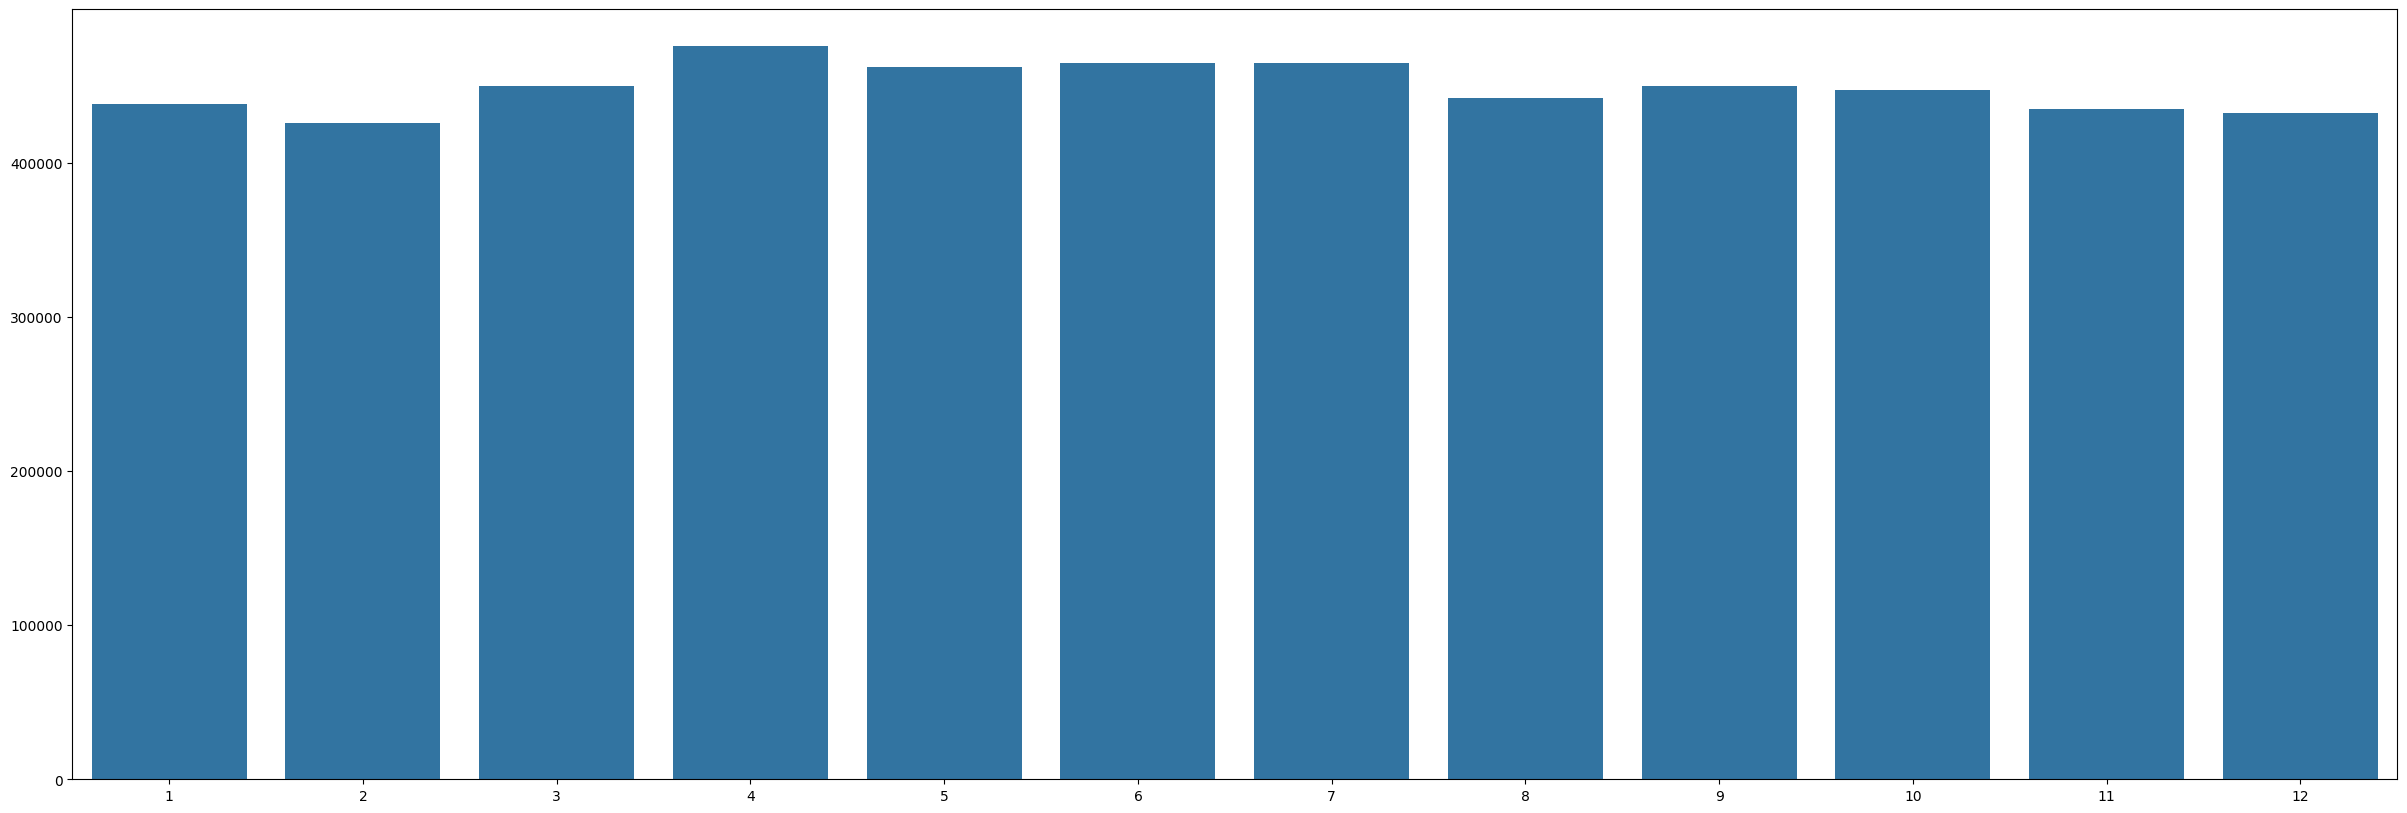

In [200]:
plt.figure(figsize=(30,10))
index = list(df.groupby(df['house_sold_month'])['price'].median().index)
price = list(df.groupby(df['house_sold_month'])['price'].median())
sns.barplot(x=index,y=price)
plt.show()

* From the above plot it can be observed that according to given dataset for the given time-period the median price for houses that were sold were almost same for every month.

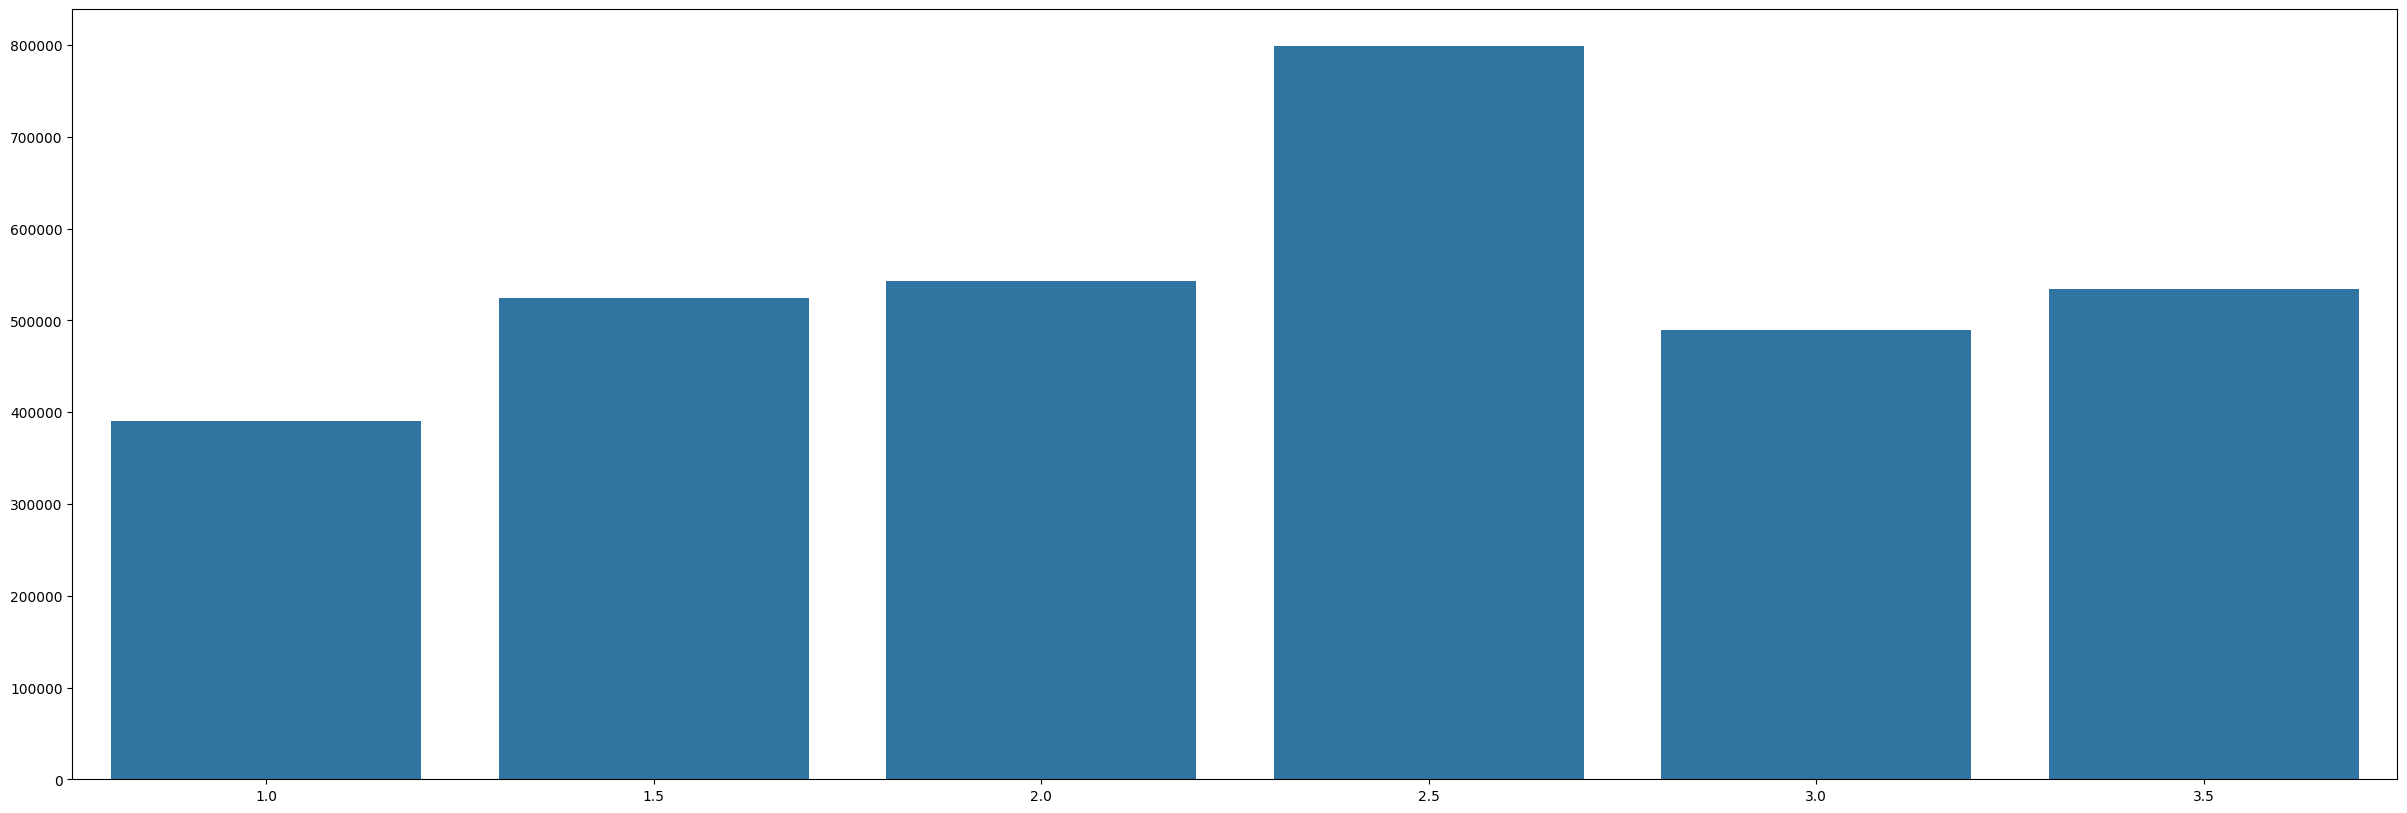

In [201]:
plt.figure(figsize=(30,10))
index = list(df.groupby(df['ceil'])['price'].median().index)
price = list(df.groupby(df['ceil'])['price'].median())
sns.barplot(x=index,y=price)
plt.show()

* From the above plot it can be observed that according to given dataset for the given time-period the median price for houses that were sold was hihest for houses with 2.5 floors and it was merely same for houses with 1.5, 2.0, 3.0, 3.5, floor wereas it is lowest for houses with 1.0 floor. And from univariate data analysis we found that majority of house were sold had 1 floor so we can say that houses with more number of floors were sold in higher prices.

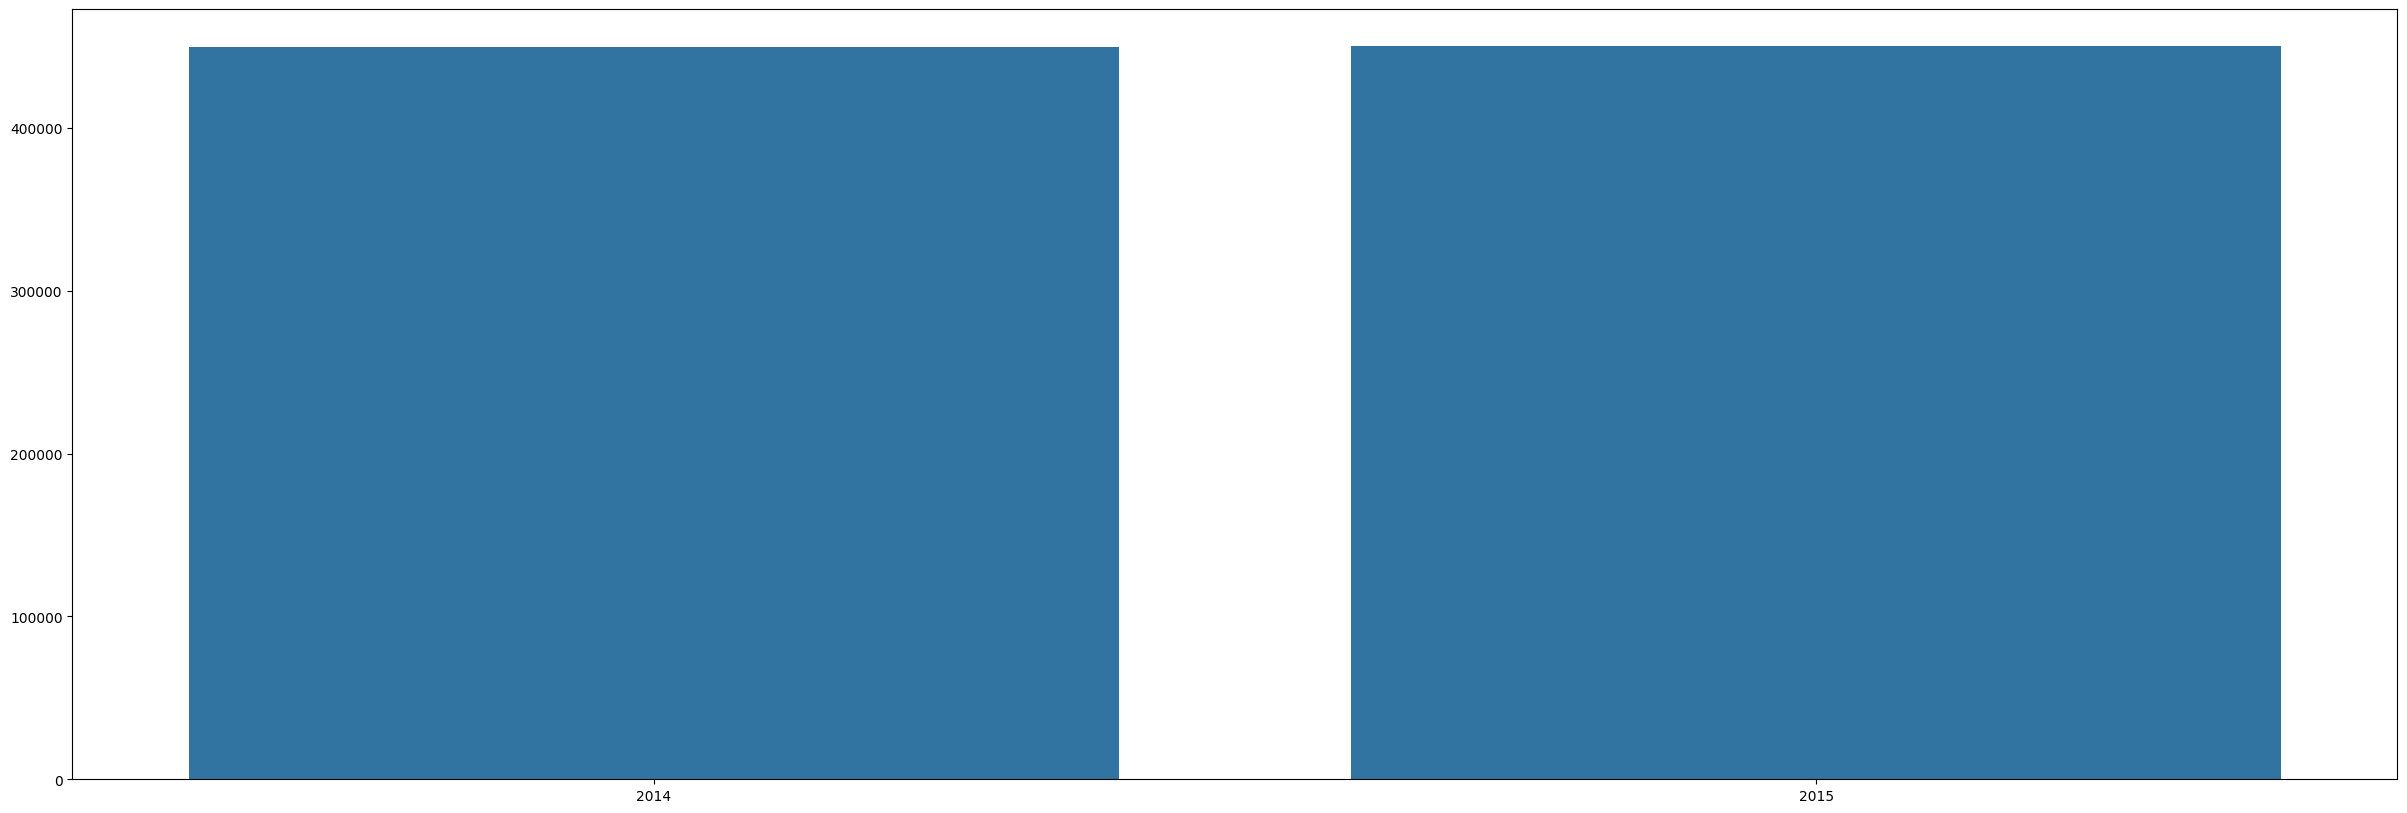

In [202]:
plt.figure(figsize=(30,10))
index = list(df.groupby(df['house_sold_year'])['price'].median().index)
price = list(df.groupby(df['house_sold_year'])['price'].median())
sns.barplot(x=index,y=price)
plt.show()

* From the above plot it can be observed that according to given dataset for the given time-period the median price for houses that were sold in year 2014 and 2015 were same.

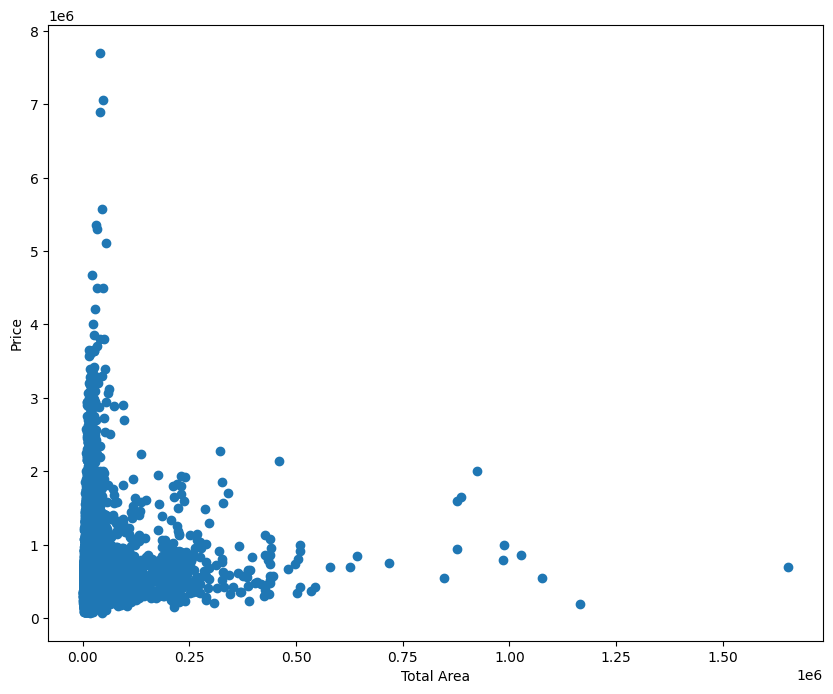

In [203]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['total_area'],y=df['price'])
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.show()

* From above scatter plot it can be observed that according to given data in the above mentioned time-period the price oh houses that were sold was higher for some houses with lesser area and for some house the price is moderate for more area. Also we can observe that with increase in total area there is slight increase in price of house.

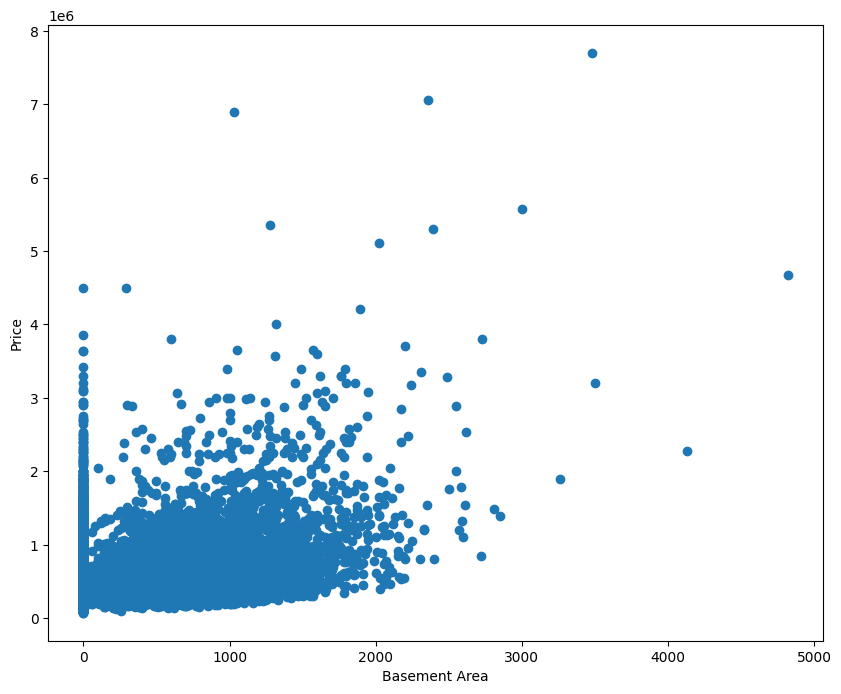

In [204]:
plt.figure(figsize=(10,8))
plt.scatter(x=df['basement'],y=df['price'])
plt.xlabel('Basement Area')
plt.ylabel('Price')
plt.show()

* From above scatter plot it can be observed that according to given data in the above mentioned time-period the price of houses that were sold was higher for house with larger basement area. With increase in basement area there is increase in price.

<Figure size 1500x1500 with 0 Axes>

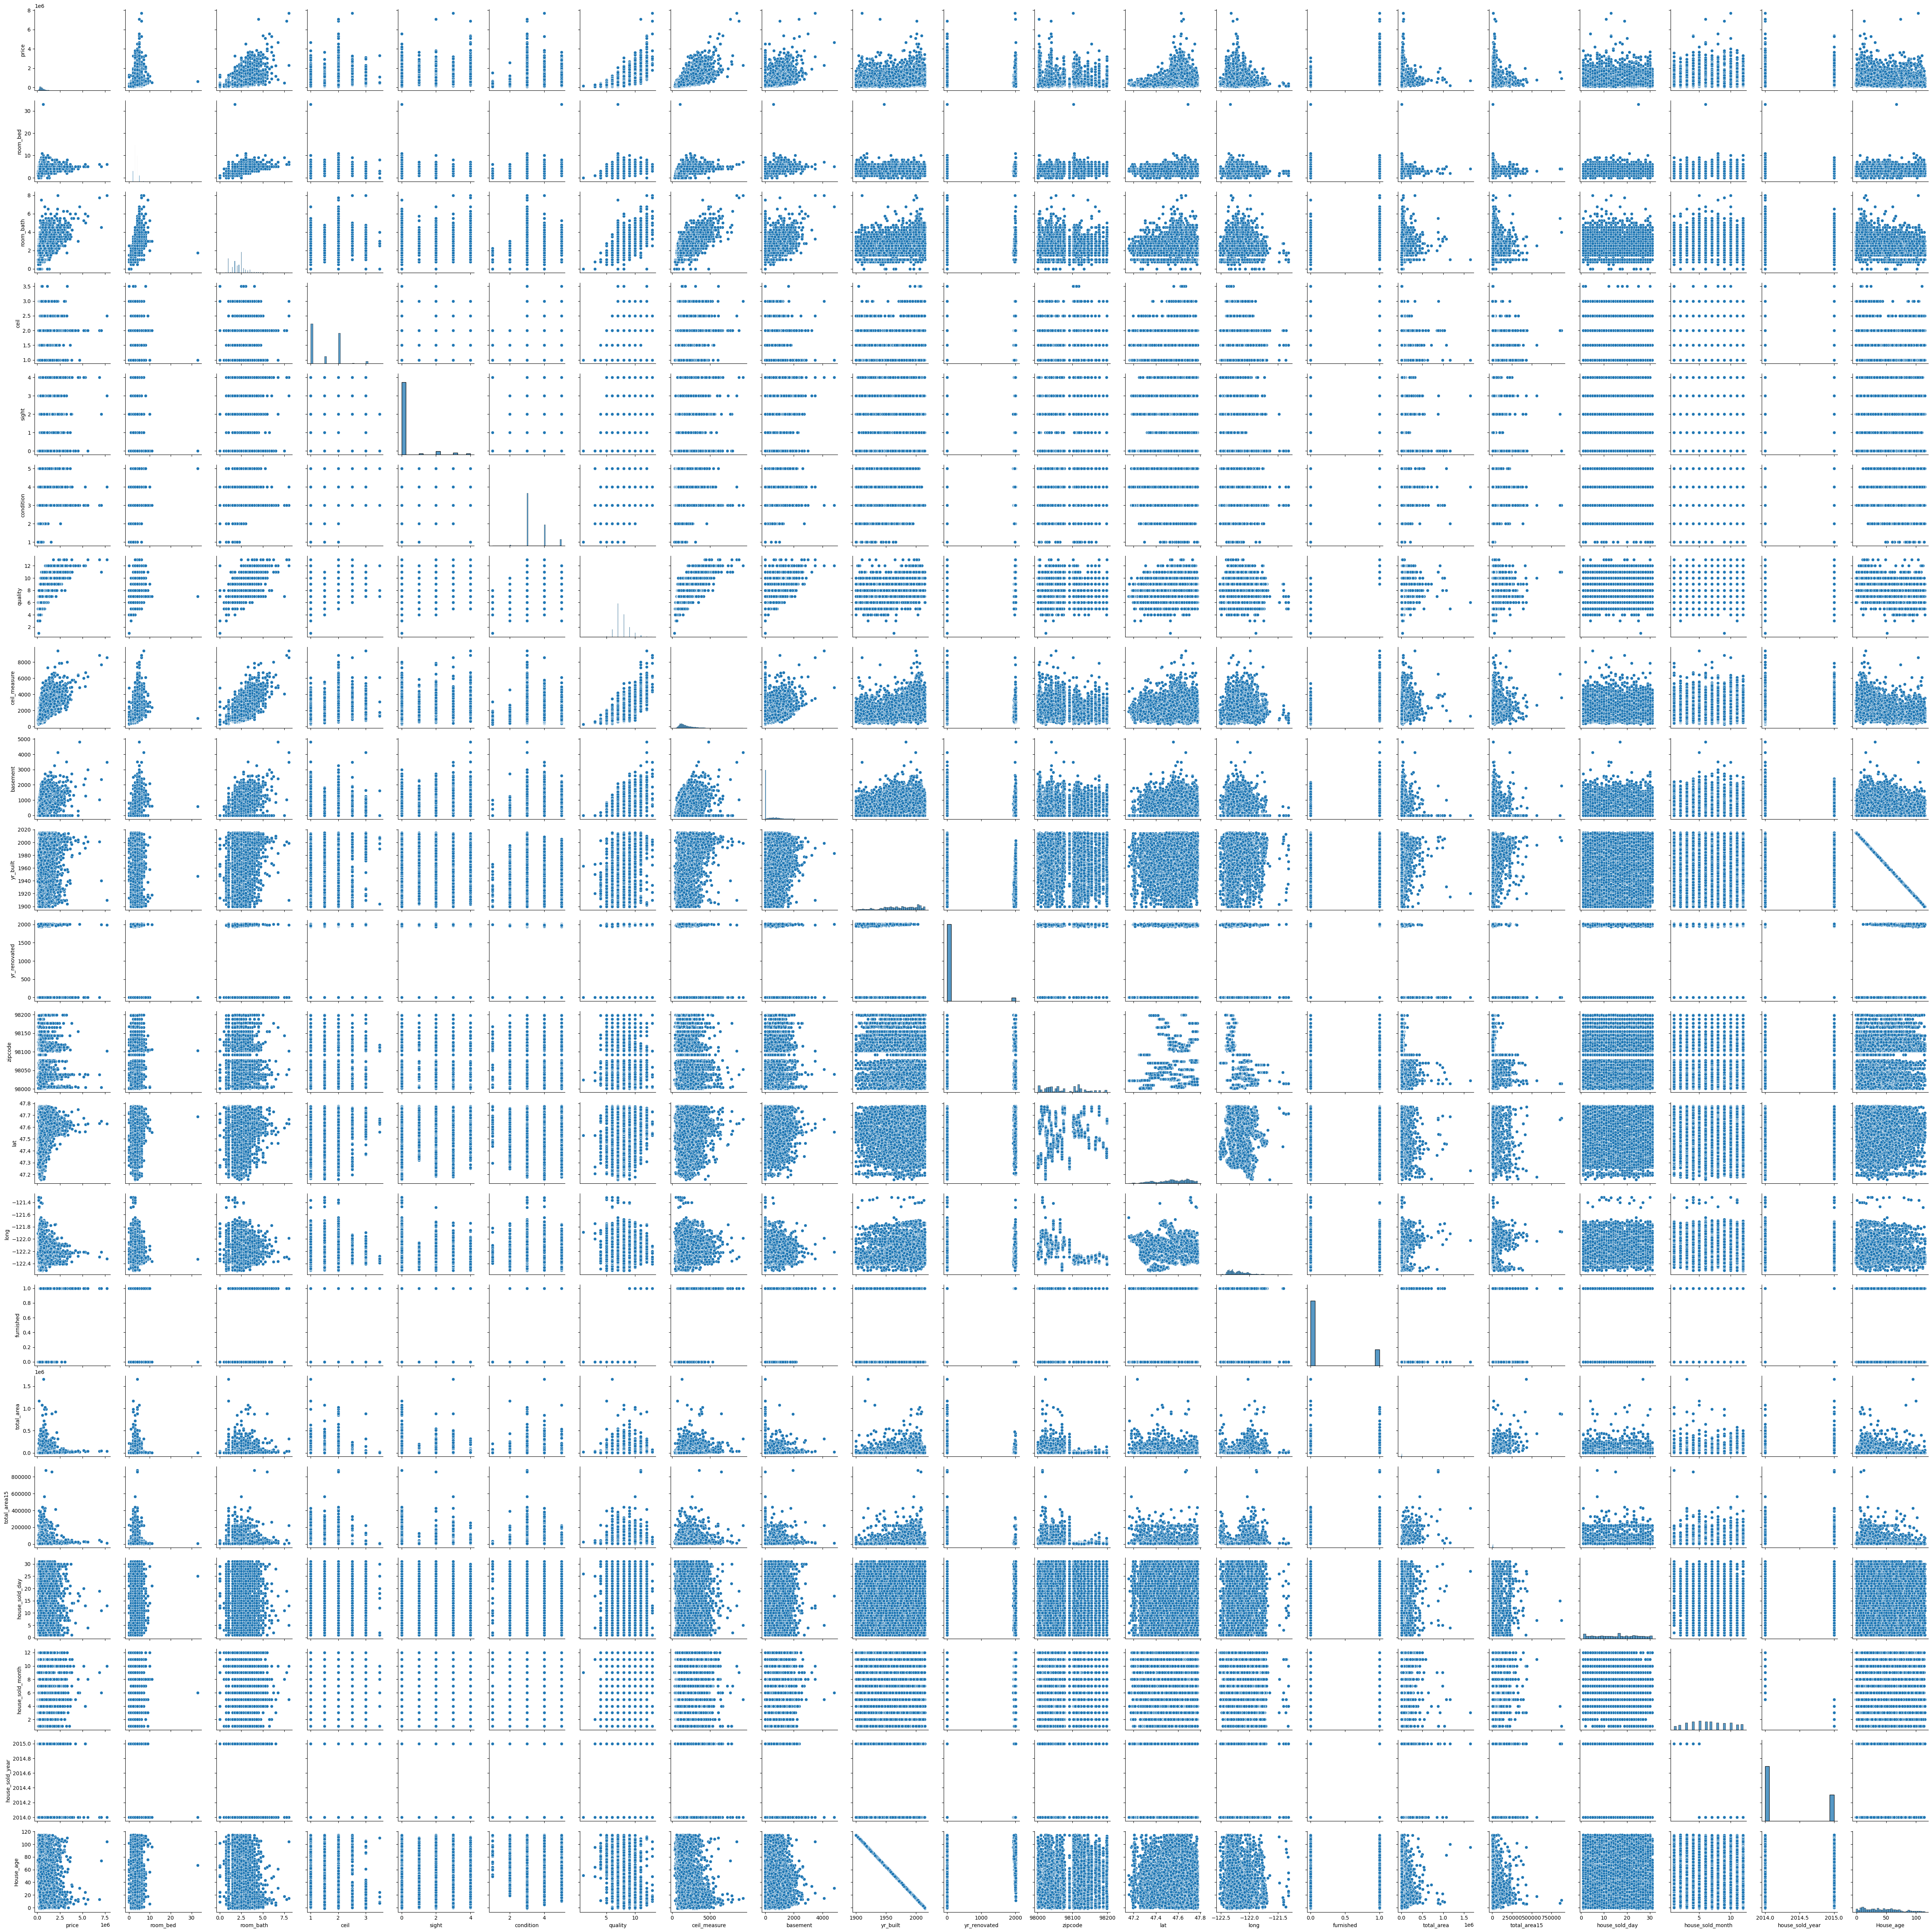

In [205]:
plt.figure(figsize=(15,15))
sns.pairplot(df)
plt.show()

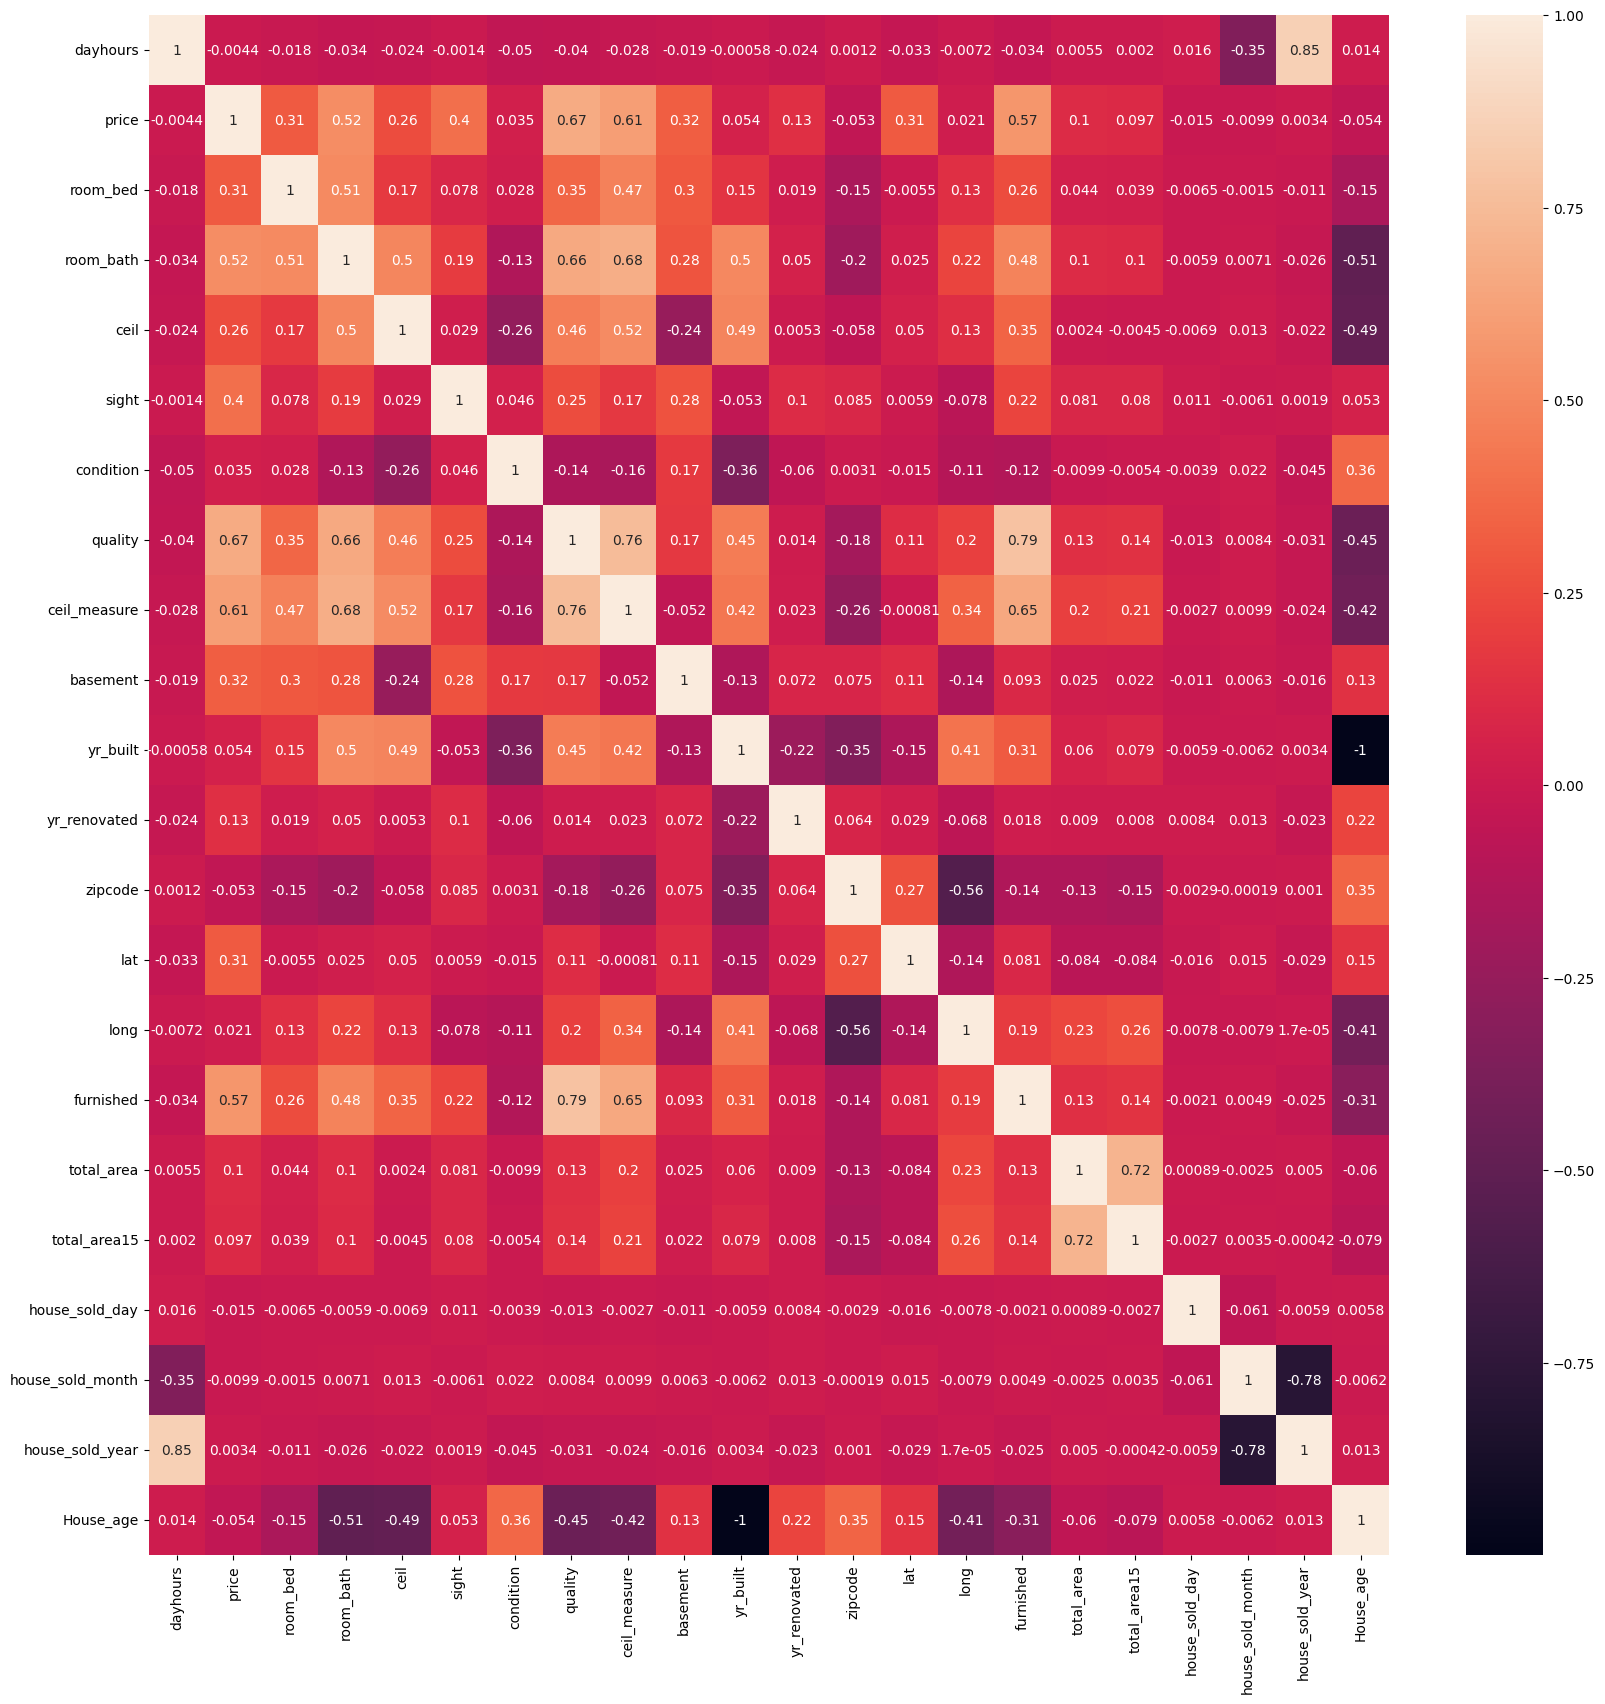

In [206]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

* There is very weak negative corelation between 'House Age' and 'Price' at which it is sold i.e. with increase in house age the price decreases very slightly.
* There is moderate negative correlation between 'House Age' and 'Ceil Measure' of the houses sold. That is as the age of house increases the 'Ceil Measure' decreases.
* There is very weak positive correlation between 'House Age' and 'Basement Size' of house, with increase in house age the basement size increases very slightly.
* There is very weak negative corelation between 'House Age' and 'Total Area' of the house. with increase in house age the total area decreases very slightly.
* There is high positive correlation bwtween 'Total Area' and 'Total Area15' of the house therefore we will drop 'Total Area15' attribute while model building.
* There is moderate positive correlation between 'Furnished' and 'Price' of the house.
* There is high positive correlation between 'Furnished' and 'Quality' of the house.

#### Bivariate and Multivariate Analysis Report
* According to given dataset for the given time-period the median price for houses that were sold, it was highest for house with 9 bedrooms and lowest for house with 1 rooms and it is increasing with increas in number of bed rooms.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset for the given time-period the median price for houses that were sold, it was highest for house with 7.75 baath room and lowest for house with 0.5 bathrooms and with increase in number of bath rooms the medain price is seen to be increasing wherease the median price for house with 7.5 house is very low.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset for the given time-period the median price for houses that were sold, it was highest for house with condition rated with 5 followed by houses with condition rated as 3 and lowest for houses with conition rated as 1.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset for the given time-period the median price for houses that were sold, it was highest for house with quality rated with 13 and it decreases with decrease in quality ratings.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset for the given time-period the median price for houses that were sold was more for furnished house when compare to house that were not furnished.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset for the given time-period the median price for houses that were sold was lowest for the houses that were sold without sighting but it was highest for the houses that were viewd 4 times with increasing trend. And from univariate analysis we found out that the houses that were not sighted were sold most according to given dataset and those which were sifhted 4 times were sold least so we can say that the price for houses that were sighted 4 times were on higher side.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset for the given time-period the median price for houses that were sold were almost same for every month.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* From the above plot it can be observed that according to given dataset for the given time-period the median price for houses that were sold was lowest for the houses that were sold without sighting but it was highest for the houses that were viewd 4 times with increasing trend. And from univariate analysis we found out that the houses that were not sighted were sold most according to given dataset and those which were sifhted 4 times were sold least so we can say that the price for houses that were sighted 4 times were on higher side.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given dataset for the given time-period the median price for houses that were sold in year 2014 and 2015 were same.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given data in the above mentioned time-period the price oh houses that were sold was higher for some houses with lesser area and for some house the price is moderate for more area. Also we can observe that with increase in total area there is slight increase in price of house.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* According to given data in the above mentioned time-period the price of houses that were sold was higher for house with larger basement area. With increase in basement area there is increase in price.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
* There is very weak negative corelation between 'House Age' and 'Price' at which it is sold i.e. with increase in house age the price decreases very slightly.
* There is moderate negative correlation between 'House Age' and 'Ceil Measure' of the houses sold. That is as the age of house increases the 'Ceil Measure' decreases.
* There is very weak positive correlation between 'House Age' and 'Basement Size' of house, with increase in house age the basement size increases very slightly.
* There is very weak negative corelation between 'House Age' and 'Total Area' of the house. with increase in house age the total area decreases very slightly.
* There is high positive correlation bwtween 'Total Area' and 'Total Area15' of the house therefore we will drop 'Total Area15' attribute while model building.
* There is moderate positive correlation between 'Furnished' and 'Price' of the house.
* There is high positive correlation between 'Furnished' and 'Quality' of the house.

## Model Building

In [207]:
df

dayhours    price  room_bed  room_bath  ceil  sight  condition  \
0     2015-04-27   600000       4.0       1.75   1.0    0.0          3   
1     2015-03-17   190000       2.0       1.00   1.0    0.0          4   
2     2014-08-20   735000       4.0       2.75   2.0    4.0          3   
3     2014-10-10   257000       3.0       2.50   2.0    0.0          3   
4     2015-02-18   450000       2.0       1.00   1.0    0.0          3   
...          ...      ...       ...        ...   ...    ...        ...   
21593 2015-03-10   685530       4.0       2.50   2.0    0.0          3   
21594 2014-05-21   535000       2.0       1.00   1.0    0.0          3   
21595 2014-09-05   998000       3.0       3.75   2.0    0.0          3   
21596 2015-02-06   262000       4.0       2.50   2.0    0.0          3   
21597 2014-12-29  1150000       4.0       2.50   2.0    0.0          4   

       quality  ceil_measure  basement  ...  zipcode      lat     long  \
0          8.0        1800.0    1250.0  ...    98034  47.7228 -122.183   
1          6.0         670.0       0.0  ...    98118  47.5546 -122.274   
2          8.0        3040.0       0.0  ...    98118  47.5188 -122.256   
3          8.0        1740.0       0.0  ...    98002  47.3363 -122.213   
4          7.0        1120.0       0.0  ...    98118  47.5663 -122.285   
...        ...           ...       ...  ...      ...      ...      ...   
21593      9.0        3130.0       0.0  ...    98014  47.6618 -121.962   
21594      7.0         920.0     110.0  ...    98103  47.6860 -122.341   
21595     10.0        2910.0     800.0  ...    98075  47.5888 -122.040   
21596      7.0        1560.0       0.0  ...    98168  47.5140 -122.316   
21597      9.0        1940.0       0.0  ...    98112  47.6427 -122.304   

       furnished  total_area  total_area15  house_sold_day  house_sold_month  \
0            0.0     12490.0       10680.0              27                 4   
1            0.0      3771.0        5760.0              17                 3   
2            0.0      5455.0        5053.0              20                 8   
3            0.0      5461.0        5824.0              10                10   
4            0.0      5710.0        6220.0              18                 2   
...          ...         ...           ...             ...               ...   
21593        1.0     63597.0       47004.0              10                 3   
21594        0.0      5871.0        6474.0              21                 5   
21595        1.0     38122.0       36802.0               5                 9   
21596        0.0      9360.0        8960.0               6                 2   
21597        1.0      6815.0        6665.0              29                12   

       house_sold_year  House_age  
0                 2015         49  
1                 2015         67  
2                 2014         48  
3                 2014          5  
4                 2015         91  
...                ...        ...  
21593             2015         19  
21594             2014         75  
21595             2014         36  
21596             2015         18  
21597             2014         89  

[21598 rows x 22 columns]

In [280]:
## Dropping the columns which we will not use for model building

df1 = df.drop(columns=['dayhours','yr_renovated','zipcode','house_sold_day','house_sold_year'])

In [281]:
df1

price  room_bed  room_bath  ceil  sight  condition  quality  \
0       600000       4.0       1.75   1.0    0.0          3      8.0   
1       190000       2.0       1.00   1.0    0.0          4      6.0   
2       735000       4.0       2.75   2.0    4.0          3      8.0   
3       257000       3.0       2.50   2.0    0.0          3      8.0   
4       450000       2.0       1.00   1.0    0.0          3      7.0   
...        ...       ...        ...   ...    ...        ...      ...   
21593   685530       4.0       2.50   2.0    0.0          3      9.0   
21594   535000       2.0       1.00   1.0    0.0          3      7.0   
21595   998000       3.0       3.75   2.0    0.0          3     10.0   
21596   262000       4.0       2.50   2.0    0.0          3      7.0   
21597  1150000       4.0       2.50   2.0    0.0          4      9.0   

       ceil_measure  basement  yr_built      lat     long  furnished  \
0            1800.0    1250.0      1966  47.7228 -122.183        0.0   
1             670.0       0.0      1948  47.5546 -122.274        0.0   
2            3040.0       0.0      1966  47.5188 -122.256        0.0   
3            1740.0       0.0      2009  47.3363 -122.213        0.0   
4            1120.0       0.0      1924  47.5663 -122.285        0.0   
...             ...       ...       ...      ...      ...        ...   
21593        3130.0       0.0      1996  47.6618 -121.962        1.0   
21594         920.0     110.0      1939  47.6860 -122.341        0.0   
21595        2910.0     800.0      1978  47.5888 -122.040        1.0   
21596        1560.0       0.0      1997  47.5140 -122.316        0.0   
21597        1940.0       0.0      1925  47.6427 -122.304        1.0   

       total_area  total_area15  house_sold_month  House_age  
0         12490.0       10680.0                 4         49  
1          3771.0        5760.0                 3         67  
2          5455.0        5053.0                 8         48  
3          5461.0        5824.0                10          5  
4          5710.0        6220.0                 2         91  
...           ...           ...               ...        ...  
21593     63597.0       47004.0                 3         19  
21594      5871.0        6474.0                 5         75  
21595     38122.0       36802.0                 9         36  
21596      9360.0        8960.0                 2         18  
21597      6815.0        6665.0                12         89  

[21598 rows x 17 columns]

In [256]:
## Removing outliers

def remove_outliers(data):
    cols = data.columns
    for col in cols:
        print(f'Removing outliers form {col}')
        d = data[col]
        Q1 = np.percentile(d, 25)
        Q3 = np.percentile(d, 75) 
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        outliers = d[(d < lower_bound) | (d > upper_bound)]
        num_outliers = len(outliers)
        print(f'There are {num_outliers} in {col} column')
        outliers_indices = list(outliers.index)
        updated_data =  data.drop(outliers_indices)
        updated_data = updated_data.reset_index(drop=True)
        data = updated_data
    return data

In [211]:
df2 = remove_outliers(df1)

Removing outliers form price
There are 1159 in price column
Removing outliers form room_bed
There are 500 in room_bed column
Removing outliers form room_bath
There are 66 in room_bath column
Removing outliers form ceil
There are 0 in ceil column
Removing outliers form condition
There are 23 in condition column
Removing outliers form quality
There are 1066 in quality column
Removing outliers form ceil_measure
There are 391 in ceil_measure column
Removing outliers form basement
There are 326 in basement column
Removing outliers form total_area
There are 1681 in total_area column
Removing outliers form house_sold_month
There are 0 in house_sold_month column
Removing outliers form House_age
There are 0 in House_age column


In [212]:
df2

price  room_bed  room_bath  ceil  condition  quality  ceil_measure  \
0      600000       4.0       1.75   1.0          3      8.0        1800.0   
1      190000       2.0       1.00   1.0          4      6.0         670.0   
2      735000       4.0       2.75   2.0          3      8.0        3040.0   
3      257000       3.0       2.50   2.0          3      8.0        1740.0   
4      450000       2.0       1.00   1.0          3      7.0        1120.0   
...       ...       ...        ...   ...        ...      ...           ...   
16381  445000       2.0       1.00   1.0          4      7.0         840.0   
16382  330000       3.0       2.50   2.0          3      7.0        2040.0   
16383  300000       3.0       1.75   1.0          4      7.0        1130.0   
16384  535000       2.0       1.00   1.0          3      7.0         920.0   
16385  262000       4.0       2.50   2.0          3      7.0        1560.0   

       basement  total_area  house_sold_month  House_age  
0        1250.0     12490.0                 4         49  
1           0.0      3771.0                 3         67  
2           0.0      5455.0                 8         48  
3           0.0      5461.0                10          5  
4           0.0      5710.0                 2         91  
...         ...         ...               ...        ...  
16381       0.0      4680.0                 7         88  
16382       0.0     16111.0                 1         20  
16383     600.0      8630.0                 2         39  
16384     110.0      5871.0                 5         75  
16385       0.0      9360.0                 2         18  

[16386 rows x 11 columns]

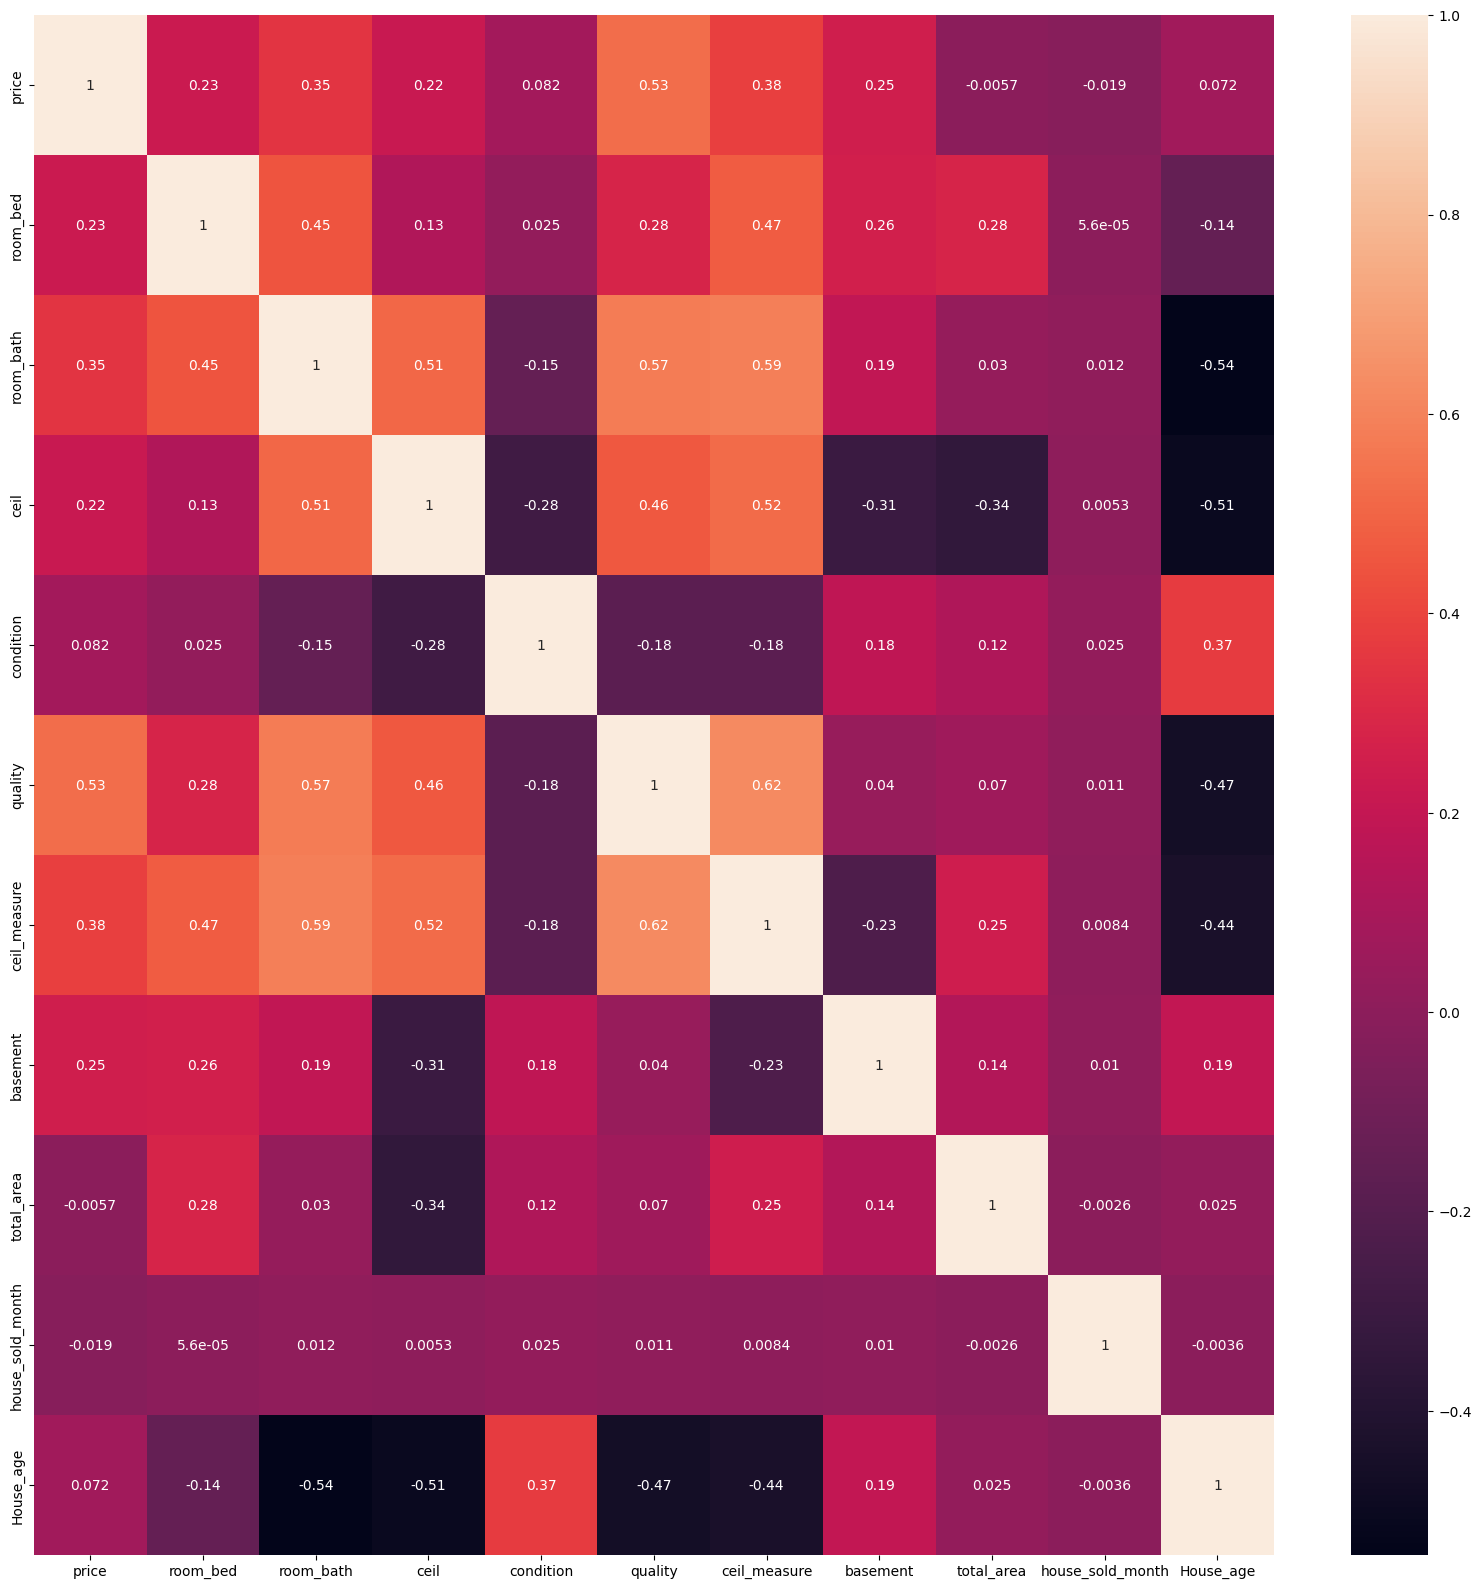

In [213]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [282]:
X = df1.drop(columns=['price'])
y = df1['price']

In [283]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.20, random_state=42)

In [284]:
def metric(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    mae = mean_absolute_error(actual,predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual,predicted)
    return mse,mae,rmse,r2

In [304]:
scaler = {
    'Without scaling' : '',
    'standard_scaler' : StandardScaler(),
    'robust_scaler' : RobustScaler(),
    'minmax_scaler' : MinMaxScaler()

}

In [286]:
def linear_regression(X_train,y_train,X_val,y_val,X_test,y_test,scaler):
    model = LinearRegression()
    for key,value in scaler.items():
        if key == 'Without scaling':
            print("Without Scaling")
            model.fit(X_train,y_train)
            y_test_pred = model.predict(X_test)
            mse,mae,rmse,r2 = metric(y_test,y_test_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val)
            mse,mae,rmse,r2 = metric(y_val,y_val_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')
        else:
            print(f"Scaled using: {key}")
            X_train_scaled = value.fit_transform(X_train)
            X_test_scaled = value.transform(X_test)
            X_val_scaled = value.transform(X_val)
            model.fit(X_train_scaled,y_train)
            y_test_pred = model.predict(X_test_scaled)
            mse,mae,rmse,r2 = metric(y_test,y_test_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val_scaled)
            mse,mae,rmse,r2 = metric(y_val,y_val_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')

linear_regression(X_train,y_train,X_val,y_val,X_test,y_test,scaler)
        

Without Scaling
Mean Sqaured Error: 38702997387.6284
Mean Absolute Error: 129666.88461355394
Root Mean Sqaured Error: 196730.7738703541
Coefficient of Determination (R²): 0.6802180910920118
Validation metrics
Mean Sqaured Error: 47873751423.16315
Mean Absolute Error: 131431.56432653868
Root Mean Sqaured Error: 218800.71166055
Coefficient of Determination (R²): 0.6599833493085101
--------------------------------------------------------------------------------------------------------------------------------
Scaled using: standard_scaler


Mean Sqaured Error: 38702997387.62337
Mean Absolute Error: 129666.88461352835
Root Mean Sqaured Error: 196730.7738703413
Coefficient of Determination (R²): 0.6802180910920534
Validation metrics
Mean Sqaured Error: 47873751423.16413
Mean Absolute Error: 131431.56432651656
Root Mean Sqaured Error: 218800.71166055228
Coefficient of Determination (R²): 0.6599833493085031
--------------------------------------------------------------------------------------------------------------------------------
Scaled using: robust_scaler
Mean Sqaured Error: 38702997387.62331
Mean Absolute Error: 129666.8846135281
Root Mean Sqaured Error: 196730.77387034116
Coefficient of Determination (R²): 0.6802180910920539
Validation metrics
Mean Sqaured Error: 47873751423.16412
Mean Absolute Error: 131431.56432651638
Root Mean Sqaured Error: 218800.71166055225
Coefficient of Determination (R²): 0.6599833493085032
-------------------------------------------------------------------------------------------------------

In [287]:
def svr(X_train,y_train,X_val,y_val,X_test,y_test,scaler):
    model = SVR(kernel='rbf')
    for key,value in scaler.items():
        if key == 'Without scaling':
            print("Without Scaling")
            model.fit(X_train,y_train)
            y_test_pred = model.predict(X_test)
            mse,mae,rmse,r2 = metric(y_test,y_test_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val)
            mse,mae,rmse,r2 = metric(y_val,y_val_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')
        else:
            print(f"Scaled using: {key}")
            X_train_scaled = value.fit_transform(X_train)
            X_test_scaled = value.transform(X_test)
            X_val_scaled = value.transform(X_val)
            model.fit(X_train_scaled,y_train)
            y_test_pred = model.predict(X_test_scaled)
            mse,mae,rmse,r2 = metric(y_test,y_test_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val_scaled)
            mse,mae,rmse,r2 = metric(y_val,y_val_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')

svr(X_train,y_train,X_val,y_val,X_test,y_test,scaler)

Without Scaling
Mean Sqaured Error: 128376252023.94601
Mean Absolute Error: 217607.1414643856
Root Mean Sqaured Error: 358296.31874182855
Coefficient of Determination (R²): -0.06070345197070015
Validation metrics
Mean Sqaured Error: 148689364012.41165
Mean Absolute Error: 220623.87568220735
Root Mean Sqaured Error: 385602.59855505597
Coefficient of Determination (R²): -0.056045495538221246
--------------------------------------------------------------------------------------------------------------------------------
Scaled using: standard_scaler
Mean Sqaured Error: 128043083899.07271
Mean Absolute Error: 217259.8528389334
Root Mean Sqaured Error: 357831.08291353437
Coefficient of Determination (R²): -0.05795066417258177
Validation metrics
Mean Sqaured Error: 148361281172.20566
Mean Absolute Error: 220293.86702821366
Root Mean Sqaured Error: 385176.9478722807
Coefficient of Determination (R²): -0.0537153328674469
--------------------------------------------------------------------------

In [288]:
def decision_tree_regressor(X_train,y_train,X_val,y_val,X_test,y_test,scaler):
    model = DecisionTreeRegressor()
    for key,value in scaler.items():
        if key == 'Without scaling':
            print("Without Scaling")
            model.fit(X_train,y_train)
            y_test_pred = model.predict(X_test)
            mse,mae,rmse,r2 = metric(y_test,y_test_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val)
            mse,mae,rmse,r2 = metric(y_val,y_val_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')
        else:
            print(f"Scaled using: {key}")
            X_train_scaled = value.fit_transform(X_train)
            X_test_scaled = value.transform(X_test)
            X_val_scaled = value.transform(X_val)
            model.fit(X_train_scaled,y_train)
            y_test_pred = model.predict(X_test_scaled)
            mse,mae,rmse,r2 = metric(y_test,y_test_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val_scaled)
            mse,mae,rmse,r2 = metric(y_val,y_val_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')

decision_tree_regressor(X_train,y_train,X_val,y_val,X_test,y_test,scaler)

Without Scaling


Mean Sqaured Error: 36671299873.062035
Mean Absolute Error: 103826.34212962963
Root Mean Sqaured Error: 191497.51923474632
Coefficient of Determination (R²): 0.6970049074469469
Validation metrics
Mean Sqaured Error: 43211098093.99306
Mean Absolute Error: 110516.55902777778
Root Mean Sqaured Error: 207872.7930586229
Coefficient of Determination (R²): 0.6930991950734792
--------------------------------------------------------------------------------------------------------------------------------
Scaled using: standard_scaler
Mean Sqaured Error: 36288340214.42107
Mean Absolute Error: 104130.90393518518
Root Mean Sqaured Error: 190494.98737347676
Coefficient of Determination (R²): 0.7001690957254005
Validation metrics
Mean Sqaured Error: 41433111512.14323
Mean Absolute Error: 109621.24681712964
Root Mean Sqaured Error: 203551.2503330383
Coefficient of Determination (R²): 0.7057270970983556
----------------------------------------------------------------------------------------------------

In [264]:
def decision_tree_regressor(X_train,y_train,X_val,y_val,X_test,y_test,scaler):
    model = DecisionTreeRegressor()
    for key,value in scaler.items():
        if key == 'Without scaling':
            print("Without Scaling")
            model.fit(X_train,y_train)
            y_test_pred = model.predict(X_test)
            mse,mae,rmse,r2 = metric(y_test,y_test_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val)
            mse,mae,rmse,r2 = metric(y_val,y_val_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')
        else:
            print(f"Scaled using: {key}")
            X_train_scaled = value.fit_transform(X_train)
            X_test_scaled = value.transform(X_test)
            X_val_scaled = value.transform(X_val)
            model.fit(X_train_scaled,y_train)
            y_test_pred = model.predict(X_test_scaled)
            mse,mae,rmse,r2 = metric(y_test,y_test_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val_scaled)
            mse,mae,rmse,r2 = metric(y_val,y_val_pred)
            print(f"Mean Sqaured Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Sqaured Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')

decision_tree_regressor(X_train,y_train,X_val,y_val,X_test,y_test,scaler)

Without Scaling
Mean Sqaured Error: 72881766286.91649
Mean Absolute Error: 168958.8017361111
Root Mean Sqaured Error: 269966.23175300367
Coefficient of Determination (R²): 0.39781743221609045
Validation metrics
Mean Sqaured Error: 79398482660.90886
Mean Absolute Error: 172021.41869212964
Root Mean Sqaured Error: 281777.3636417746
Coefficient of Determination (R²): 0.43608333707296487
--------------------------------------------------------------------------------------------------------------------------------
Scaled using: standard_scaler
Mean Sqaured Error: 72312368544.95047
Mean Absolute Error: 168191.25462962964
Root Mean Sqaured Error: 268909.5917682195
Coefficient of Determination (R²): 0.4025220574168249
Validation metrics
Mean Sqaured Error: 78003446417.88513
Mean Absolute Error: 171387.1304976852
Root Mean Sqaured Error: 279290.9708849986
Coefficient of Determination (R²): 0.44599138766113466
-------------------------------------------------------------------------------------

In [289]:
def linear_regression(X_train, y_train, X_val, y_val, X_test, y_test, scaler, model_type='linear'):
    if model_type == 'linear':
        model = LinearRegression()
    elif model_type == 'ridge':
        model = Ridge(alpha=0.2) 
    elif model_type == 'lasso':
        model = Lasso(alpha=0.2)  
    else:
        raise ValueError("Invalid model type. Choose 'linear', 'ridge', or 'lasso'.")

    for key, value in scaler.items():
        if key == 'Without scaling':
            print("Without Scaling")
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            mse, mae, rmse, r2 = metric(y_test, y_test_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val)
            mse, mae, rmse, r2 = metric(y_val, y_val_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')
        else:
            print(f"Scaled using: {key}")
            X_train_scaled = value.fit_transform(X_train)
            X_test_scaled = value.transform(X_test)
            X_val_scaled = value.transform(X_val)
            model.fit(X_train_scaled, y_train)
            y_test_pred = model.predict(X_test_scaled)
            mse, mae, rmse, r2 = metric(y_test, y_test_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val_scaled)
            mse, mae, rmse, r2 = metric(y_val, y_val_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')


linear_regression(X_train, y_train, X_val, y_val, X_test, y_test, scaler, model_type='ridge')


Without Scaling
Mean Squared Error: 38702503803.1177
Mean Absolute Error: 129662.09171119804
Root Mean Squared Error: 196729.51939939696
Coefficient of Determination (R²): 0.6802221693135371
Validation metrics
Mean Squared Error: 47873600141.53188
Mean Absolute Error: 131428.7215166394
Root Mean Squared Error: 218800.36595383447
Coefficient of Determination (R²): 0.6599844237652227
--------------------------------------------------------------------------------------------------------------------------------
Scaled using: standard_scaler
Mean Squared Error: 38686244028.328125
Mean Absolute Error: 129578.47909377149
Root Mean Squared Error: 196688.18985472445
Coefficient of Determination (R²): 0.6803565150276054
Validation metrics
Mean Squared Error: 47886983527.389015
Mean Absolute Error: 131376.20859751347
Root Mean Squared Error: 218830.94737122767
Coefficient of Determination (R²): 0.6598893701314719
-----------------------------------------------------------------------------------

In [290]:
linear_regression(X_train, y_train, X_val, y_val, X_test, y_test, scaler, model_type='lasso')

Without Scaling


Mean Squared Error: 38720523967.46524
Mean Absolute Error: 129538.87156075813
Root Mean Squared Error: 196775.3134096481
Coefficient of Determination (R²): 0.6800732784538401
Validation metrics
Mean Squared Error: 48014139100.618416
Mean Absolute Error: 131503.70714426093
Root Mean Squared Error: 219121.28856096664
Coefficient of Determination (R²): 0.6589862653853229
--------------------------------------------------------------------------------------------------------------------------------
Scaled using: standard_scaler
Mean Squared Error: 38720519961.83375
Mean Absolute Error: 129538.93946754016
Root Mean Squared Error: 196775.30323146182
Coefficient of Determination (R²): 0.680073311550204
Validation metrics
Mean Squared Error: 48014187879.19692
Mean Absolute Error: 131503.7852218909
Root Mean Squared Error: 219121.39986591204
Coefficient of Determination (R²): 0.6589859189422639
-----------------------------------------------------------------------------------------------------

Without Scaling
Mean Squared Error: 16210765093.287815
Mean Absolute Error: 70259.5377587963
Root Mean Squared Error: 127321.5028708341
Coefficient of Determination (R²): 0.8660592265123213
Validation metrics
Mean Squared Error: 20787626893.014286
Mean Absolute Error: 73591.97708121141
Root Mean Squared Error: 144179.14860691293
Coefficient of Determination (R²): 0.852358775699219
--------------------------------------------------------------------------------------------------------------------------------


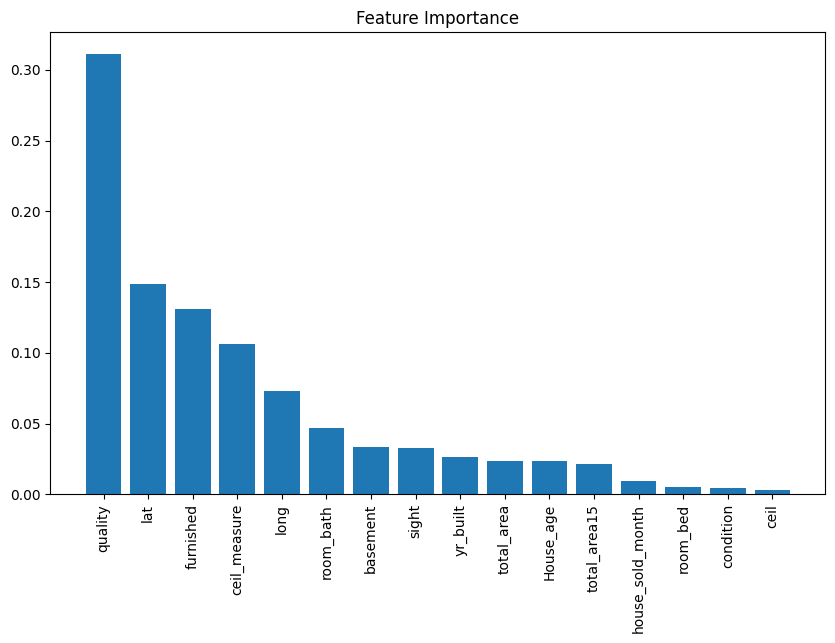

Scaled using: standard_scaler
Mean Squared Error: 16233480672.204794
Mean Absolute Error: 70332.33977731483
Root Mean Squared Error: 127410.6772299904
Coefficient of Determination (R²): 0.865871539984705
Validation metrics
Mean Squared Error: 20774105406.966717
Mean Absolute Error: 73574.49190760031
Root Mean Squared Error: 144132.2497117377
Coefficient of Determination (R²): 0.8524548101703352
--------------------------------------------------------------------------------------------------------------------------------
Scaled using: robust_scaler
Mean Squared Error: 16218478031.41196
Mean Absolute Error: 70280.92469398148
Root Mean Squared Error: 127351.78848925506
Coefficient of Determination (R²): 0.8659954986813234
Validation metrics
Mean Squared Error: 20802827390.289135
Mean Absolute Error: 73617.09984741511
Root Mean Squared Error: 144231.85289764925
Coefficient of Determination (R²): 0.8522508162847467
---------------------------------------------------------------------------

In [291]:
def random_forest_regression(X_train, y_train, X_val, y_val, X_test, y_test, scaler):
    model = RandomForestRegressor(n_estimators=100, random_state=42) 
    
    for key, value in scaler.items():
        if key == 'Without scaling':
            print("Without Scaling")
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            mse, mae, rmse, r2 = metric(y_test, y_test_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val)
            mse, mae, rmse, r2 = metric(y_val, y_val_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')
            importances = model.feature_importances_

            indices = np.argsort(importances)[::-1]

            names = [X.columns[i] for i in indices]
            
            plt.figure(figsize=(10, 6))
            plt.title("Feature Importance")
            plt.bar(range(X.shape[1]), importances[indices])
            plt.xticks(range(X.shape[1]), names, rotation=90)
            plt.show()
        else:
            print(f"Scaled using: {key}")
            X_train_scaled = value.fit_transform(X_train)
            X_test_scaled = value.transform(X_test)
            X_val_scaled = value.transform(X_val)
            model.fit(X_train_scaled, y_train)
            y_test_pred = model.predict(X_test_scaled)
            mse, mae, rmse, r2 = metric(y_test, y_test_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val_scaled)
            mse, mae, rmse, r2 = metric(y_val, y_val_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')


random_forest_regression(X_train, y_train, X_val, y_val, X_test, y_test, scaler)

In [292]:
def xgboost_regression(X_train, y_train, X_val, y_val, X_test, y_test, scaler):
    model = XGBRegressor()
    
    for key, value in scaler.items():
        if key == 'Without scaling':
            print("Without Scaling")
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            print("Test metrics:")
            print_regression_metrics(y_test, y_test_pred)
            print('Validation metrics:')
            y_val_pred = model.predict(X_val)
            print_regression_metrics(y_val, y_val_pred)
            print('--------------------------------------------------------------------------------------------------------------------------------')
        else:
            print(f"Scaled using: {key}")
            X_train_scaled = value.fit_transform(X_train)
            X_test_scaled = value.transform(X_test)
            X_val_scaled = value.transform(X_val)
            model.fit(X_train_scaled, y_train)
            y_test_pred = model.predict(X_test_scaled)
            print("Test metrics:")
            print_regression_metrics(y_test, y_test_pred)
            print('Validation metrics:')
            y_val_pred = model.predict(X_val_scaled)
            print_regression_metrics(y_val, y_val_pred)
            print('--------------------------------------------------------------------------------------------------------------------------------')


def print_regression_metrics(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, pred)
    print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")


xgboost_regression(X_train, y_train, X_val, y_val, X_test, y_test, scaler)

Without Scaling


Test metrics:
Mean Squared Error: 13959545716.708408
Mean Absolute Error: 67738.42933846933
Root Mean Squared Error: 118150.52144069619
Coefficient of Determination (R²): 0.8846598331372575
Validation metrics:
Mean Squared Error: 19578331402.26716
Mean Absolute Error: 71801.55085810908
Root Mean Squared Error: 139922.59075026863
Coefficient of Determination (R²): 0.8609476284679456
--------------------------------------------------------------------------------------------------------------------------------
Scaled using: standard_scaler
Test metrics:
Mean Squared Error: 13959545716.708408
Mean Absolute Error: 67738.42933846933
Root Mean Squared Error: 118150.52144069619
Coefficient of Determination (R²): 0.8846598331372575
Validation metrics:
Mean Squared Error: 19578331402.26716
Mean Absolute Error: 71801.55085810908
Root Mean Squared Error: 139922.59075026863
Coefficient of Determination (R²): 0.8609476284679456
-----------------------------------------------------------------------

In [295]:
pca = PCA(n_components=11)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

In [296]:
explained_variance_ratio 

array([2.95900290e-01, 1.29583413e-01, 1.12196671e-01, 7.16912993e-02,
       6.29067244e-02, 5.99946356e-02, 5.67600314e-02, 4.75074033e-02,
       4.29355439e-02, 3.91664609e-02, 2.53848044e-02, 1.81547452e-02,
       1.75626411e-02, 1.14708790e-02, 8.78140184e-03, 3.05536467e-06])

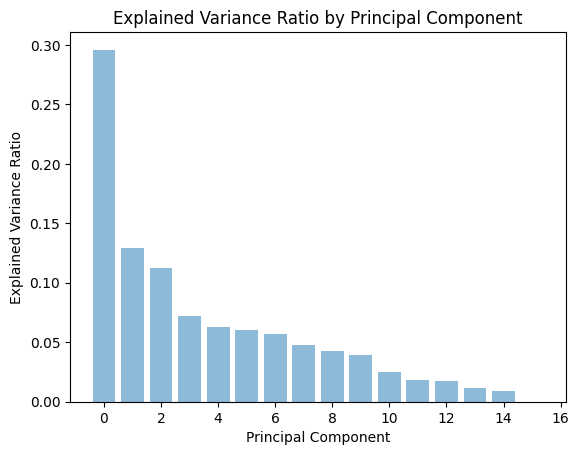

In [297]:
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

* We will be using 11 pricipal components>

In [305]:
scalers = {
    'Without scaling' : '',
    'standard_scaler' : StandardScaler(),
    'robust_scaler' : RobustScaler(),
    'minmax_scaler' : MinMaxScaler()

}

In [310]:

def random_forest_regression(X_train,y_train,X_test,y_test,X_val,y_val):
    model = RandomForestRegressor(n_estimators=100, random_state=42) 
    
    for key, value in scalers.items():
        if key == 'Without scaling':
            print("Without Scaling")
            model.fit(X_train, y_train)
            y_test_pred = model.predict(X_test)
            mse, mae, rmse, r2 = metric(y_test, y_test_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val)
            mse, mae, rmse, r2 = metric(y_val, y_val_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')

        else:
            print(f"Scaled using: {key}")
            X_train_scaled = value.fit_transform(X_train)
            X_test_scaled = value.transform(X_test)
            X_val_scaled = value.transform(X_val)
            model.fit(X_train_scaled, y_train)
            y_test_pred = model.predict(X_test_scaled)
            mse, mae, rmse, r2 = metric(y_test, y_test_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('Validation metrics')
            y_val_pred = model.predict(X_val_scaled)
            mse, mae, rmse, r2 = metric(y_val, y_val_pred)
            print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
            print('--------------------------------------------------------------------------------------------------------------------------------')

In [311]:
def perfrom_pca_and_model_training(X,y):
    pca = PCA(n_components=11)
    for key, value in scalers.items():
        if key == 'Without scaling':
            print("PCA Without Scaling")
            pca.fit(X)
            X_pca = pca.transform(X)
            df_pca = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
            X_train_temp, X_test, y_train_temp, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)
            X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.20, random_state=42)
        else:
            print(f"PCA Scaled using: {key}")
            X_scaled = value.fit_transform(X)
            pca.fit(X_scaled)
            X_pca = pca.transform(X)
            df_pca = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
            X_train_temp, X_test, y_train_temp, y_test = train_test_split(df_pca, y, test_size=0.2, random_state=42)
            X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.20, random_state=42)
        random_forest_regression(X_train,y_train,X_test,y_test,X_val,y_val)

In [312]:
perfrom_pca_and_model_training(X,y)

PCA Without Scaling


Without Scaling
Mean Squared Error: 40668174716.24085
Mean Absolute Error: 125693.12153148149
Root Mean Squared Error: 201663.51855563975
Coefficient of Determination (R²): 0.6639808950115018
Validation metrics
Mean Squared Error: 44330229676.64728
Mean Absolute Error: 128971.35386636078
Root Mean Squared Error: 210547.45231573636
Coefficient of Determination (R²): 0.6851507189021917
--------------------------------------------------------------------------------------------------------------------------------
Scaled using: standard_scaler
Mean Squared Error: 40720417364.87934
Mean Absolute Error: 125701.50445936949
Root Mean Squared Error: 201793.00623381214
Coefficient of Determination (R²): 0.6635492422963205
Validation metrics
Mean Squared Error: 44004020616.52387
Mean Absolute Error: 129036.65726758847
Root Mean Squared Error: 209771.3531837078
Coefficient of Determination (R²): 0.6874675733109463
------------------------------------------------------------------------------------

* Fine tunning random forest regressor

Without Scaling
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 15995027137.195637
Mean Absolute Error: 69812.43043879294
Root Mean Squared Error: 126471.44791294055
Coefficient of Determination (R²): 0.867841752416765
Validation metrics
Mean Squared Error: 20664716252.464436
Mean Absolute Error: 73150.67787746683
Root Mean Squared Error: 143752.27390363062
Coefficient of Determination (R²): 0.8532317314023288
--------------------------------------------------------------------------------------------------------------------------------


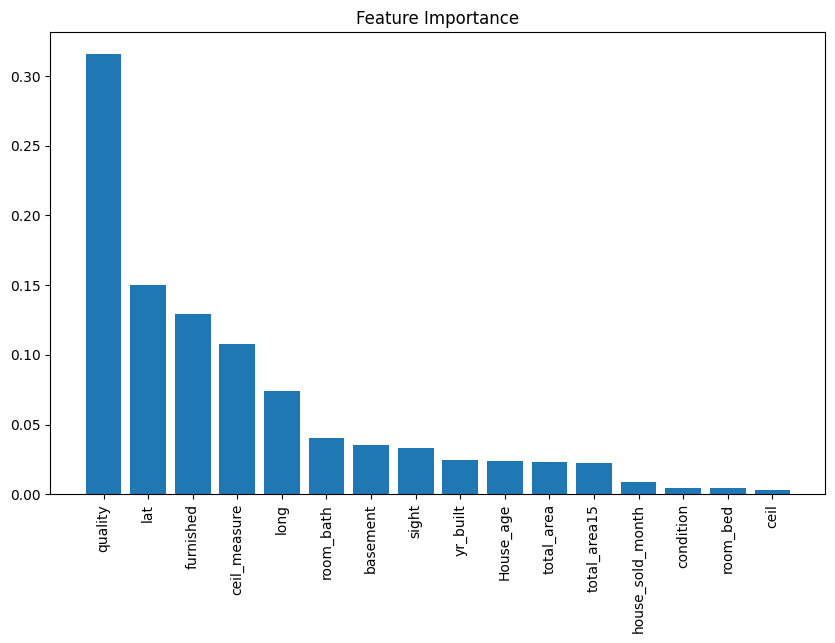

Scaled using: standard_scaler
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 8968053302664.104
Mean Absolute Error: 2946215.550563657
Root Mean Squared Error: 2994670.8170789164
Coefficient of Determination (R²): -73.09816804605495
Validation metrics
Mean Squared Error: 8917852206183.379
Mean Absolute Error: 2938690.015617766
Root Mean Squared Error: 2986277.315686435
Coefficient of Determination (R²): -62.337803041711986
--------------------------------------------------------------------------------------------------------------------------------


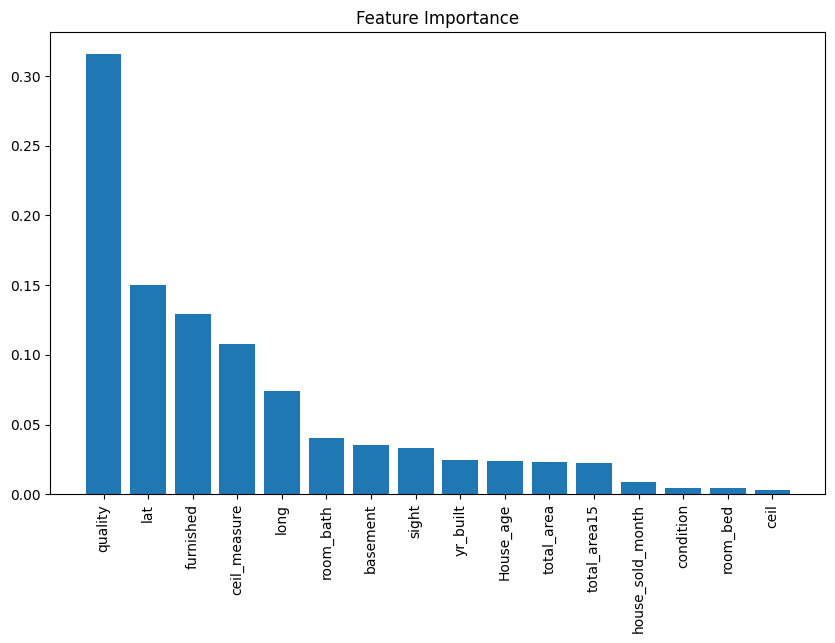

Scaled using: robust_scaler
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 9272605560996.19
Mean Absolute Error: 2983825.591928241
Root Mean Squared Error: 3045095.328720628
Coefficient of Determination (R²): -75.61451843505102
Validation metrics
Mean Squared Error: 9216134572631.238
Mean Absolute Error: 2976676.7139583337
Root Mean Squared Error: 3035808.7180570583
Coefficient of Determination (R²): -64.45631199881163
--------------------------------------------------------------------------------------------------------------------------------


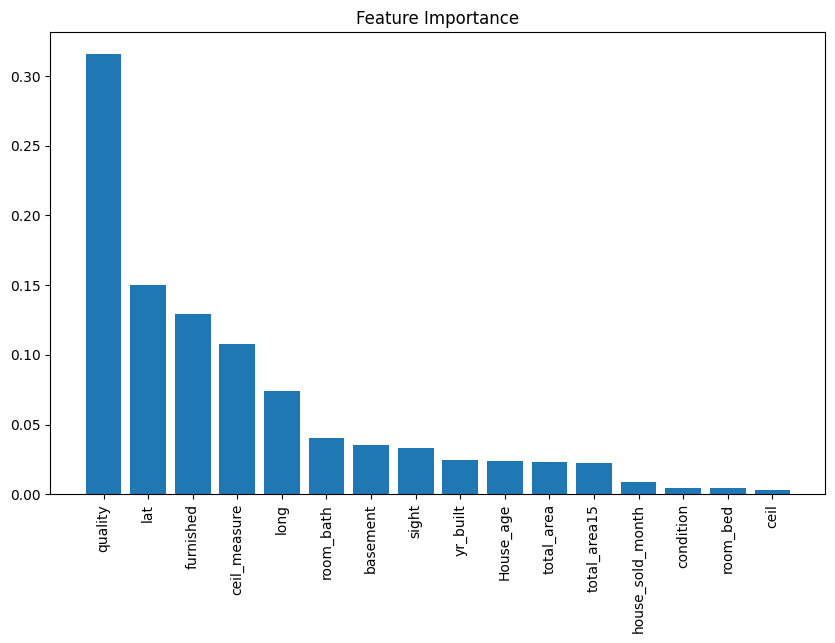

Scaled using: minmax_scaler
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 14709154436014.537
Mean Absolute Error: 3770829.548497685
Root Mean Squared Error: 3835251.5479450026
Coefficient of Determination (R²): -120.53377778111569
Validation metrics
Mean Squared Error: 14642875621281.234
Mean Absolute Error: 3763396.793706598
Root Mean Squared Error: 3826601.0533215026
Coefficient of Determination (R²): -102.99898435431928
--------------------------------------------------------------------------------------------------------------------------------


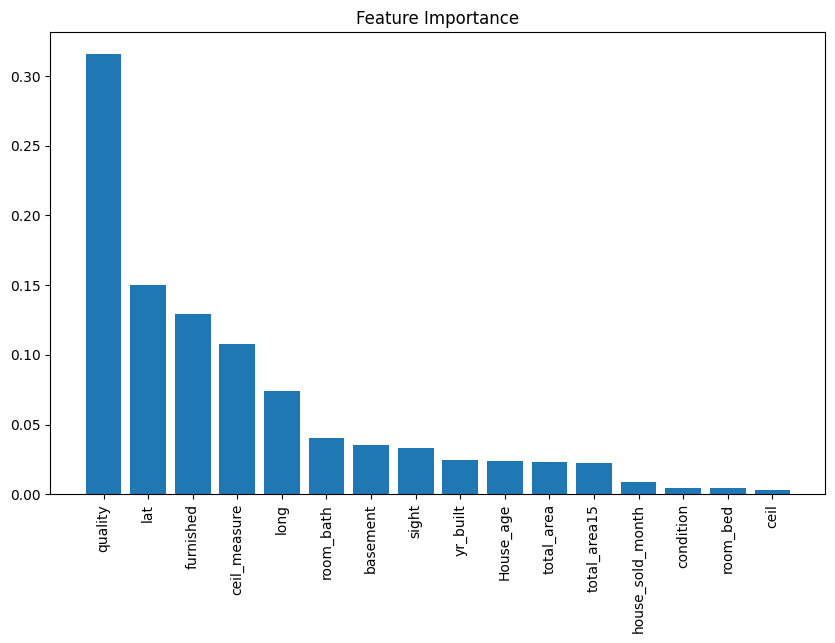

In [315]:

def random_forest_regression_with_tuning(X_train, y_train, X_val, y_val, X_test, y_test, scaler):

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    for key, value in scalers.items():
        if key == 'Without scaling':
            print("Without Scaling")
            grid_search.fit(X_train, y_train)
        else:
            print(f"Scaled using: {key}")
            X_train_scaled = value.fit_transform(X_train)
            grid_search.fit(X_train_scaled, y_train)
        
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        
        print("Best Parameters:", best_params)
        y_test_pred = best_model.predict(X_test)
        mse, mae, rmse, r2 = metric(y_test, y_test_pred)
        print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
        print('Validation metrics')
        y_val_pred = best_model.predict(X_val)
        mse, mae, rmse, r2 = metric(y_val, y_val_pred)
        print(f"Mean Squared Error: {mse}\nMean Absolute Error: {mae}\nRoot Mean Squared Error: {rmse}\nCoefficient of Determination (R²): {r2}")
        print('--------------------------------------------------------------------------------------------------------------------------------')
        
        importances = best_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        names = [X.columns[i] for i in indices]
        plt.figure(figsize=(10, 6))
        plt.title("Feature Importance")
        plt.bar(range(X.shape[1]), importances[indices])
        plt.xticks(range(X.shape[1]), names, rotation=90)
        plt.show()

random_forest_regression_with_tuning(X_train, y_train, X_val, y_val, X_test, y_test, scaler)


|-Models-|------------------- Without Scaling--------------------|-----------------------Standard Scaler---------------------|---------------------- Robust Scaler------------------------|--------------------- MinMax Scaler--------------------|
|----------------------------------|-------------------------|------------------------|----------------------------------------------------|---------------------------------------------------|



|                                         | MSE | MAE | RMSE | r2 | MSE | MAE | RMSE | r2 | MSE | MAE | RMSE | r2 | MSE | MAE | RMSE | r2 |
|-----------------------------------------|-----|-----|------|----|-----|-----|------|----|-----|-----|------|----|-----|-----|------|----|
| Linear Regressor                        | 38702997387.62    |  129666.88   |    196730.77  | 0.68   | 38702997387.62    |  129666.88  |   196730.77   |   0.68  |  38702997387.62  | 129666.88 |   196730.77   |  0.68  |  38702997387.62   |   129666.88  |   196730.77   |  0.65  |
| Ridge Regressor                         |   38702503803.11  |   129662.09  |  196729.51    |  0.6802  |  38686244028.32   |   129578.47  |  196688.18    | 0.6803   |   38682418777.22  |   129529.97  |   196678.46   |  0.68038  |   38683563363.70  |   129411.80  |   196681.37   |  0.65  |
| Lasso Regressor                         |   38720523967.46  |  129538.87   |   196775.31   |  0.68007  |  38720519961.83   |  129538.93   |   196775.303   |  0.68007  |   38720515049.29  |  129538.891   |   196775.29   |  0.68007  |   38720466594.05  |   129538.12  |  196775.16    | 0.6589   |
| Decision Tree Regressor                 |  36671299873.06   |  103826.34   |   191497.51   |  0.697  |  36288340214.421   |  104130.903   |   190494.98   |  0.7001  |   36210989489.84  |  105064.99   |   190291.85   |  0.7008  |  34604458201.37   |   103701.36  |    186022.73   |  0.7140  |
| Random Forest Regressor                 |   16210765093.28  |   70259.53  |   127321.50   |   0.866  |  16233480672.20   |   70332.33   |  127410.67    |  0.8658  |  16218478031.41   |   70280.92  |   127351.78   |  0.865  |  16199363258.70   |   70284.55  |   127276.71   |   0.8661  |
| Xgboost Regressor                       |   13959545716.70  |   67738.42  |   118150.52   | 0.8846   |    13959545716.70  |  67738.42   |   118150.52   |   0.8846  |  13959545716.70   |   67738.429  |   118150.5214   |  0.8609  |   13959545716.708  |  67738.42    |  118150.521   |  0.8609  |
| Random Forest Regressor with PCA        |   40668174716.24  |  125693.12   |  201663.51    |  0.6639  |  57625939023.09   |  157282.07   |   240054.03   |  0.5238  |  50663916331.56   |  145592.95   |   225086.46   |  0.581  |   49755899674.70  |  147695.10   |   223060.30   |  0.5888  |



* The most optimal model is 'Xg-Boost Regressor'

## Business Intepretation of most optimum model.

* Feature Importance Analysis: Understanding which features have the most significant impact on the predicted house prices can provide valuable insights for the business. By analyzing feature importance, you can identify key factors driving property values in the market.
* Identifying Market Trends: The model can help identify emerging trends in the housing market. For example, features such as year built, year renovated, and quality might indicate preferences for newer or renovated properties. This insight can inform strategic decisions regarding property development and investment.
* Optimizing Pricing Strategy: With a highly accurate predictive model, the business can optimize its pricing strategy for selling properties. By considering various factors such as location, size, condition, and quality, the model can suggest appropriate price ranges that maximize profitability while remaining competitive in the market.
* Assessing Property Value: The model can provide reliable estimates of property values, helping sellers and buyers make informed decisions. It can serve as a valuable tool for real estate agents, investors, and homeowners looking to buy or sell properties at fair market prices.
* Risk Management: Understanding the factors influencing property prices allows the business to assess and mitigate risks associated with real estate investments. By incorporating predictive analytics into risk management practices, the business can make more informed decisions and minimize potential losses.
* Customer Satisfaction: Accurately pricing properties can enhance customer satisfaction by ensuring fairness and transparency in transactions. Satisfied customers are more likely to return for future transactions and recommend the business to others, contributing to long-term success and growth.
* Continuous Improvement: The success of the model provides an opportunity for continuous improvement through feedback and iteration. By refining the model based on new data and market insights, the business can maintain its competitive edge and adapt to changing market conditions over time.